# GROUP 4:
| Name | Family Name | Matriculation Number |
| :---: | :---: | :---: |
| Leonardo | Pieripolli | 2150237 |
| Tommaso | Pirazzo | 2152860 |
| Mattia  | Ponchio | 2140684 |
| Benedetto | Secco | 2158513 |

# ITERATIVE PRISONER'S DILEMMA


### INTRODUCTION

The [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) (PD) is a classical game analyzed in game theory, which is widely used to (attempt to) model social/economical interaction. It's a "dilemma" as, if exploited to explain the emergence of altruism in human or in general animal society, it fails badly at a first glance.

The classical situation-representation of the PD is that of two prisoners whose conviction depends on their mutual cooperation. It is easier understood though if illustrated in terms of a trade-off game (closed bag exachange):

*Two people meet and exchange closed bags, with the understanding that one of them contains money, and the other contains a purchase. Either player can choose to honor the deal by putting into his or her bag what he or she agreed, or he or she can defect by handing over an empty bag.*

It is obvious that for both players the winning strategy is to NOT cooperate.

Things changes when the interaction between the two individuals is iterated, in that case a more altruist attitude (strategy) is expected to emerge. The goal of this project is to test this hypothesis.

Mathematically the PD can be expressed with very basic linear algebra. The key component is the **Payoff matrix** $M$, which quantify the reward each player gets depending on whether she cooperated or not (defect):

$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$

with $T,R,S,P$ integers that satisfy the following conditions:

$$
T>R>P>S; \quad 2R > T+S
$$

for example $T=3$, $R=2$, $P=1$ and $S=0$, or  $T=5$, $R=3$, $P=2$, $S=0$. Each player choice (move) can be represented by one of the two axis in ${\rm I\!R}^2$, i.e. $u_C=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $u_D=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, where the first coordinate stands for *Cooperate* and the second for *Defect*. Being $u_1$ and $u_2$ their rewards $r_1$ and $r_2$ can be computed then as:

$$
r_1 = u_1^T M u_2
\quad
\quad
r_2 = u_2^T M u_1
$$

In an Iterative Prisoner's Dilemma (IPD), two players play prisoner's dilemma more than once in succession and they remember previous actions of their opponent and change their strategy accordingly. The winning strategy is the one which yields to a larger reward at the end of the IPD.

The strategy can be represented as a function which outputs either $u_C$ or $u_D$. Such function can depend on the opponent's history of moves, her on history of moves, on the number of moves played till that moment and so on, but it can only be based on a probability density function.

### STRATEGIES
The implemented strategies are the following:

* **Nice guy**: always cooperate (the function's output is always $u_C$)
* **Bad guy**: always defects 
* **Mainly nice**: randomly defects $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defects $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **Tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move
* **Random guy**: randomly defects or cooperates
* **Resentful guy**: cooperates until the opponent defects once, then always defects
* **Trusting guy**: initially is like random guy (coop/defect at k=50%), then updates k according to match history (% of coop over the total)
* **Balancing guy**: cooperates only for an even number of cooperations in the history, otherwise defects
* **Mid Resentful guy**: usually cooperates, unless the opponent has defected in any of the previous 3 moves (in this case defects)
* **Reverse Tit-for-tat**: it does the reverse of Tft. It defects on the first move, then plays the reverse of the opponent’s last move.
* **Scamming Guy**: start by defecting, then cooperating two times; for the following turns chose the optimal condition based on how the adversary did

The template for the functions implementing the strategies is:
```python
def strategy( round_number, match_history, player_index) : 
    move = defect or cooperate
    return move 
```


# Core Structure
### Work division:
Part 0: collaborative brainstorming (like most of the project)

In [1]:
# IMPORT BLOCK:____________________________________________

import copy
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import random as npr
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from matplotlib import ticker as ticker
from matplotlib import colors as matcol
from matplotlib import colors as mcolors
from matplotlib import animation as animation

In [2]:
# INITIAL DATA:_____________________________________________
cooperate = np.array( [ 1, 0 ] )
defect = np.array( [ 0, 1 ] )
# percentage of defect for mainly nice ( and 1-k percentage of cooperate for mainly bad) Global Variable
k = 0.25

# default Payoff matrix
default_R = 2
default_S = 0
default_T = 3
default_P = 1
Payoff = np.array( [ [ default_R , default_S ], [ default_T, default_P ] ] )

# default round number
N_ROUNDS = 10

### STRATEGIES CODE

In [3]:
def nice_guy( round_number = 0, match_history = [[]], player_index = 0 ) : 
    move = cooperate
    return move 

def bad_guy( round_number = 0, match_history = [[]], player_index = 0 ) : 
    move = defect
    return move 

def mainly_nice( round_number = 0, match_history = [[]], player_index = 0 ) : 
    u = npr.random( )
    if ( u < k ) : move = defect
    else :         move = cooperate
    return         move

def mainly_bad( round_number = 0, match_history = [[]], player_index = 0 ) : 
    u = npr.random( )
    if ( u > k ) : move = defect
    else :         move = cooperate
    return         move

def random_guy( round_number = 0, match_history = [[]], player_index = 0 ) : 
    u = npr.random( )
    if ( u < 0.5 ) : move = defect
    else :           move = cooperate
    return           move

def tit_for_tat( round_number = 0, match_history = [[]], player_index = 0 ) : 
    if ( round_number == 0 ) : move = cooperate
    else :                     move = match_history[ round_number - 1 ][ 1 - player_index ]
    return                     move

def resentful_guy( round_number = 0, match_history = [[]], player_index = 0 ) : 
    move = cooperate
    if ( round_number > 0 ) :
        for res in match_history : 
            # if any result matching a defect is found, the move is set to defect
            if np.array_equal( res[ 1 - player_index  ], defect ) : move = defect
            # if a defect is found, he would break    
            break
    return move

def trusting_guy( round_number = 0, match_history = [[]], player_index = 0 ) :
    # starting trust
    k_t = 0.5
    # environmental trust
    if ( round_number > 0 ) :
        # number of cooperative behaviour met
        coop = 0. 
        # increase the value of cooperation by one each cooperation (element 0) seen from the other player (index 1-player_index)
        for res in match_history : coop += res[ 1 - player_index  ][ 0 ]
        # normalizing result over the match history
        k_t = coop / len( match_history )
    u = npr.random( )
    if ( u > k_t ) : move = defect
    else :         move = cooperate
    return         move

def balancing_guy( round_number = 0, match_history = [[]], player_index = 0 ) :
    move = defect
    if ( round_number > 0 ) :
        # total cooperation seen
        coop = 0
        # increase the value of cooperation by one each cooperation (element 0) seen from each side during the match
        for res in match_history : coop += ( res[ 0 ][ 1 ] + res[ 1 ][ 1 ])
        if ( ( coop % 2 ) == 0 ) : move = cooperate
    return                         move

def mid_resentful( round_number = 0, match_history = [[]], player_index = 0):
    move = cooperate
    # selecting the oldest round to check, 3 before the current one if possible, the starting round otherwise
    start = max(0, round_number - 3)
    for round_i in range( start, round_number ):
        # checking if one of the previous move of the opponent (1-player_index) mach a defect
        if np.array_equal( match_history[round_i][1 - player_index], defect ):   
            move = defect
            # if a result is found, the cycle can break
            break
    return move

def reverse_tit_for_tat( round_number = 0, match_history = [[]], player_index = 0 ) : 
    if ( round_number == 0 ) : move = defect
                               # in this way i obtain the opposite move: [1,1] - [1,0] = [0,1] and [1,1] - [0,1] = [1,0]
    else :                     move = [1,1] - match_history[ round_number - 1 ][ 1 - player_index ]  
    return                     move

def scamming_guy( round_number = 0, match_history = [[]], player_index = 0 ) :
    # default move is defect
    move =  defect
    # selecting first tree moves
    if ( round_number == 0 )   : 
        # print( f"round {round_number}: I defect" )
        move = defect
    elif ( round_number == 1 ) : 
        # print( f"round {round_number}: I cooperate" )
        move = cooperate
    elif ( round_number == 2 ) : 
        # print( f"round {round_number}: I cooperate" )
        move = cooperate
    else :
        # counting number of matching cooperation issues and defected from 0
        matching_coop = 0
        scammed = 0
        # deciding how much history to check
        first_r = npr.randint( 3, ( round_number + 1 ), dtype = int )
        # print( first_r )
        # searching over match history
        for i in range( round_number ) :
            # checking if the result cooperate, cooperate occurs
            if( np.array_equal( match_history[i][0], cooperate ) and np.array_equal( match_history[i][1], cooperate ) ) :
                matching_coop += 1
            # checking if the result cooperate, defect occurs in favour of the opposite side
            elif( np.array_equal( match_history[i][1 - player_index], defect ) and np.array_equal( match_history[i][player_index], cooperate ) ) :
                scammed += 1
        # checking if the opponent has always cooperated or if he has defected even once
        if( np.all( np.array_equiv( np.array( [ match_history[i][ 1 - player_index ] for i in range( ( round_number - first_r ), round_number ) ] ) , cooperate ) ) ) :
            # print( f"The rival is too good, I defect" )
            move = defect
        elif( matching_coop >= scammed ) : 
            # print( f"The rival is smart, I cooperate" )
            move = cooperate
    return move

# dictionary of all strategies
strategies = {
    'NiceGuy' : nice_guy,
    'BadGuy' : bad_guy,
    'MainlyNice' : mainly_nice,
    'MainlyBad' : mainly_bad,
    'TitForTat' : tit_for_tat,
    'RandomGuy' : random_guy,
    'ResentfulGuy' : resentful_guy,
    'TrustingGuy' : trusting_guy,
    'Thanos' : balancing_guy,
    'MidResentful': mid_resentful,
    'ReverseTft': reverse_tit_for_tat,
    'ScammingGuy' : scamming_guy,
}

In [4]:
strategy_colors =[
    '#FFD700',  # NiceGuy - Gold
    '#006400',  # BadGuy - Dark Green
    '#DE8C09',  # MainlyNice - Orange/Gold
    '#32CD32',  # MainlyBad - Lime Green
    '#0000CD',  # TitForTat - Dark Blue
    '#696969',  # RandomGuy - Dark Gray
    '#FF0000',  # ResentfulGuy - Red
    '#00BFFF',  # TrustingGuy - Deep Sky Blue
    '#800080',  # BalancingGuy - Purple
    '#E33B65',  # MidResentful - Brown/Red
    '#2E9E98',  # ReverseTitForTat - Copper Blue
    '#8B4513',  # ScammingGuy - Brown/Bronze
]

# creating a dictionary for color to strategy identification
color_dic = dict( zip( list( strategies.keys() ), strategy_colors))

### ROUND AND MATCH FUNCTIONS
We write here the functions used to simulate a single round and a match.\
A **round** is a single game between two players, each one with an assigned strategy. The **round** function returns the single normalized score for each player.\
A **match** is a sequence of N rounds between two players. The function **match** returns the history of normalized scores of the match for each player. It is simply obtained by the cumulative sum of the single scores of each round.\
The **normalization** of the score is computed by subtracting the value *S* from the matrix product result, then divide by the difference between *T* and *S*:
$$ reward = \frac{ \mathbb{REWARD} - S}{T-S} $$
This is done in order to compare results from different matrices and the normalized result represents the fraction of advantage gained by the player.\
The results during the match are normalized to the number of rounds played, so the total score is always between 0 and 1.

In [5]:
# function to play one round 1 vs 1 for two different* strategies players
def round( key_1, key_2, round_number, match_history, M = Payoff ) :
    # computing minimum and maximum reward for normalization
    s = np.dot( cooperate, M.dot(defect) )
    t = np.dot( defect, M.dot(cooperate) )
    # getting strategies from dictionary
    S_1 = strategies[ key_1 ]
    S_2 = strategies[ key_2 ]
    # computing next move for each player
    u_1 = S_1( round_number, match_history, 0 )
    u_2 = S_2( round_number, match_history, 1 )
    # computing rewards for each player
    r_1 = np.dot( u_1, M.dot(u_2))
    r_2 = np.dot( u_2, M.dot(u_1))
    # normalizing results
    r_1 = float( r_1 - s ) / float( t - s )
    r_2 = float( r_2 - s ) / float( t - s )
    # updating match history
    match_history.append( [ u_1, u_2 ] )
    # returning results
    return r_1, r_2

# function to play a match of N rounds 1 vs 1 for two different* strategies player
def match( key_1, key_2, N_rounds = 10, M = Payoff ) : 
    # match history strarting empty
    history = [ ]
    # starting total rewards
    R_1 = 0
    R_2 = 0
    # list of partial sums
    Rewards = []
    for round_i in range( 0, N_rounds ) :
        r_1, r_2 = round( key_1, key_2, round_i, history, M )
        R_1 += r_1
        R_2 += r_2
        # Rewards.append( [ R_1, R_2 ] )
        # normalizing results to round played up this moment
        Rewards.append( [ float(R_1)/(round_i+1), float(R_2)/(round_i+1) ] )
    # returns the history list of partial sums of rounds rewards
    return Rewards


# Two Players Prisoner's Dilemma
### Work division:
Part 1: Benedetto Secco

### COMBINATIONS OF POSSIBLE REWARDS
In this section we explore how the results of rounds and matches change with respect to different values of rewards.

In [6]:
# Syntax [T,R,P,S] : Check if the given combination is eligible as a payoff matrix and, if so, build it 
def get_new_Payoff(par_list=[3,2,1,0]):
    if (len(par_list)!= 4):
        raise TypeError("Invalid parameter list for Payoff matrix")
    new_R = par_list[1]
    new_S = par_list[3]
    new_T = par_list[0]
    new_P = par_list[2]
    # Sanity checks
    if (np.min(par_list)!=new_S): raise ValueError("Parameters do not satisfy boundary conditions: S is not the smallest value")
    if (new_S == new_P): raise ValueError("Parameters do not satisfy boundary conditions: S is not strictly smaller than P")
    if (np.max(par_list)!=new_T): raise ValueError("Parameters do not satisfy boundary conditions: T is not the biggest value")
    if (new_R == new_T): raise ValueError("Parameters do not satisfy boundary conditions: T is not strictly greater than R")
    if (new_P >= new_R): raise ValueError("Parameters do not satisfy boundary conditions: R is not greater than P")
    if (2*new_R <= new_T + new_S ): raise ValueError("Parameters do not satisfy boundary conditions: 2R is not greater than T+S")
    return np.array([ [ new_R , new_S ], [ new_T, new_P ] ])

# We will use this function to generate all possible [T,R,P,S] for the payoff matrix given a maximum T and, optionally, a maximum R;
# with max_only==False we get all combinations with T up to max T, with max_only==True we only get the combinations with T=max_T
def test_parameters(max_T,max_R=0,max_only=False):
    if(max_only==False):
        if (max_R == 0): max_R = int(max_T -1)
        set_of_parameters = []
        for t in range (3,max_T+1):
            max_coop = np.minimum(t-1,max_R)
            for r in range (2,max_coop+1):
                value = np.maximum(0,2*r-t)
                possible_S = np.arange(0,value,1)
                for s in possible_S :
                    possible_P = np.arange(s+1,r,1)
                    for p in possible_P : 
                        set_of_parameters.append(( t, r, p, s )) 
        # Create a structured array in order to sort the results prioritizing T>R>P>S
        dtype = [('T', int), ('R', int), ('P', int), ('S', int)]
        matrix = np.array(set_of_parameters, dtype=dtype )
        matrix.sort(axis=0, order=['T','R','P','S'])
        set_of_parameters = []
        for item in matrix:
            set_of_parameters.append(list(item))
    else:
        if (max_R == 0): max_R = int(max_T -1)
        set_of_parameters = []
        t = max_T
        max_coop = np.minimum(t-1,max_R)
        for r in range (2,max_coop+1):
            value = np.maximum(0,2*r-t)
            possible_S = np.arange(0,value,1)
            for s in possible_S :
                possible_P = np.arange(s+1,r,1)
                for p in possible_P : 
                    set_of_parameters.append(( t, r, p, s ))
        # Create a structured array in order to sort the results prioritizing T>R>P>S
        dtype = [('T', int), ('R', int), ('P', int), ('S', int)]
        matrix = np.array(set_of_parameters, dtype=dtype )
        matrix.sort(axis=0, order=['T','R','P','S'])
        set_of_parameters = []
        for item in matrix:
            set_of_parameters.append(list(item))
        
    return (np.array(set_of_parameters))

Let's try with max reward = 100:

In [7]:
biggest_T = test_parameters(100, max_only=True)
print(f"Number of combinations found: {len(biggest_T)}")

Number of combinations found: 121275


It is not possible to try them all! \
Let's study some pathological cases for extreme payoff matrixes to try:

In [8]:
# Get the coefficients with the biggest disparity between T (succesfully defecting) and R (succesfully cooperating)
Least_Altruist = get_new_Payoff(par_list=[100,51,50,0])

# Get the coefficients with the least disparity between T (succesfully defecting) and R (succesfully cooperating) but still high coeff values
Most_Altruist = get_new_Payoff(biggest_T[-1])

print("With Least Altruist payoff matrix: \n", Least_Altruist)
print("With Most Altruist payoff matrix:\n", Most_Altruist)

With Least Altruist payoff matrix: 
 [[ 51   0]
 [100  50]]
With Most Altruist payoff matrix:
 [[ 99  97]
 [100  98]]


### ROUND 1 Vs 1 - ALL COMBINATIONS
Let's build a table of all possible 1 Vs 1 single round result, changing also the payoff matrixes previously chosen.

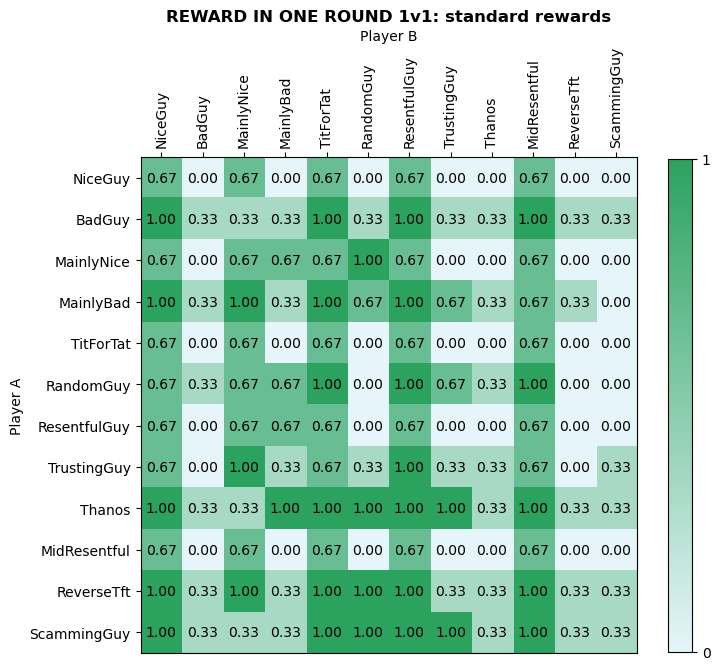

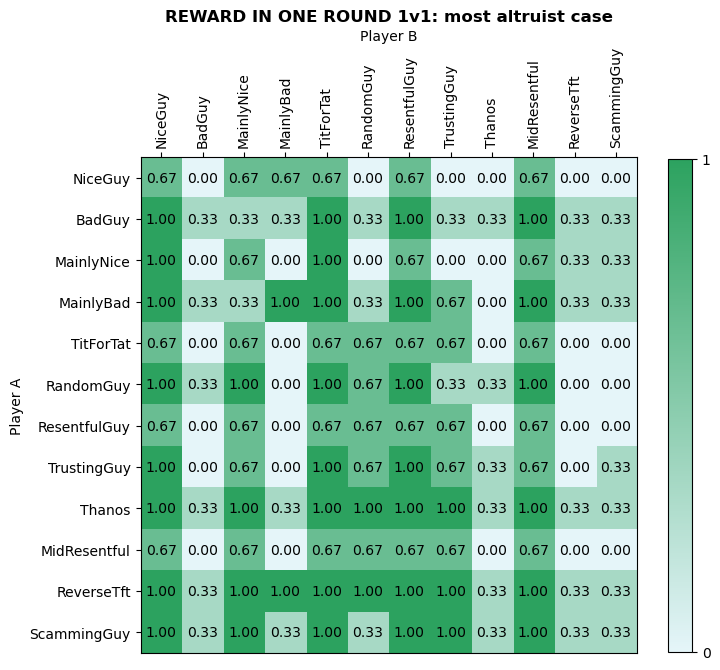

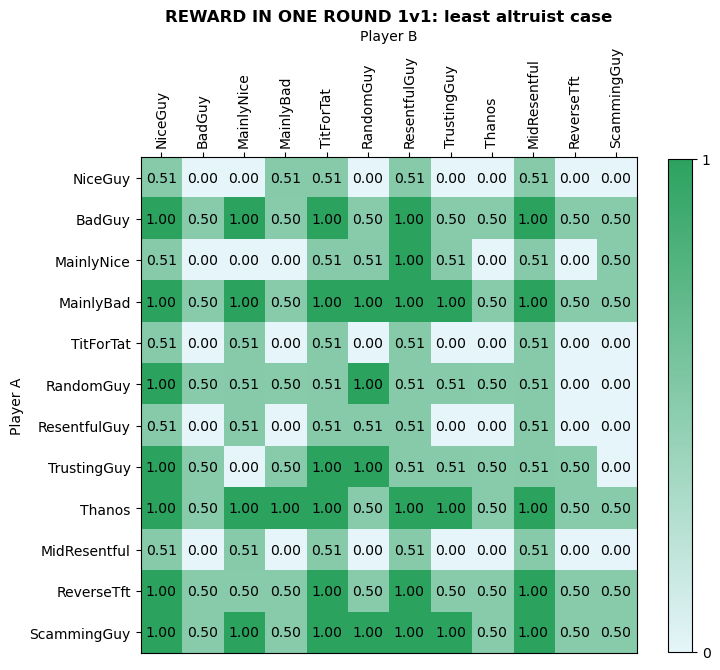

In [9]:
# Let's create a colormap that ranges from dark green to light green (using the XKCD color codes):
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_green", [ "#e5f5f9", "#2ca25f"])

# Labels for the axes with the names of the strategies:
strategy_names = list(strategies.keys())

def plot_rounds(matrix):
    # first we initialize the matrix of rewards: it will be a list that contains the lists with the rewards for each strategy
    # so for example the first row will contain all the rewards of the first strategy vs all strategies (in a 1 turn game each)
    table_rewards = []
    # cycle over all strategies:
    for i, key_1 in enumerate(strategies):
        table_rewards.append([])             # I add a row for each  strategy
        for j, key_2 in enumerate(strategies):
            a, b = round(key_1, key_2, round_number=0, match_history=[[]], M = matrix)
            table_rewards[i].append(a)
    
    # PLOT of the tables:
    fig, ax = plt.subplots(1, 1 ,figsize=(8,8))
    # creiamo il plot con plt.imshow():
    graph = ax.imshow(table_rewards, cmap=custom_cmap)
    cbar = plt.colorbar(graph, shrink=0.8)
    # Imposta la colorbar per mostrare solo valori interi
    cbar.locator = ticker.MaxNLocator(integer=True)
    cbar.update_ticks()
    plt.xticks( ticks=np.arange(len(strategy_names)), labels=strategy_names, rotation=90 )  # rotation for vertical labels
    plt.yticks( ticks=np.arange(len(strategy_names)), labels=strategy_names)
    ax.xaxis.set_label_position('top')     # sposto in alto l'asse x
    ax.xaxis.tick_top()                    # sposto in alto i labels dell'asse x
    # Scriviamo i valori numerici nelle celle:
    for i in range(len(strategy_names)):
        for j in range(len(strategy_names)):
            # j,i are inverted because in matplotlib, like in cartesian coordinates, x refers to ascisse so columns, y to ordinate so rows
            # 'ha and 'va' are horizontal and vertical alignment
            plt.text(j, i, f"{table_rewards[i][j]:.2f}", ha='center', va='center', color='black')
    if  (np.array_equal(matrix,Payoff)):     plt.title("REWARD IN ONE ROUND 1v1: standard rewards", fontweight='bold')
    elif(np.array_equal(matrix,Most_Altruist)): plt.title("REWARD IN ONE ROUND 1v1: most altruist case", fontweight='bold')
    elif(np.array_equal(matrix,Least_Altruist)):  plt.title("REWARD IN ONE ROUND 1v1: least altruist case", fontweight='bold')
    plt.xlabel("Player B")
    plt.ylabel("Player A")
    plt.show()

matrixes = [Payoff, Most_Altruist, Least_Altruist]
for matrix in matrixes: plot_rounds(matrix)

As we can see, excluding random noise due to strategies relying on casual input, the evident winning move for 1 round is to **defect** (see reward rows for BadGuy, Thanos, ReverseTft...) instead altruist strategies like NiceGuy are the losing ones. This is excpeted because, in the standard rewards example, in a 1-turn game logically we have two possibilities: by cooperating we could get 2 or 0 as rewards, but by defecting 3 or 1 for the standard matrix, and the same decreasing return is established as a base rule to decide values for $T$, $R$, $P$ and $S$ ( $R > S$ , $T > P$ always, you can't lose while defecting - the worst case is to draw).

### MATCHES 1 Vs 1 - ALL COMBINATIONS
Let's build a table of all possible 1 Vs 1 single match result, changing also the payoff matrixes previously chosen.

In [10]:
N = 10        # number of rounds

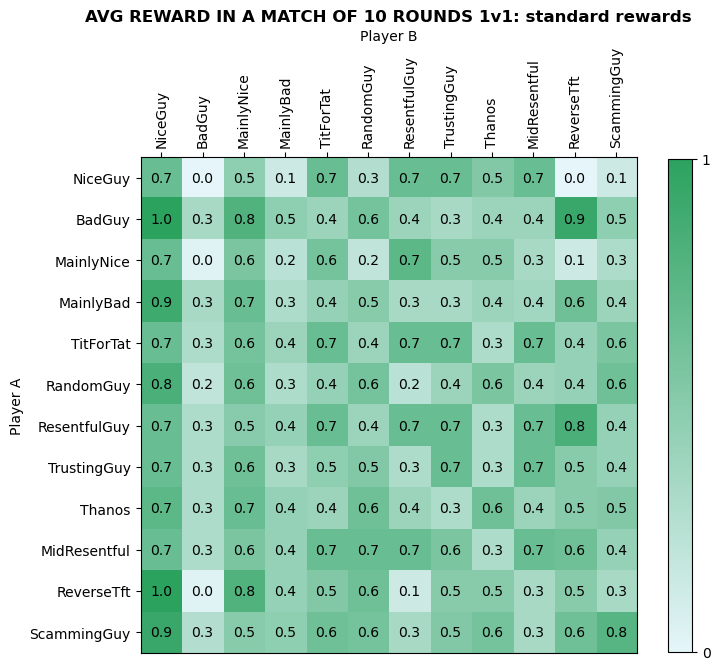

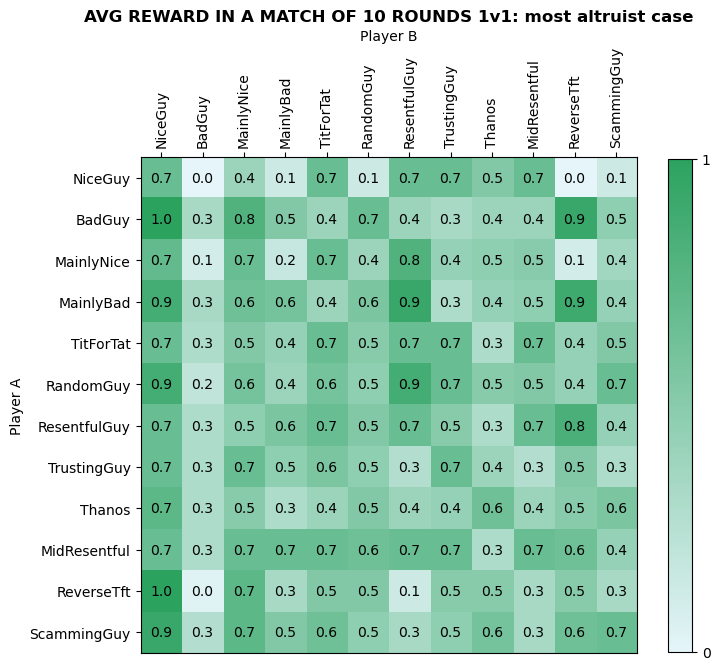

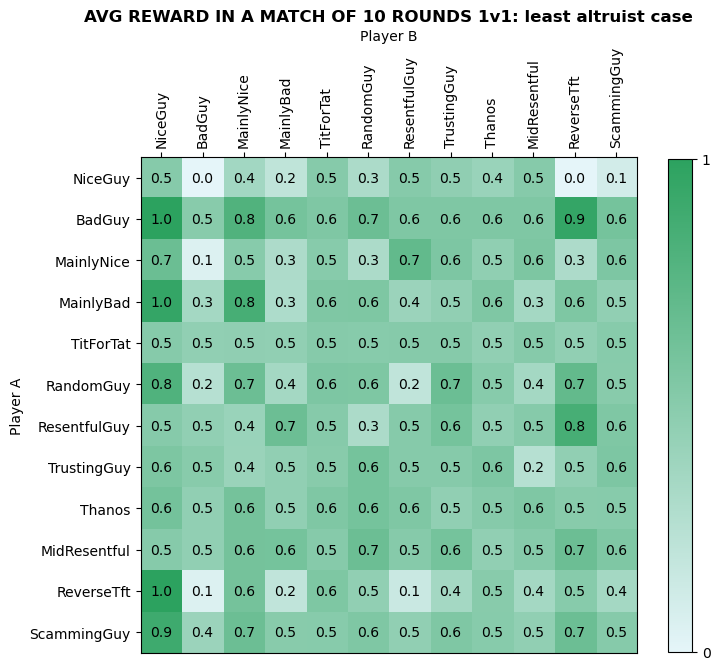

In [11]:
def plot_matches(matrix):
    table_rewards = []               # let's initialize the matrix of rewards of 1v1 rounds for all strategies: dim=(num_strateg)x(num_strateg)
    table_partial_rewards = []       # matrix of partial rewards, for the graphs. dim=(num_strateg)x(num_strateg)xNx2
     
    # cycle over all strategies:
    for i, key_1 in enumerate(strategies):
        table_rewards.append([])             # I add a row for each  strategy
        table_partial_rewards.append([])
        for j, key_2 in enumerate(strategies):
            rew = match(key_1, key_2, N, M = matrix )   # memo: it returns a chronological list of partial rewards
            table_rewards[i].append(rew[-1][0])  
            for round in range(N):
                rew[round][0] *= (round + 1)
                rew[round][1] *= (round + 1)
            table_partial_rewards[i].append(rew)
    
    
    # PLOT of matches rewards (as before):
    fig, ax = plt.subplots(1, 1 ,figsize=(8,8))
    graph = ax.imshow(table_rewards, cmap=custom_cmap)
    cbar = plt.colorbar(graph, shrink=0.8)
    # Imposta la colorbar per mostrare solo valori interi
    cbar.locator = ticker.MaxNLocator(integer=True)
    cbar.update_ticks()
    plt.xticks( ticks=np.arange(len(strategy_names)), labels=strategy_names, rotation=90 ) 
    plt.yticks( ticks=np.arange(len(strategy_names)), labels=strategy_names)
    ax.xaxis.set_label_position('top')  
    ax.xaxis.tick_top()  
    # Inseriamo i valori nelle celle:
    for i in range(len(strategy_names)):
        for j in range(len(strategy_names)):
            plt.text(j, i, f"{table_rewards[i][j]:.1f}", ha='center', va='center', color='black')
    if  (np.array_equal(matrix,Payoff)):     plt.title(f"AVG REWARD IN A MATCH OF {N} ROUNDS 1v1: standard rewards", fontweight='bold')
    elif(np.array_equal(matrix,Most_Altruist)): plt.title(f"AVG REWARD IN A MATCH OF {N} ROUNDS 1v1: most altruist case", fontweight='bold')
    elif(np.array_equal(matrix,Least_Altruist)):  plt.title(f"AVG REWARD IN A MATCH OF {N} ROUNDS 1v1: least altruist case", fontweight='bold')
    plt.xlabel("Player B")
    plt.ylabel("Player A")
    plt.show()
    return table_partial_rewards

tables = []                                          # here we wil save the table_partial_rewards for future plot
for matrix in matrixes: 
    tables.append(plot_matches(matrix))

Also in matches the conclusion is the same: defecting strategies (like BadGuy, Thanos, ReverseTft...) are winning strategies, instead strategies like NiceGuy are losing strategies. This is also expected because for now the goal is to win the match (we are not focusing in the total amount of rewards) so the case of (3,1) rewards given to defecting moves are always (=at every turn) more appealing than cooperating (= possible rewards (2,0)).

**MORAL**: in a world with only 1 other competitor, the best choice is to defect.

### MATCHES BEHAVIOUR
We want to visualize some meaningful graphs showing the trend of rewards of the matches over the sequence of rounds. The focus is to highlight the qualitative behaviour of the strategies during a match.

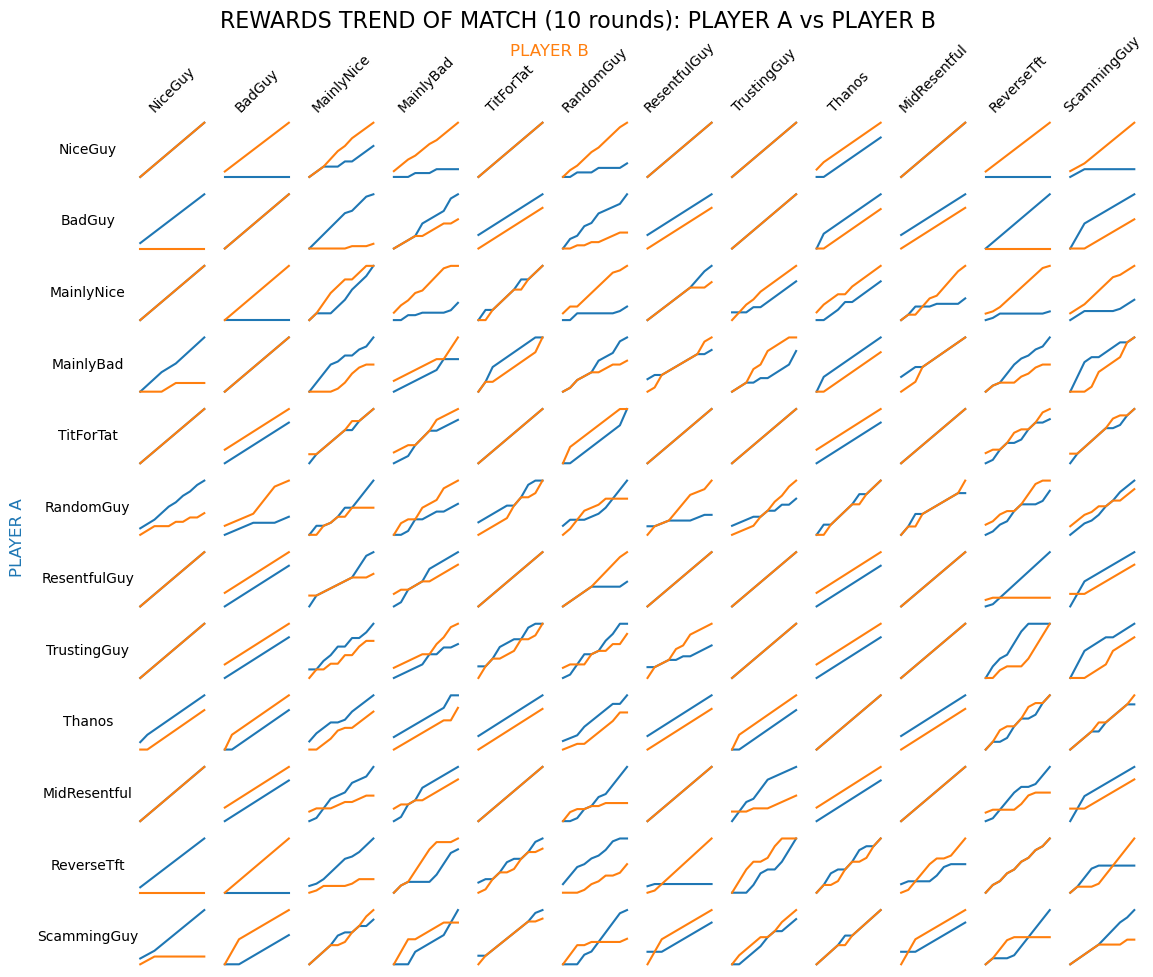

In [12]:
# PLOT of partial rewards to see the evolution of matches:

strategy_names = list(strategies.keys())                              # list with the strategy names
num_strat = len(strategies)                                           # number of strategies

def plot_matches_trend(table_partial_rewards):
    fig, axs = plt.subplots(num_strat, num_strat+1 ,figsize=(14,11))      # one more column for writing strategy names
    x_axis = np.arange(N)          # array for x axis plots
    
    # let's plot graphs:
    for i in range(num_strat):
        for j in range(1, num_strat+1):
            rew_i, rew_j = zip( *table_partial_rewards[i][j-1] )         # extrapolate array of rewards for the two strategies
            # print(type(rew_i))
            # for round in range(N):
            #     rew_i[round] = rew_i[round] * (round + 1) 
            #     rew_j[round] = rew_j[round] * (round + 1)
            axs[i][j].plot(x_axis, rew_i)
            axs[i][j].plot(x_axis, rew_j)
            axs[i][j].axis("off")                                          # remove axes and values for clarity
    
    # let's write strategy names on x axis:
    for j in range(num_strat):
        axs[0][j+1].set_title(f"{strategy_names[j]}", rotation=45, fontsize=10)         # rotation for clarity
    
    # let's write strategy names in blank first column of graphs (so on y axis)
    for i in range(num_strat):
        axs[i][0].axis("off") 
        axs[i][0].text(0.5,0.5,f"{strategy_names[i]}", ha='center', va='center', color='black')
    
    # overall title and axis names
    fig.suptitle(f"REWARDS TREND OF MATCH ({N} rounds): PLAYER A vs PLAYER B", fontsize=16)
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    fig.text(0.48, 0.942, 'PLAYER B', color=colors[1], ha='center', va='center', fontsize=12)  # Asse X
    fig.text(0.1, 0.5, 'PLAYER A', color=colors[0], ha='center', va='center', rotation='vertical', fontsize=12)  # Asse Y

# let's only plot the result for standard rewards (for clarity):
plot_matches_trend(tables[0])

For a low number of rounds (N < 40), the differences in strategy performance are clearly visible in multiple nuances, showing shifts and "overtakes." However, with a high number of rounds (N > 40), the graphs do not display significant peculiarities, mostly dividing into two classes: those that are roughly evenly matched (i.e., strategies that align with the opponent) and others that overwhelmingly win or lose (e.g., BadGuy vs. NiceGuy).
This was predictable, as many of the strategies used - excluding the "fixed" ones (NiceGuy, BadGuy, RandomGuy, etc.)- make particular decisions mainly in the early rounds (a sort of transient phase), before almost always settling into a fixed strategy.

Let's zoom now on the matches of the best performing strategy, a defecting strategy: the BadGuy

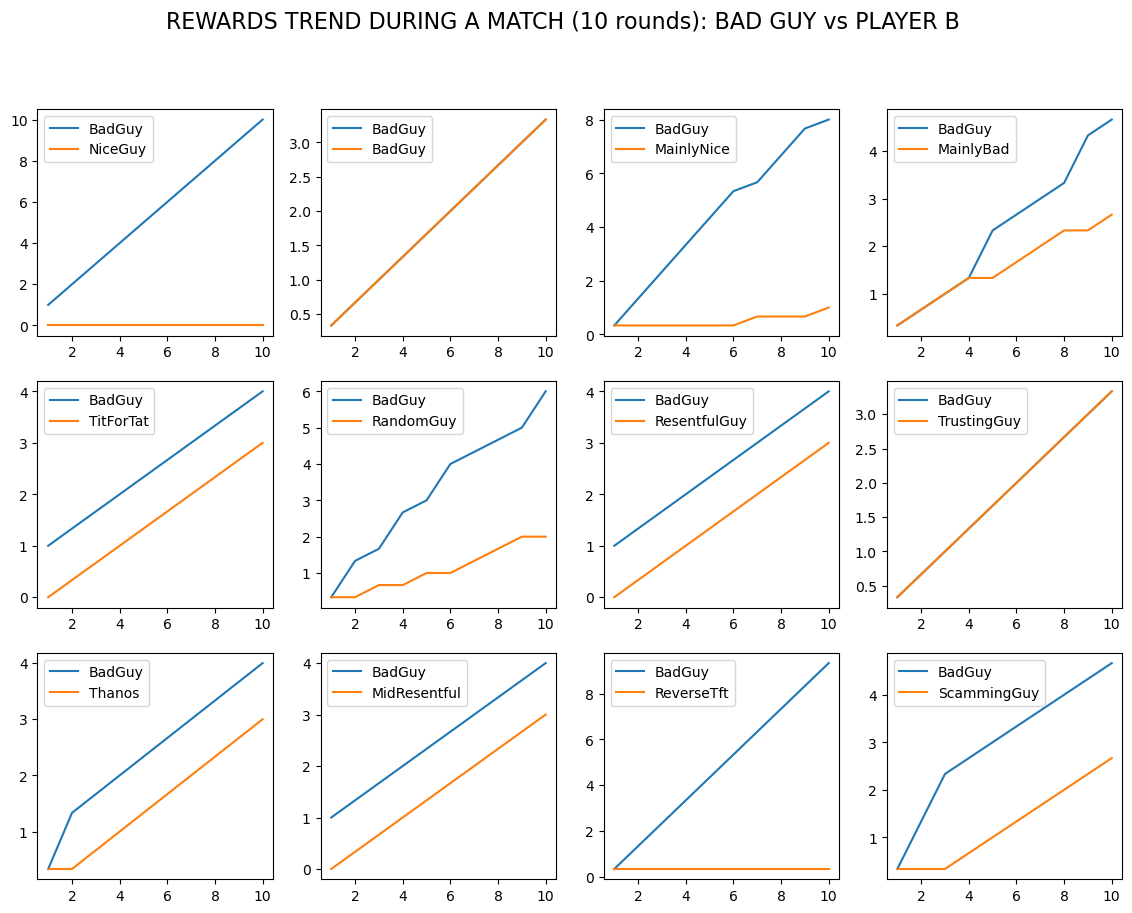

In [13]:
# PLOT of bad_guy matches

def plot_bad_guy_matches(table_partial_rewards):
    fig, axs = plt.subplots(3, 4 ,figsize=(14,10))      
    x_axis = np.arange(1, N+1)                                                 # array for x axis plots
    
    # let's plot graphs:
    k_i = 0
    for i in range(3):
        for j in range(4):
            rew_i, rew_j = zip( *table_partial_rewards[1][k_i] )           # extrapolate array of rewards for the two strategies
            axs[i][j].plot(x_axis, rew_i, label="BadGuy")
            axs[i][j].plot(x_axis, rew_j, label=f"{strategy_names[k_i]}")
            axs[i][j].legend()
            k_i = k_i +1
            
    # overall title:
    fig.suptitle(f"REWARDS TREND DURING A MATCH ({N} rounds): BAD GUY vs PLAYER B", fontsize=16)


plot_bad_guy_matches(tables[0])

As said before, defecting strategies (like BadGuy above) are winning strategies. In our example the bad guy is winning every match, except a draw with himself.

# Multiple Players Prisoner's Dilemma
### Work division:
Part 2: Mattia Ponchio

## Tourney function ##
A tourney is a multiple player IPD, where several strategies play against each other in a round-robin scheme. \
In our implementation, each participant can implement a given strategy, with no restrictions to the number of total players or the frequency of each strategy (however with N players there are $ \begin{pmatrix} N \\ 2 \end{pmatrix}$ pairing combinations, so it scales with $N^2$ ). \
Moreover, we consider as standard population the list of participants made of exactly 1 player for each defined strategy and the default payoff matrix $M$:
$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix} = 
\begin{pmatrix} 
2 & 0 \\
3 & 1 
\end{pmatrix}
$$

In [14]:
def tourney(participants={},N_rounds = 10, M = Payoff):
    # Retrieve only the names of the strategies repeated as many times as their frequency allows.
    player_list_from_dict = []
    for item in (list(participants.keys())):
        for i in range (participants[item]):
            player_list_from_dict.append(item)
    # Compute the combinations; List which will be used to have the scores of each match by the side of the two opponents
    list_with_scores = list(itertools.combinations(player_list_from_dict, 2))
    N_giornata = len(list_with_scores)
    # Loop over the combinations one by one
    for i in range (N_giornata):
        # Player1 and Player2 strategies
        player1 = list_with_scores[i][0]
        player2 = list_with_scores[i][1]
        # Initiliaze an empty list to store the results over the match
        AllRewards = []
        # Do the match between the two players and update the rewards; The ordered syntax for match is:
        # match( key_1, key_2, N_rounds = 10, M = Payoff ) : 
        AllRewards =  match(player1, player2, N_rounds, M)
        # Retrieve the final scores for Player1 and Player2 as the last element in the list
        R1, R2 = AllRewards[-1][0], AllRewards[-1][1]
        list_with_scores[i] += (R1,R2)
    # Un-comment the following print to debug
    #for item in list_with_scores: print(item)
    
    # Good, now each combination has the corresponding score: we now need to assign it to the respective players and calculate the final score
    strat = list(participants.keys())
    freq = [participants[key] for key in strat]
    named =[]
    # Add identification to the layer trough the use of a numerical value from 1 up to their frequency BUT PRESERVE THE ORDER
    for key,f in zip (strat,freq):
        for j in range(1,f+1):
            if (f!=0):
                named.append(key + str(j))
    # Compute the permutations preserving the order
    with_names = list(itertools.combinations(named,2))
    # Copy the scores for each match over to the ones with identification
    # In list_with_scores[I][J] we have: I = ordered number of the combination, and J:
    # J=0 is 1st strategy; J=1 is 2nd strategy; J=2 is Player1 score; J=3 is Player2 score
    for i in range (N_giornata): with_names[i] += (list_with_scores[i][2],list_with_scores[i][3] )
    # Un-comment the following print to debug
    #for item in with_names: print(item)

    # Compute the score for each named player and add it to the list
    FinalScores = []
    for player in named:
        SumOver1 = np.sum([ with_names[i][2] for i in range (N_giornata) if (with_names[i][0] == player) ])
        SumOver2 = np.sum([ with_names[i][3] for i in range (N_giornata) if (with_names[i][1] == player) ])
        # Normalize the score by the number of opponents in the tourney
        FinalScores.append( (SumOver1 + SumOver2)/(np.sum(freq)-1) )
    Results = named
    
    for i in range (len(Results)):
        Results[i] = (Results[i],FinalScores[i])

    return ( Results )    

In [15]:
# Tourney test
test_part ={ 
    'NiceGuy' : 1,
    'BadGuy' : 1,
    'MainlyNice' : 1,
    'MainlyBad' : 1,
    'RandomGuy' : 1,
    'TitForTat' : 1,
    'ResentfulGuy' : 1,
    'TrustingGuy' : 1,
    'Thanos' : 1,
    'MidResentful' : 1,
    'ReverseTft': 1,
    'ScammingGuy': 1,
}

result = tourney(test_part,N_rounds = N_ROUNDS, M = Payoff)
#for item in result: print(item)
print("Here's the Ranking for the top 12 players at the end of the tourney:")
# Sorted gives a copy, while using LIST.sort() does it in place.
Ranking = sorted(result,reverse=True, key=lambda x: x[1])
for item in (Ranking[:12]): print(f"{item[0]:<15} {item[1]:.3f}")

Here's the Ranking for the top 12 players at the end of the tourney:
MainlyBad1      0.582
BadGuy1         0.552
TitForTat1      0.533
ResentfulGuy1   0.533
MidResentful1   0.530
ScammingGuy1    0.524
RandomGuy1      0.506
Thanos1         0.500
TrustingGuy1    0.455
ReverseTft1     0.448
MainlyNice1     0.421
NiceGuy1        0.400


As we can see, strategies that are more likely to **defect** perform better than the others, with a top position being occupied by the **BadGuy** most of the times but depending on the behaviour of the random strategies also the ResentfulGuy or others can take the crown. \
To account for the variability of the various random-based strategies, we can **average** the results over the players with the same strategy.

In [16]:
# Retrieve the participants to the tourney as the players with non-zero frequency: needed to avoid divisions by zero with the mean
labels = [ x for (x,f) in test_part.items() if f!=0 ]
# Get the name of the player, that is the strategy with numerical identifier
players = [ result[i][0] for i in range (len(result)) ]
# Get their respective scores
rewards = [ result[i][1] for i in range (len(result)) ]

mean_rewards= []
index = 0

for item in players:
    # Make it a string to apply the count method: returns the number of times a substring is included in the main string
    f = str(players).count(item)
    # Compute the mean of their rewards: since players in result are listed in strategy order this is valid
    mean = (np.sum(rewards[index:index+f]))/f
    mean_rewards.append(mean)
    index += f
mean_result = list(zip(labels, mean_rewards))
mean_ranking = sorted(mean_result,reverse=True, key=lambda x: x[1])
for item in mean_ranking: print(f"{item[0]:<15} {item[1]:.3f}")

MainlyBad       0.582
BadGuy          0.552
TitForTat       0.533
ResentfulGuy    0.533
MidResentful    0.530
ScammingGuy     0.524
RandomGuy       0.506
Thanos          0.500
TrustingGuy     0.455
ReverseTft      0.448
MainlyNice      0.421
NiceGuy         0.400


## Mean Tourney ##
Since not all strategies are deterministic and, therefore, players with the same strategy may perform differently, we want to see the effects of this stochasticity. In order to do that, with the mean tourney function we proceed by:
1) Averaging over the scores of the players with the same strategy, since it's how the strategy itself performs that we are interested in.
2) Averaging over multiple runs of the tourney with the same settings (e.g the list of participants and the payoff matrix).

In [17]:
def mean_tourney(participants={},N_rounds = 10, M = Payoff,repeats=10):
    # Retrieve the participants to the tourney as the players with non-zero frequency: needed to avoid divisions by zero with the mean
    labels = [ x for (x,f) in participants.items() if f!=0 ]
    mean_ranking = dict( [(l,[]) for l in labels ] )

    # Dictionary to store how many times each strategy comes 1st, 2nd or 3rd respectively
    top3 = { key:np.array([0,0,0]) for key in labels } 
    
    for j in range(0,repeats):
        result = tourney(participants, N_rounds,M)
        
        # Get the name of the player, that is the strategy with numerical identifier
        players = [ result[i][0] for i in range (len(result)) ]
        # Get their respective scores
        rewards = [ result[i][1] for i in range (len(result)) ]
        # Dictionary to store the result by strategy: order is the same as the ranking dictionary
        mean_rewards= dict( [(l,0) for l in labels ] )
        index = 0
        for item in labels:
            # Make it a string to apply the count method: returns the number of times a substring is included in the main string
            f = str(players).count(item)
            # Compute the mean of their rewards: since players in result are listed in strategy order this is valid
            mean = np.mean(rewards[index:index+f])
            mean_rewards[item] = mean
            index += f
        # Update the ranking dictionary with the score for each strategy averaged over all the players with the same strategy
        for key in (mean_ranking.keys()): mean_ranking[key].append(mean_rewards[key])
        # Retrieve the top 3 strategies and update the top3 dictionary: it's important to use .items() with the dictionary, since
        # without it the sorting defaults to sorting and returning the keys, which in this case would mean order them alphabetically
        ordered = sorted(mean_rewards.items(), reverse=True, key=lambda x: x[1])
        first, second, third = str(ordered[0][0]), str(ordered[1][0]), str(ordered[2][0])
        # Syntax: top3[strategy][placement: 0-->First, 1-->Second, 2-->Third]
        top3[first][0] += 1
        top3[second][1] += 1
        top3[third][2] += 1

    # Compute mean and its error for each strategy across all repetitions
    deg_of_freed = 0
    if (repeats >1): deg_of_freed = repeats - 1
    for key in mean_ranking.keys(): mean_ranking[key] = [ np.mean(mean_ranking[key]), np.std(mean_ranking[key], ddof=deg_of_freed)/np.sqrt(repeats) ]
    mean_df = pd.DataFrame(mean_ranking.values(),index=mean_ranking.keys(),columns=["Mean Score", "Mean Error"])
    
    # Optional: Express frequeny in top3 as percentages; values are numpy-array so operations are element-wise
    for key in top3.keys(): top3[key] = top3[key]/repeats*100
    top_df = pd.DataFrame(top3.values(),index=top3.keys(),columns=["First [%]", "Second [%]", "Third [%]"])
    
    return mean_df, top_df

In [18]:
mean_result_df, top3_df = mean_tourney(test_part,N_rounds = N_ROUNDS, M = Payoff,repeats=100)
pd.options.display.float_format = '{:.3f}'.format
# Concatenate dataframes to show them side by side and optionally sort them by the most frequent winner
display( pd.concat((top3_df.sort_values(by=["First [%]"],ascending=False), mean_result_df),axis=1) )

First [%]  Second [%]  Third [%]  Mean Score  Mean Error
BadGuy           77.000      21.000      2.000       0.579       0.016
MainlyBad        12.000      13.000     13.000       0.530       0.038
ResentfulGuy      8.000      23.000     23.000       0.535       0.024
RandomGuy         2.000       7.000      6.000       0.486       0.043
MidResentful      1.000      27.000     37.000       0.540       0.013
NiceGuy           0.000       0.000      0.000       0.390       0.016
MainlyNice        0.000       0.000      1.000       0.445       0.038
TitForTat         0.000       0.000      5.000       0.514       0.013
TrustingGuy       0.000       1.000      3.000       0.487       0.029
Thanos            0.000       0.000      0.000       0.478       0.012
ReverseTft        0.000       0.000      0.000       0.442       0.027
ScammingGuy       0.000       8.000     10.000       0.520       0.018

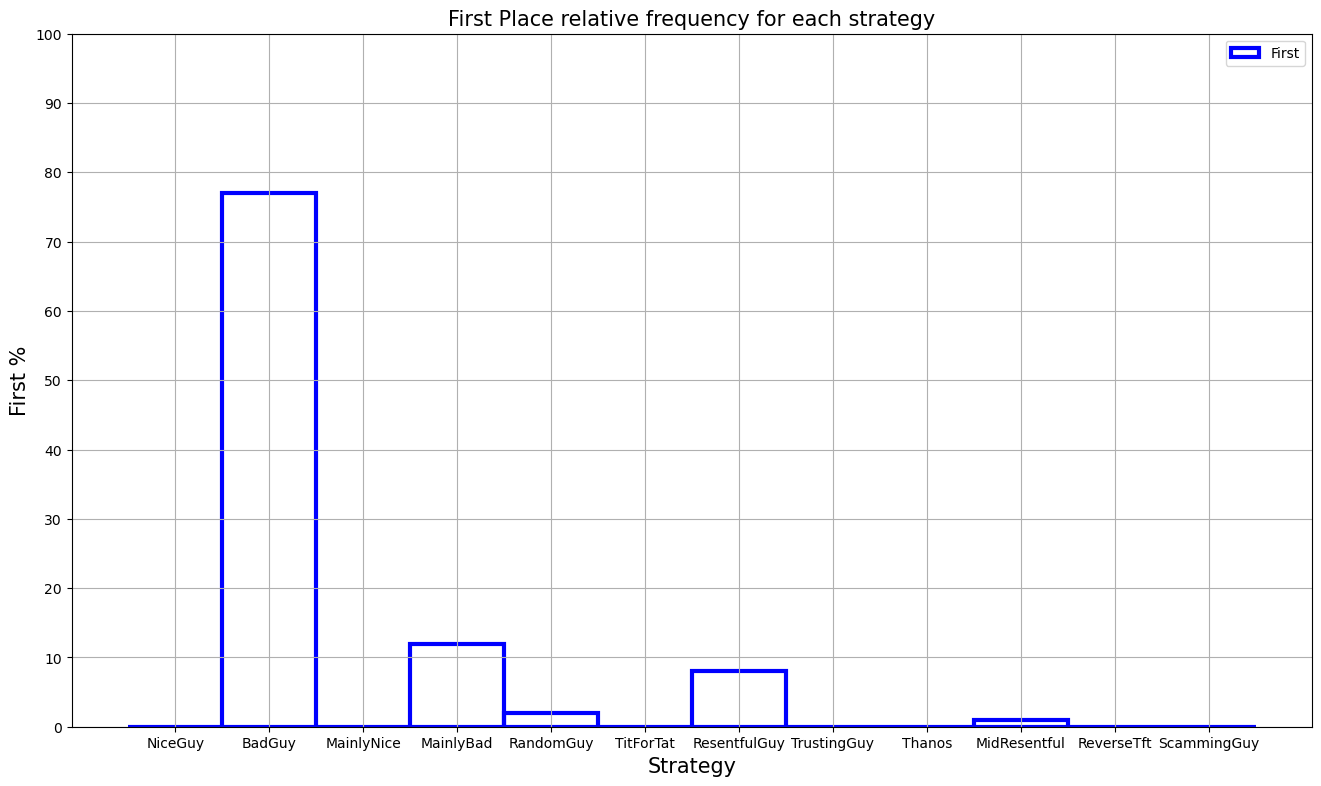

In [19]:
#display(top3_df)
fig, ax = plt.subplots(figsize=(16,9))
centers = np.arange(0,len(top3_df))
labels = list(top3_df.index.values)
freq = top3_df["First [%]"]
#freq2 = top3_df["Second [%]"]
#ax.scatter(centers,freq)
ax.set_xticks(ticks=centers, labels=labels)
ax.set_ylim(0,100)
ax.set_yticks(np.arange(0,101,10))
ax.grid()
ax.set_xlabel("Strategy", fontsize=15)
ax.set_ylabel("First %", fontsize =15)
plt.bar(labels,freq,1,edgecolor="blue",label="First",fill=False,ls="-",lw=3)
#plt.bar(labels,freq2,1,edgecolor="orange",label="Second",fill=False,ls="-",lw=3)
ax.legend()
ax.set_title("First Place relative frequency for each strategy", fontsize=15)
plt.show()

In [20]:
# Sanity check
p_t = test_parameters(10)
for item in p_t:
    assign_test = get_new_Payoff(item)
    #print(f"{item} is ok")

# Retrieve the matrix values with the highest tested parameter
biggest_T = p_t[p_t[:,0]==p_t[-1,0]]
#print(biggest_T)

# Get the coefficients with the biggest disparity between T (succesfully defecting) and R (succesfully cooperating) and high P (both defect):
# we want to see what happens when we heavily incentivise defecting
#TR_gap = int(biggest_T[0,0]-biggest_T[0,1])
Promote_Defect = get_new_Payoff([10,6,5,1])
# Get the coefficients with the least disparity between T (succesfully defecting) and R (succesfully cooperating) and P is low, with S as
#high as possible: we want to see what happens when defecting is discouraged
Discourage_Defect = get_new_Payoff([10,9,1,0])

# Get the payoff matrix of the type [N, N-1, N-2, N-3] with N the biggest T in p_t; in this case it's [10, 9, 8, 7]
Sequential = get_new_Payoff(biggest_T[-1])

print("With Promote Defect payoff matrix:\n", Promote_Defect)
result_Promote_Defect, Promote_Defect_top3 = mean_tourney(test_part,N_rounds = N_ROUNDS, M = Promote_Defect, repeats=100)
# For our analysis, the strategy that gets first the most time is the most important information
display( pd.concat( (Promote_Defect_top3.sort_values(by=["First [%]"],ascending=False), result_Promote_Defect),axis=1) )

print("With Discourage Defect payoff matrix:\n", Discourage_Defect)
result_Discourage_Defect, Discourage_Defect_top3 = mean_tourney(test_part,N_rounds = N_ROUNDS, M = Discourage_Defect,repeats=100)
display( pd.concat( (Discourage_Defect_top3.sort_values(by=["First [%]"],ascending=False), result_Discourage_Defect),axis=1) )

print("With Sequential payoff matrix:\n", Sequential)
result_Sequential, Sequential_top3 = mean_tourney(test_part,N_rounds = N_ROUNDS, M = Sequential,repeats=100)
display( pd.concat( (Sequential_top3.sort_values(by=["First [%]"],ascending=False), result_Sequential),axis=1) )

With Promote Defect payoff matrix:
 [[ 6  1]
 [10  5]]


First [%]  Second [%]  Third [%]  Mean Score  Mean Error
BadGuy           98.000       2.000      0.000       0.649       0.013
MainlyBad         2.000      55.000     18.000       0.560       0.033
NiceGuy           0.000       0.000      0.000       0.325       0.013
MainlyNice        0.000       0.000      0.000       0.414       0.034
RandomGuy         0.000       5.000      8.000       0.494       0.036
TitForTat         0.000       0.000      0.000       0.491       0.006
ResentfulGuy      0.000      12.000     21.000       0.528       0.027
TrustingGuy       0.000       0.000      1.000       0.490       0.019
Thanos            0.000       0.000      0.000       0.511       0.010
MidResentful      0.000      11.000     31.000       0.540       0.010
ReverseTft        0.000       0.000      0.000       0.446       0.021
ScammingGuy       0.000      15.000     21.000       0.534       0.020

With Discourage Defect payoff matrix:
 [[ 9  0]
 [10  1]]


First [%]  Second [%]  Third [%]  Mean Score  Mean Error
TitForTat        38.000      22.000     23.000       0.564       0.026
ResentfulGuy     23.000      22.000     14.000       0.551       0.034
MidResentful     11.000      22.000     13.000       0.540       0.032
TrustingGuy      10.000       5.000     14.000       0.505       0.062
MainlyNice        7.000       9.000      6.000       0.503       0.054
NiceGuy           5.000      11.000     20.000       0.529       0.022
RandomGuy         4.000       5.000      6.000       0.480       0.055
MainlyBad         2.000       4.000      1.000       0.444       0.054
BadGuy            0.000       0.000      0.000       0.432       0.022
Thanos            0.000       0.000      0.000       0.412       0.021
ReverseTft        0.000       0.000      0.000       0.428       0.027
ScammingGuy       0.000       0.000      3.000       0.486       0.029

With Sequential payoff matrix:
 [[ 9  7]
 [10  8]]


First [%]  Second [%]  Third [%]  Mean Score  Mean Error
BadGuy           83.000      15.000      2.000       0.579       0.015
ResentfulGuy      8.000      31.000     19.000       0.539       0.023
MainlyBad         3.000      12.000     10.000       0.520       0.028
RandomGuy         3.000       8.000      6.000       0.485       0.047
MidResentful      2.000      25.000     43.000       0.541       0.014
ScammingGuy       1.000       5.000     11.000       0.520       0.019
NiceGuy           0.000       0.000      0.000       0.392       0.016
MainlyNice        0.000       0.000      0.000       0.448       0.034
TitForTat         0.000       2.000      5.000       0.514       0.011
TrustingGuy       0.000       2.000      3.000       0.493       0.028
Thanos            0.000       0.000      1.000       0.477       0.013
ReverseTft        0.000       0.000      0.000       0.439       0.024

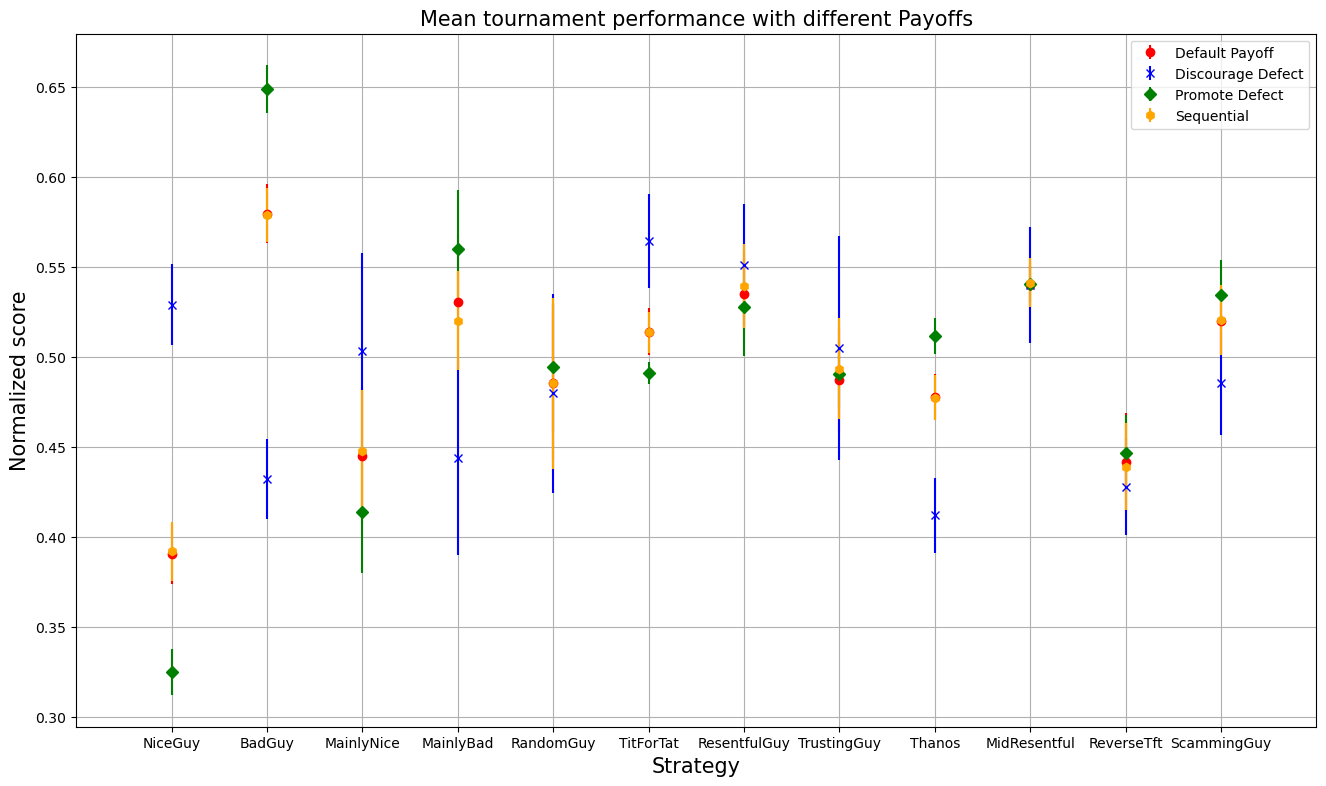

In [21]:
# Scatter plot to visualize results
names = mean_result_df.index
x_vals = np.arange(1,len(names)+1,1)

fig, ax = plt.subplots(figsize=(16,9))
# with my version of matplotlib - 3.9.2 - ls="" is needed to hide lines connecting the dots
ax.errorbar(x_vals, mean_result_df["Mean Score"], yerr =mean_result_df["Mean Error"], label = "Default Payoff", color = "red", marker  = "o",ls='')
ax.errorbar(x_vals, result_Discourage_Defect["Mean Score"], yerr=result_Discourage_Defect["Mean Error"], label = "Discourage Defect", color = "blue", marker = "x",ls='')
ax.errorbar(x_vals, result_Promote_Defect["Mean Score"], yerr=result_Promote_Defect["Mean Error"] ,label = "Promote Defect", color = "green", marker = "D",ls='')
ax.errorbar(x_vals, result_Sequential["Mean Score"], yerr=result_Sequential["Mean Error"] ,label = "Sequential", color = "orange", marker = "h",ls='')
ax.set_title("Mean tournament performance with different Payoffs",fontsize=15)
ax.set_xlabel("Strategy",fontsize=15)
ax.set_xlim(0,len(names)+1)
ax.set_xticks(x_vals)
ax.set_ylabel("Normalized score",fontsize=15)

ax.set_xticklabels(names)
ax.grid()

ax.legend()
plt.show()


Here we highlight that, due to the chosen normalization, sets of $[T,R,P,S] = [ J, J-1, J-2, J-3 ]$ produce the same results. \
Instead, unbalanced Payoff matrices exacerbate different behaviours: **Promote defect** $[ 10, 6, 5, 1 ]$ increases the difference between $P$ and $S$ while maintaining high $P$ with respect to $R$, so that **both defecting is almost as rewarding as both cooperating**, therefore promoting defecting.\
**Discourage defect** $[ 10, 9, 1, 0 ]$ reduces the difference between $T$ and $R$ as much as possible, so that **cooperating is almost as rewarding as succesfully betraying the opponent**, while having a low $P$ and, therefore, encouraging cooperation.

## Explore different Payoffs ##
In this section we examine the effect of changing the Payoff matrix in the case of the standard population, varying the coefficients up to MAX_VALUE (which has been set to 30 for the purpose of the presentation and will take some time to run for higher values).

In [22]:
RUN_AGAIN = False
MAX_VALUE = 30

if(RUN_AGAIN):
    coeffs = test_parameters(MAX_VALUE)
    print(len(coeffs))
    # Retrieve the participants to the tourney as the players with non-zero frequency: needed to avoid divisions by zero with the mean
    labels = [ x for (x,f) in test_part.items() if f!=0 ]
    
    # In order to create adataframe to store matrix coefficients, 1st classified's score, 2nd and 3rd classified score differences we use
    # a numpy array to first retrieve the data and then build the dataframe from there: we could use concat, but that basically
    # generates a new dataframe at each iteration, which is not ideal
    
    # Use the "object" type for strings instead of dtype="U#" where # is the maximum chars that our strings will contain because, while slower,
    # it will greatly simplify data type recognition in the pandas dataframe
    winners_strategy = np.empty(shape=(len(coeffs),3),dtype="object")
    winners_scores = np.zeros(shape=(len(coeffs),3),dtype=float)
    # index to go through the above containers
    i = 0
    
    for c in coeffs:
        payoff_matrix = get_new_Payoff(c)
        result_df, top3_df = mean_tourney(test_part,N_rounds = N_ROUNDS, M = payoff_matrix, repeats=20)
        both = pd.concat( (top3_df.sort_values(by=["First [%]"],ascending=False), result_df),axis=1 )
        first, second, third = both.iloc[0].name, both.iloc[1].name, both.iloc[2].name
        winners_strategy[i] = [ first, second, third ]
        winners_scores[i] = [ both["Mean Score"][first], both["Mean Score"][first] - both["Mean Score"][second],
                             both["Mean Score"][first] - both["Mean Score"][third] ]
        i +=1
        
    result_df = pd.DataFrame(np.hstack((coeffs,winners_strategy,winners_scores)),columns=("T","R","P","S","1st Strategy","2nd Strategy",
                                                                                          "3rd Strategy", "1st Score", "From 2nd","From 3rd") )
    # Fix the number of digits showed
    pd.options.display.float_format = '{:.4f}'.format
    display(result_df)
    result_df.to_pickle(f"MaxT-{MAX_VALUE}.pkl")
    #result_df.to_pickle(f"Final-MaxT-{MAX_VALUE}.pkl")

In [23]:
#winners = pd.read_pickle(f"MaxT-{MAX_VALUE}.pkl")
winners = pd.read_pickle(f"Final-MaxT-{MAX_VALUE}.pkl")
winners

T   R   P   S 1st Strategy 2nd Strategy 3rd Strategy 1st Score  \
0       3   2   1   0       BadGuy    MainlyBad  TrustingGuy     0.585   
1       4   3   1   0       BadGuy    MainlyBad  TrustingGuy     0.541   
2       4   3   2   0       BadGuy      NiceGuy   MainlyNice     0.694   
3       4   3   2   1       BadGuy    MainlyBad  TrustingGuy     0.589   
4       5   3   1   0       BadGuy  TrustingGuy    MainlyBad     0.501   
...    ..  ..  ..  ..          ...          ...          ...       ...   
23620  30  29  28  23       BadGuy      NiceGuy   MainlyNice     0.826   
23621  30  29  28  24       BadGuy      NiceGuy   MainlyNice     0.795   
23622  30  29  28  25       BadGuy      NiceGuy   MainlyNice     0.753   
23623  30  29  28  26       BadGuy      NiceGuy   MainlyNice     0.694   
23624  30  29  28  27       BadGuy  TrustingGuy      NiceGuy     0.594   

      From 2nd From 3rd  
0        0.064    0.053  
1        0.022    0.040  
2        0.294    0.230  
3        0.065    0.061  
4        0.039    0.049  
...        ...      ...  
23620    0.384    0.314  
23621    0.364    0.278  
23622    0.340    0.248  
23623    0.308    0.232  
23624    0.071    0.249  

[23625 rows x 10 columns]

In [24]:
#1st places for strategies in %: get the frequency of first places with size and normalize by the total
ones = winners.groupby(["1st Strategy"]).size()/(winners.groupby(["1st Strategy"]).size().sum())*100
twos = winners.groupby(["2nd Strategy"]).size()/(winners.groupby(["2nd Strategy"]).size().sum())*100
threes = winners.groupby(["3rd Strategy"]).size()/(winners.groupby(["3rd Strategy"]).size().sum())*100

overall_ranking = pd.DataFrame(pd.concat((ones,twos,threes),axis=1) )
overall_ranking.rename(columns={0:"First [%]", 1: "Second [%]", 2: "Third [%]"},inplace=True)
overall_ranking.fillna(value=0, inplace=True)
overall_ranking.sort_values(by=["First [%]"],ascending=False, inplace=True)
overall_ranking

First [%]  Second [%]  Third [%]
BadGuy           74.066       3.204      2.971
ResentfulGuy     13.198      16.114      9.325
TitForTat         5.520       5.295      4.859
MidResentful      4.127       9.139     10.154
MainlyBad         1.274      17.130      9.541
TrustingGuy       0.720      10.984     10.764
RandomGuy         0.669       1.922      4.457
MainlyNice        0.419       1.134     37.397
ScammingGuy       0.008       0.085      0.453
NiceGuy           0.000      34.993     10.078

As we can see, the **Bad Guy** strategy (always defect) is the **most successful** one for the majority of the Payoff matrixes explored.
However, there are regions in the [T,R,P,S] parameters space where this is not the case, which we visualize below.

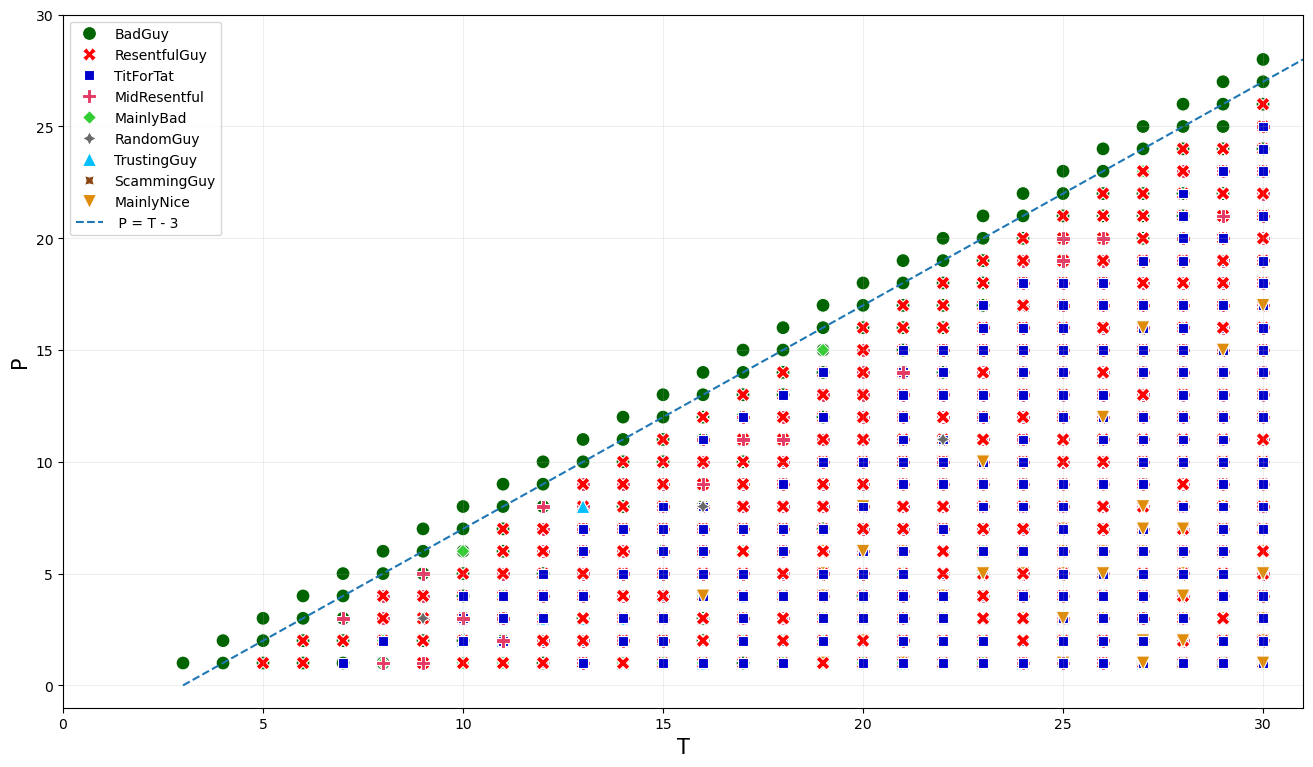

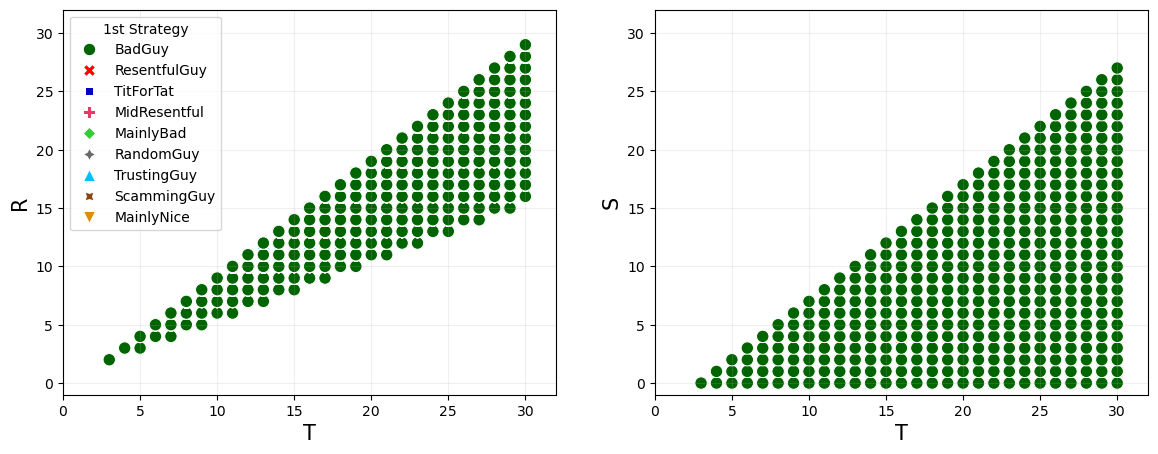

In [32]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlim(0,31)
ax.set_ylim(-1,30)
ax.grid(alpha=0.2)
sns.scatterplot(data=winners,x="T", y="P", hue="1st Strategy", style = "1st Strategy", palette = color_dic, s=100)
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
xs = np.linspace(3,31,1000)
ys = xs - 3
ax.plot(xs,ys, label =" P = T - 3 ", ls="--")
plt.legend()
plt.show()

fig, axs = plt.subplots(1,2, figsize=(14,5))
for i in range(2):
    axs[i].set_xlim(0,32)
    axs[i].set_ylim(-1,32)
    axs[i].grid(alpha=0.2)
    axs[i].xaxis.get_label().set_fontsize(15)
    axs[i].yaxis.get_label().set_fontsize(15)
sns.scatterplot(data=winners,x="T", y="R", hue="1st Strategy", style = "1st Strategy", palette = color_dic, ax=axs[0], s=80 )
sns.scatterplot(data=winners,x="T", y="S", hue="1st Strategy", style = "1st Strategy", palette = color_dic, ax=axs[1] , s=80)
axs[0].get_legend().set_visible(True)
axs[1].get_legend().set_visible(False)
#fig.tight_layout()
plt.show()

Here, for example, we see that for $ P < T -3 $ the best performing strategies include **Tit For Tat**, **Resentful Guy** and **Mid Resentful**, which are strategies that take notice of the moves that their opponent did in order to choose their own move.

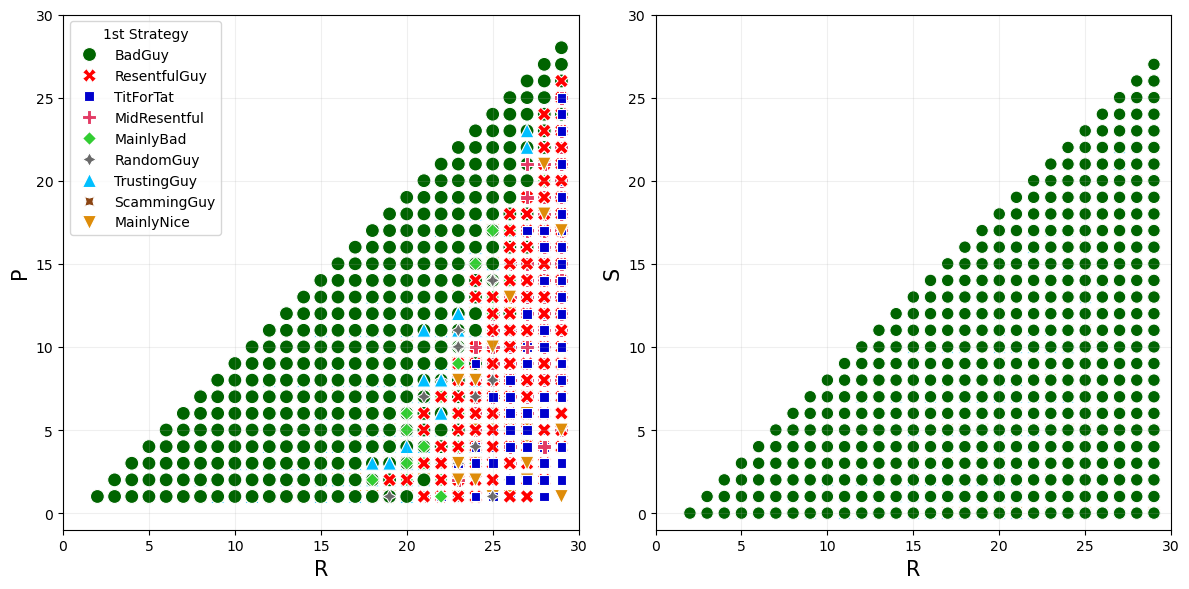

In [33]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
for i in range(2):
    axs[i].set_xlim(0,30)
    axs[i].set_ylim(-1,30)
    axs[i].grid(alpha=0.2)
    axs[i].xaxis.get_label().set_fontsize(15)
    axs[i].yaxis.get_label().set_fontsize(15)
sns.scatterplot(data=winners,x="R", y="P", hue="1st Strategy", style = "1st Strategy", palette = color_dic, ax=axs[0], s=100 )
#plt.show()
sns.scatterplot(data=winners,x="R", y="S", hue="1st Strategy", style = "1st Strategy", palette = color_dic, ax=axs[1], s=80)
#plt.show()
axs[1].get_legend().set_visible(False)
fig.tight_layout()

In the  graph on the left we see how, for **high $R$** (both cooperating) and for **decreasing $P$** (both defecting), there is an increase in the variety of the winning strategy, since **cooperating gets increasingly better**.

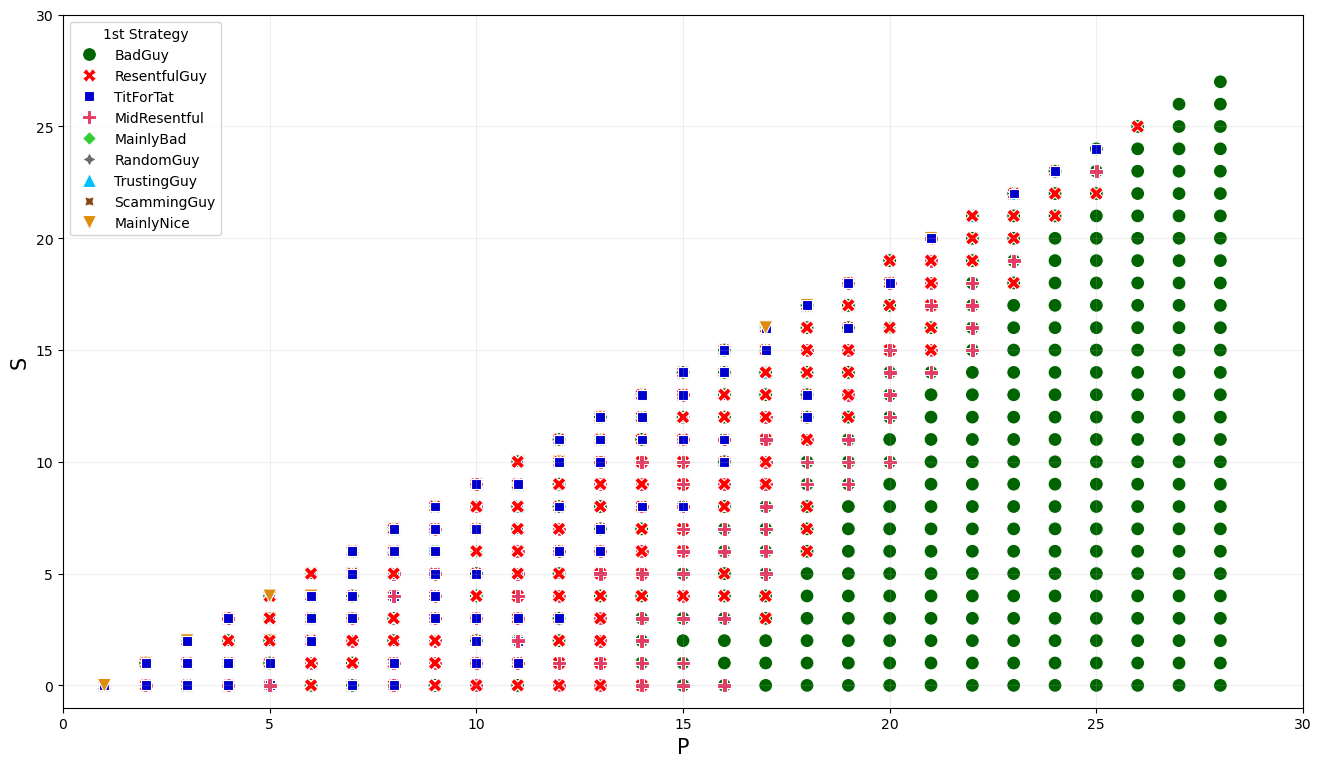

In [34]:
fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlim(0,30)
ax.set_ylim(-1,30)
ax.grid(alpha=0.2)
sns.scatterplot(data=winners,x="P", y="S", hue="1st Strategy", style = "1st Strategy", palette = color_dic, s=100 )
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

Finally, if we consider a **big enough $P$** (both defecting), with respect to the maximum value it can have, we get back to the **Bad Guy** dominating, since defecting becomes even more encouraged.

# Multiple Players Iterative Prisoner's Dilemma
### Work division:
Part 3: Tommaso Pirazzo

## Iterated tournament
In this section we tried to simulate a repeated tournament. The total structure of the game at this point is the following. Each player plays only one single match against all the other participants. Each match consists of a constant number of rounds. This entire process represents a tournament. At the end of the tournament we have a classification given by the total amount of points scored by each players in the tournament. At the end of the tournament we started a new one changing the strategies of the participants. In fact, in the new tournament the player that was ranked the last is eliminated and a new player with the winning strategy is added. In this way the total number of players is a constant but the proportions of strategies adopted by the players changes at each tournament. After a few iterations the total scores gap became to be smaller and smaller. When the difference between the first and the last ranked player scores became zero the iteration stops. The main objective of this section of the work is to try to observe which strategies perform better by introducing an iterative component into the game dynamics. 

In [52]:
# The iterated tournament function is slightly different; Inside the function the tournament is repeated thanks to a 
# while loop and the result is a list of lists of tuples with the final scores of each tournament

# Iterate the tournament process: new parameter "r" to set the number of iterations of the tournament
def r_tournament(participants={},N_rounds = 10, r=50, M = Payoff):

    # create a copy of the participants dictionary in order to dont change the original one
    P = copy.copy(participants)
    # set a counter for the while loop
    t_counter = 0 
    # list to store all the results of each tournamen
    classification = [] 
    # create a data frame to memorize the strategies at the start of each tournament
    data_frames = []
    time_evolution_0 = pd.DataFrame(list(P.items()),columns = ['Strategies','N'])
    time_evolution_0['tournament'] = t_counter 
    data_frames.append(time_evolution_0)

    # Start the while loop in order to iterate the tournament. The number of iterations is set at the start
    while t_counter < r:
        
        # Call the function to play the tournament and append the results
        result = tourney(P,N_rounds = N_ROUNDS, M = Payoff)
        ranking = sorted(result,reverse=True, key=lambda x: x[1])
        classification.append(ranking)
        
        # Update the participants dictionary: remove the last classified and add one more player with the winning strategy
        looser = classification[t_counter][-1][0] 
        winner = classification[t_counter][0][0]
        looser_points = classification[t_counter][-1][1] 
        winner_points = classification[t_counter][0][1] 
        #print("Winner: ",winner, winner_points, "Looser: ", looser, looser_points)
        if (np.isclose(winner_points, looser_points)): break
        
        # Retrieve the strategy name to eliminate/increase the numbers of players in the dictionary removing the numerical characters
        l_strategy = ''.join([char for char in looser if char.isalpha()])
        w_strategy = ''.join([char for char in winner if char.isalpha()])
        
        # Increase/decrease the presence of the winner/looser strategies
        P[l_strategy] -= 1
        P[w_strategy] += 1

        # Update the counter 
        t_counter += 1 

        # Update the data frame for the time evolution with a new column
        time_evolution_i = pd.DataFrame(list(P.items()),columns = ['Strategies','N'])
        time_evolution_i['tournament'] = t_counter 
        data_frames.append(time_evolution_i)

    data_frame_tot = pd.concat(data_frames, axis=0)
    
    return classification, data_frame_tot  

In [53]:
# Iterated tournament function test with the default population
bal_part = {
    'NiceGuy' : 1,
    'BadGuy' : 1,
    'MainlyNice' : 1,
    'MainlyBad' : 1,
    'TitForTat' : 1,
    'RandomGuy' : 1,
    'ResentfulGuy' : 1,
    'TrustingGuy' : 1,
    'Thanos' : 1,
    'MidResentful': 1,
    'ReverseTft': 1,
    'ScammingGuy': 1
}

_,time_evolution = r_tournament(bal_part,r = 300,N_rounds = N_ROUNDS, M = Payoff)


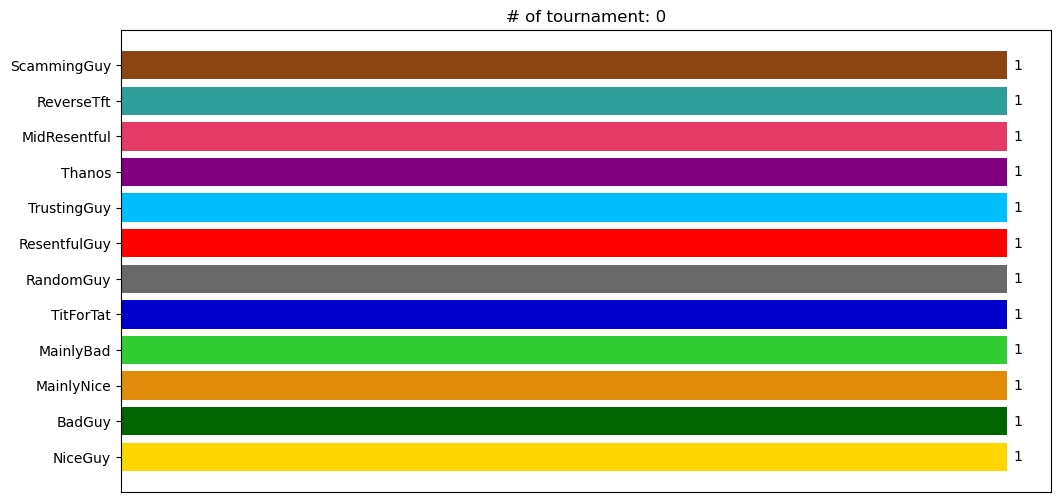

In [54]:
# Visualize the evolution of the partecipants during the iterated tournament
frame = time_evolution['tournament'].unique()

fig, ax = plt.subplots(figsize=(12,6))
ax.set_xticks([])
ax.set_xticklabels([])
ax.set(ylabel='$Player\'s trategies$')

# function to animate an horizontal barplot
def animate(frame):
    ax.clear()
    data_frame = time_evolution[time_evolution['tournament'] == frame]


    if not data_frame.empty:
        sorted_strategies = data_frame.nlargest(len(test_part),'N').sort_values('N',ascending=True)
        barh = ax.barh(sorted_strategies['Strategies'],sorted_strategies['N'], color=[color_dic[strategy] for strategy in sorted_strategies['Strategies']])

        # plot appearance
        ax.bar_label(barh, padding = 5)
        ax.set_xticks([])  # Remove x ticks
        ax.set_xticklabels([])  # Remove x labels
        ax.set(title =  "# of tournament: "+str(frame))

    else:
        print(f"No data for tournament: {frame}")

#global anim
anim = animation.FuncAnimation(fig, animate, frames=frame, interval=1000, repeat=False)

# Save animation to .gif file using Pillow
anim.save('balanced_population.gif', writer='pillow')

# to show the current frame and leave the last frame in the end
plt.show()


What is observed is that there are strategies like TitForTat, ResentfulGuy, and MidResentfulGuy that are able to minimize the disadvantage they accumulate when playing against strategies that often betray and maximize the point gain when playing among themselves. This also happens in matches between players using the same strategy among those previously mentioned. This leads to an initial increase in players with betrayal-oriented strategies at the expense of players with strategies more inclined toward cooperation. However, after this initial phase, players with TitForTat, ResentfulGuy, and MidResentfulGuy strategies begin to win tournaments and increase in number. It therefore becomes evident that, in this game mode, strategies that prioritize betraying the opponent are not the most effective. We expect that this behavior also depends on the number of rounds played in each match. Let's try to observe the same dynamics implemented so far by comparing the evolution of the game, always starting from the same list of participants but having them play with different numbers of rounds for each match.

In [55]:
# random population. Modify to try other starting configurations
test_part = {
    'NiceGuy' : 3,
    'BadGuy' : 1,
    'MainlyNice' : 5,
    'MainlyBad' : 2,
    'TitForTat' : 5,
    'RandomGuy' : 5,
    'ResentfulGuy' : 4,
    'TrustingGuy' : 1,
    'Thanos' : 2,
    'MidResentful': 3,
    'ReverseTft': 6,
    'ScammingGuy': 4
}

# Compute the iterated tournament result starting from the dictionary changing the number of rounds in each match
R = [5,10,15,20]
results = []
time_evolution = []

for r in R:
    x,y = r_tournament(test_part,r = 300,N_rounds = r, M = Payoff) 
    results.append(x)
    time_evolution.append(y)
   


In [56]:
# Adjust the length of all the data frames for the classification time evolution over the tournaments in order to have a syncronized representation
max_duration = 0 
for dataframe in time_evolution:
    if max(dataframe['tournament']) > max_duration: max_duration = max(dataframe['tournament'])

adj_time_evolution = []

# Fill the needed rows with the classification of the last tournament
for dataframe in time_evolution:
    while (max(dataframe['tournament']) < max_duration): 
        max_t = max(dataframe['tournament'])
        #print(max_t)
        support = copy.deepcopy(dataframe[dataframe['tournament'] == max_t])
        support['tournament'] = max_t + 1
        dataframe = pd.concat([dataframe, support], axis=0)
    adj_time_evolution.append(dataframe)



In [57]:
adj_time_evolution[0]

Strategies   N  tournament
0        NiceGuy   3           0
1         BadGuy   1           0
2     MainlyNice   5           0
3      MainlyBad   2           0
4      TitForTat   5           0
..           ...  ..         ...
7    TrustingGuy   0          34
8         Thanos   0          34
9   MidResentful  21          34
10    ReverseTft   0          34
11   ScammingGuy   0          34

[420 rows x 3 columns]

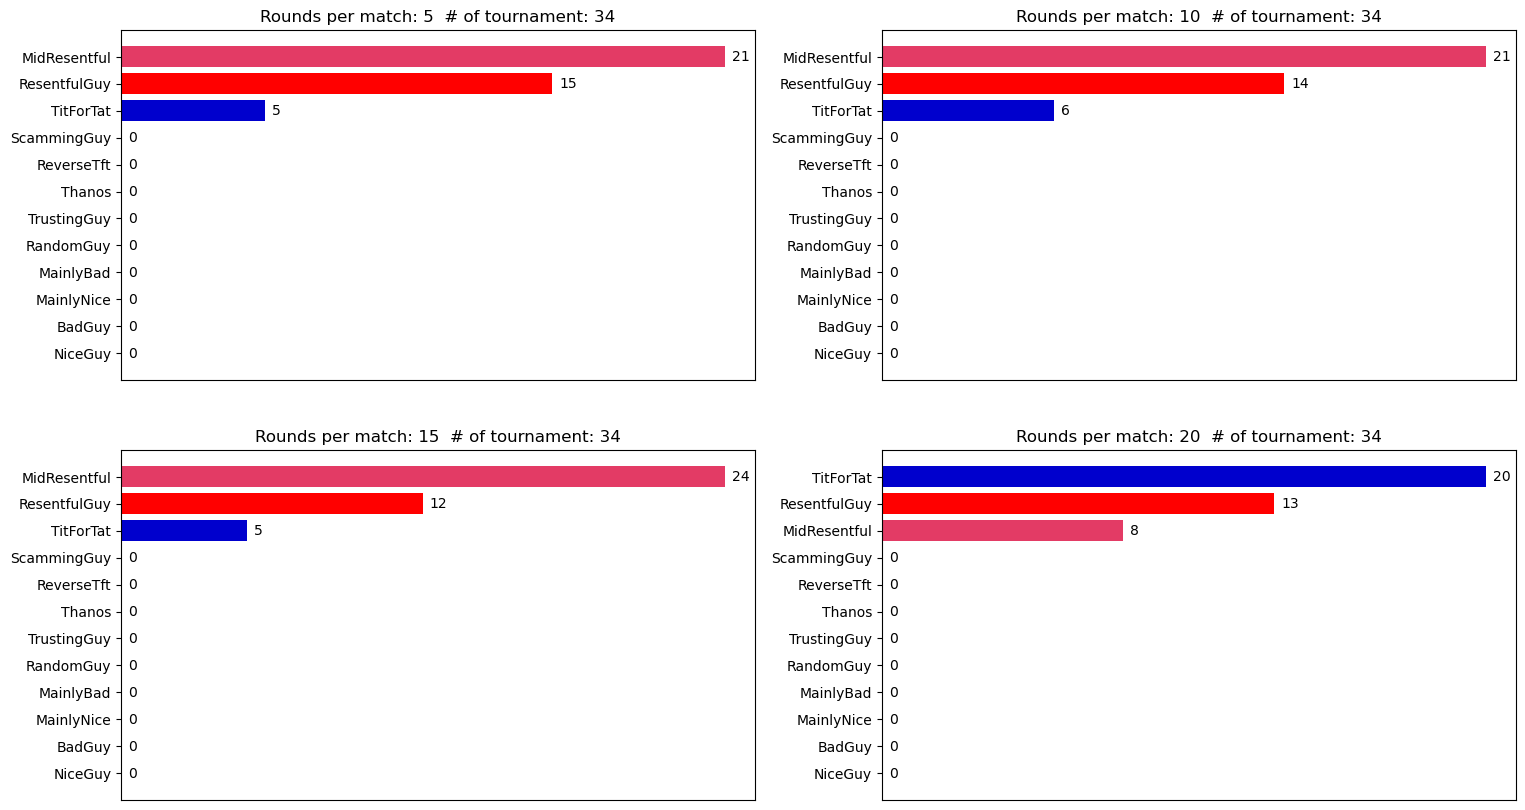

In [58]:
# Animate the results

frame = adj_time_evolution[0]['tournament'].unique()

# Prepare the figures
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axs = axs.flatten()  # Convert l'array in una lista

for ax in axs:
    ax.set_xticks([])  # Remove the ticks
    ax.set_xticklabels([])  # Remove the labels
    ax.set(ylabel='$Player\'s strategies$')

def animate(frame):
    for ax in axs:
        ax.clear()
        data_frame = adj_time_evolution[axs.tolist().index(ax)][adj_time_evolution[axs.tolist().index(ax)]['tournament'] == frame]

        if not data_frame.empty:
            sorted_strategies = data_frame.nlargest(len(test_part), 'N').sort_values('N', ascending=True)
            barh = ax.barh(sorted_strategies['Strategies'], sorted_strategies['N'], color=[color_dic[strategy] for strategy in sorted_strategies['Strategies']])

            # Aspetto del grafico
            ax.bar_label(barh, padding=5)
            ax.set_xticks([])  # Rimuove i tick dell'asse X
            ax.set_xticklabels([])  # Rimuove le etichette dell'asse X
            ax.set(title="Rounds per match: " + str(R[axs.tolist().index(ax)]) + "  " + "# of tournament: " + str(frame))
        else:
            print(f"No data for tournament: {frame}")

# Built the animation and save it a variable
anim = animation.FuncAnimation(fig, animate, frames=frame, interval=1000, repeat=False)

# Save the animation in a .gif file
anim.save('multiple_animation.gif', writer='pillow')

plt.show()


As we expected, the variation in the number of rounds per match does not change the nature of the behavior previously observed but amplifies the results. This is because the mechanism of maximizing gains and minimizing losses by these strategies is further reinforced. 

# Multiple Players Iterative Prisoner's Dilemma with Mutable Behaviour
### Work division:
Part 4: Leonardo Pieripolli

## Mutant Iterative Tournament
### The transition from classification to individuals
From now on every participant in the tournament will be an *individual*, a different *agent* able to perform an unique task.\
To do this, every participant, a **mutant**, is an istance of a class which encodes all the informations needed.\
Every mutant can encode its own information via **genome**, containing information about their **genes** and their probabilities.\
For the evolutionary process no penalty will be provided for a mutant with higher number of genes, because more variety increases also the possibility of "bad" mutations in the future.

### Genetic information
Each mutant is provided with a list of different strategies form which to chose, taken from the strategy used up to this point (could be the whole list or a subset of those); this rapresents the differnt types of **genes** used in the species genome.\
Each strategy has its own probability of being chosen, rapresenting the appearance of each gene in the entire genome.\
For each match played, every mutant chose an **atomic strategy** to follow according to his genetic information.

### Move selection
For each match and each round, a move is chosen according to a defined previous used strategy. Those are considered the atomic strategies and according to the strategy used the next move is chosen (with the same selection process as seen up until this point).\
The atomic strategy used in each **match** is chosen before the start of the match and kept for all the rounds, according to the adaptation to the envinroment.

### Evolution
After each tornament ends, a new generation is created. Most of the mutants present remains but are asked to mutate.\
The mutate function is called and its job is to change the **probabilty** of each strategy in the genome.\
The random mutation procedure is performed taking for each probability a Gaussian PDF centered in the previous value and with $\sigma = 0.1$; if the random generated value is below 0 the gene disappears from the list for the next interaction, otherwise all the weights are renormalized to get a cumulative probability of 1. This way each generation has the possibility to **activate** a quiescient gene or **deactivate** a low-level gene, also changing the proportion between each strategy.

### Adaptation
During the tournament mutants are able to **adapt**, changing the strategy they will use during the next match according to the probability in their genome. The chosen strategy is encoded in a parameter selecting the range inside the comulative probabilty of all mutant strategies, and is drawn randomly at the start and then changed with the adapt function. According to the previous match result (win/loss) the mutant change: for a **win**, a small change is performed using a small deviation gaussian centered into the previous value, to optimize winning strategies, for a **loss** the strategy is drawn uniformly random.

### Natural selection - Environmental pressure
Another parameter to operate the evolution is the natural selection: all mutants perform in the same tournament, competing against one onother's; the tournament is then iterated a fixed number of time or until a parity is reached.\
At each iteration of the tournament a number of the worst mutants are removed from the tournament and are replaced with the *same* number of copies of the best performed players.\
The number of players to replace from top and bottom of the graduatory is the same, and is chosen a priori.

In [59]:
class mutant :

    # allows to switch between random chosen strategy and fixed treshold strategy
    random_strat = False
    
    # allows to change model including or not always Bad Guy and Nice Guy in the schema
    always_NB = False
    
    # CONSTRUCTOR
    # every mutant is created with a name and a list of tuples, containing accessible strategies and their initial weight
    def __init__( self, name, starting_strategy ) : 
        self.name = name
        # the series of trategies that can be chosen, starting from a list of strategies and their probabilities
        self.strategy_dic = { i[0] : strategies[i[0]] for i in starting_strategy } 
        # NiceGuy and BadGuy incarnate the basic behaviour, thus are included as last elements, if not already present, if decided a priori
        if( self.always_NB ) :
            self.strategy_dic[ 'NiceGuy' ] = nice_guy
            self.strategy_dic[ 'BadGuy' ] = bad_guy
        # this process creates an internal dictionary similar to strategies but with limited entries, useful for later cycles
        # the gene in rapresented by the strategy list, a list of values that determine which strategy use to create the next move
        # this is rapresented by a normalized range of values chosen by a uniform distribution
        starting_weight = [ i[1] for i in starting_strategy ]
        self.strategy = np.array( starting_weight/np.sum(starting_weight) )
        # if an empty starting_strategy is passed, the mutant become a random_guy
        if( len(starting_strategy) == 0 ) :
            self.strategy_dic[ 'NiceGuy' ] = nice_guy
            self.strategy_dic[ 'BadGuy' ] = bad_guy
            self.strategy = np.array( [ 0.5, 0.5 ] )
        # reshaping the weight array to consider added elements
        self.strategy.resize( len( self.strategy_dic ) )
        self.dic_keys = list( self.strategy_dic.keys() )
        self.treshold = npr.random( )

    # alternative constructor: it takes genome, a string of gene letters, the ripetition of each means a different probability
    @classmethod
    def from_genome( cls, genome ) :
        g_list = [ ( g, genome.count( g ) ) for g in list( cls.genes.keys() ) if ( genome.count( g ) ) ]
        total_g = sum( [ i[1] for i in g_list ] )
        strategy = [ ( cls.genes[ g[0] ] , float( g[1] ) / float( total_g )  ) for g in g_list ]
        return cls( genome, strategy )
    
    # REPR OUTPUT
    def __repr__( self ) :
        return f"<Mutant name:{self.name} strategy_dic:{self.strategy_dic} strategy:{self.strategy}>"

    # PRINTING OUTPUT
    def __str__( self ) :
        return f"Mutant class:\n   Name: {self.name}\n   Strategies in the genome: {[ i for i in self.strategy_dic]}\n   Gene values: {self.strategy}\n"
    
    # return the weigth of a specific strategy name as in the original dictionary
    def get_weigth( self, name ) :
        for i in range( len( self.dic_keys ) ) :
            if ( self.dic_keys[ i ] ==  name ) :
                return self.strategy[ i ]
        return 0.0
    
    # defining the generic function that returns a move for a mutant
    def move( self, round_number = 0, match_history = [[]], player_index = 0 ) :
        # chosing move based on type of mutant
        if self.random_strat :
            # generating a random value to chose the strategy
            chosen_move = npr.random( )
        else :
            # using stored treshold value to chose the strategy
            chosen_move = self.treshold
        # cumulative sum of weights
        cumulative = [ np.sum( self.strategy[ 0 : i + 1 ] ) for i in range( self.strategy.shape[ 0 ] ) ]
        # cycling over strategies weights
        for i in range( len( cumulative ) ) :
            if ( chosen_move < cumulative[ i ] ) : 
                return self.strategy_dic[ self.dic_keys[ i ] ]( round_number, match_history, player_index )    

    # function to convert genes and strategy into the genome, a string of encoded letters that rapresent most of the information
    # N rapresents the number of total genes in the genome, and in a way the precision of this conversion
    def genome( self, N=100 ) :
        # starting with a void string
        genome = ''
        # cycling over all possible genes
        for g in self.genes :
            # checking if the gene is present in the genome
            if ( self.genes[g] in self.dic_keys ) :
                # appending element using python string operations
                genome += ( g * int( np.round( self.strategy[ self.dic_keys.index( self.genes[g] ) ] * N ) ) )
        return genome
    
    # function to change genome (strategy) randomly
    def mutate( self ) :
        # recovering existing strategy
        strat = self.strategy 
        # updating strategy: for each weight a new one is produced based on a gaussian
        # this makes small differences more likely; the gaussian is centered on the previous value and has little std
        # considering these are normalized probability their value is always less than 1
        std = 0.1
        # creating an array of normal distributed value centered in the previous values, given std and same shape as strategy 
        p = npr.normal( loc = strat, scale = std, size = strat.shape )
        # updating strategy only for those distributions that has positive outcome
        # this way genes that previously where 0. are less likely to sudden emerge
        strat[ p > 0. ] = p[ p > 0. ]
        # removing strategy when probability is less than 0
        strat[ p < 0. ] = 0.
        # renormalize strategy so that move can be used with a uniform distribution
        self.strategy = strat / np.sum( strat )

    # function to change behaviour in the same tournament without changing genome; 
    # in theory having won the previous match changes evolution, as winners do not change strategy
    def adapt( self, win = False ) :
        # updating treshold near previous value if there was a win
        if win :
            u = npr.normal( loc = self.treshold, scale = 0.068 )
            if ( 0.< u < 1. ) :
                self.treshold = u
        else :
            self.treshold = npr.random()

        
    genes = {
            'N' : 'NiceGuy',       # N for Nice Guy
            'B' : 'BadGuy',        # B for Bad Guy
            'U' : 'TitForTat',     # U for as you did
            # 'R' : 'ResentfulGuy',  # R for Resentful Guy
            'D' : 'ResentfulGuy',  # D as Disgusted, an accurate description for Resentful Guy
            'T' : 'Thanos',        # T for Thanos, the most Balancing Guy
            # 'F' : 'TrustingGuy',   # F for Fides,Fidei the Classical Trust
            'H' : 'TrustingGuy',   # H for Hope, gained or lost by the Trusting Guy
            'M' : 'MidResentful',  # M for Mid-Resentful Guy
            'S' : 'ScammingGuy',   # S for Scamming Guy
            'I' : 'ReverseTft',    # I as opposite of you, opposite to the Tit for Tat definition
            'C' : 'RandomGuy',     # C for Chaos, the essence of Random Guy
            'L' : 'MainlyNice',    # L for Lighthearted, as the Mainly nice is mostly positive
            'O' : 'MainlyBad',     # O for Ominous, as the Mainly Bad Guys often proves to be
            }


### Mutant class notes
The information are encoded as said, and for some practical utility and genetic parallelism, each atomic strategy is encoded into a specific **letter** and all the genome can be represented as a list of character sintetizing the whole informations.
This allows some fancy usage of the code, because to any list of characters corresponds a specific mutant with its genetic information.
Various name lists will be used to initialize the mutants.
## Mutant lists
To test, play, and create different environment to try, the following function allows to get a list of mutants with their corresponding dictionary using various function or inizalizations. Most of them will be explored.

In [60]:

# a function to faster get mutant list for tourney
# mode in the list identify the model used
def get_m_list( mode, par_list=[], N_mut = 1000, N_gen = 100 ) : 
    # some fancy default values to initialize mutant from a genome
    default_dic = {
        "gods" : ['ALATHANDER', 'BACCOB', 'BEORY', 'CELESTIAN', 'CORELLON_LARETHIAN', 'EHLONNA', 'ERYTHNUL', 'FHARLANGHN', 'HEIRONEOUS', 'HEXTOR', 'ISTUS', 'IUZ', 'JORAMY', 'KURELL', 'LENDOR', 'NERULL', 'OBAD-HAI', 'OLIDAMMARA', 'PELOR', 'PROCAN', 'RALISHAZ', 'RUDD', 'ST_CUTHBERT', 'TRITHEREON', 'VECNA', 'WAUKEEN',
                'AURIL', 'AZUTH', 'BANE', 'BHAAL', 'CHAUNTEA', 'CYRIC', 'DENEIR', 'ELDATH', 'GOND', 'HELM', 'ILMATER', 'KELEMVOR', 'LATHANDER', 'LEIRA', 'LLIIRA', 'LOVIATAR', 'MALAR', 'MASK', 'MIELIKKI', 'MILIL', 'MORADIN', 'MYRKUL', 'MYSTRA', 'OGHMA', 'SELUNE', 'SHAR', 'SHARESS', 'SHAUNDAKUL', 'SILVANUS', 'SUNE', 'TALONA', 'TALOS', 'TEMPUS', 'TORM', 'TYMORA', 'TYR', 'UMBERLEE', 'WAUKEEN',
                'CHEMOSH', 'GILEAN', 'HIDDUKEL', 'KIRI-JOLITH', 'MAJERE', 'MISHAKAL', 'MORGION', 'PALADINE', 'SARGONNAS', 'TAKHISIS', 'ZEBOIM',
                'AUREON', 'BALINOR', 'DOL_ARRAH', 'DOL_DORN', 'ARAWAI', 'BOLDREI', 'DEVICE', 'EBERRON', 'KORD', 'OLLADRA', 'ONATAR', 'THE_TRAVELER', 'THE_SHADOW',
                'ANUBIS', 'APOPHIS', 'BAST', 'HORUS', 'ISIS', 'RA', 'SET', 'SOBEK', 'THOTH',
                'APOLLO', 'ARES', 'ARTEMIS', 'ATHENA', 'DEMETER', 'DIONYSUS', 'HADES', 'HECATE', 'HELIOS', 'HERMES', 'POSEIDON', 'ZEUS',
                'AEGIR', 'BALDER', 'FORSETI', 'FREYA', 'FREY', 'HEIMDALL', 'HELA', 'LOKI', 'ODIN', 'THOR', 'TYR',
                'BLIBDOOLPOOLP', 'CORELLON_LARETHIAN', 'DEEP_SASHELAS', 'EADRO', 'GARL_GLITTERGOLD', 'GRUUMSH', 'HRUGGEK', 'KURTULMAK', 'LOLTH', 'MAGLUBIYET', 'MORADIN', 'RILLIFANE_RALLATHIL', 'SEHANINE_MOONBOW', 'SHEELA_PERYROYL', 'TIAMAT', 'YONDALLA'
                ],
        "disney" : ['SNOW_WHITE', 'CINDERELLA', 'AURORA', 'ARIEL', 'BELLE', 'JASMINE', 'POCAHONTAS', 'MULAN', 'TIANA', 'RAPUNZEL', 'MERIDA', 'MOANA',
                'PRINCE_CHARMING', 'PRINCE_PHILLIP', 'ERIC', 'BEAST', 'ALADDIN', 'JOHN_SMITH', 'LI_SHANG', 'NAVEEN', 'FLYNN_RIDER', 'KRISTOFF',
                'WOODY', 'BUZZ_LIGHTYEAR', 'MIKE_WAZOWSKI', 'SULLEY', 'MR_INCREDIBLE', 'ELASTIGIRL', 'DORY', 'MARLIN', 'LIGHTNING_MCQUEEN', 'MERIDA', 'JOY', 'SADNESS', 'SOUL',
                'MICKEY_MOUSE', 'MINNIE_MOUSE', 'DONALD_DUCK', 'GOOFY', 'PLUTO', 'DAISY_DUCK',
                'MALEFICENT', 'URSULA', 'CRUELLA_DE_VIL', 'SCAR', 'JAFAR', 'CAPTAIN_HOOK', 'QUEEN_OF_HEARTS', 'GASTON', 'HADES', 'QUEEN_GRIMHILDE',
                'SIMBA', 'MUFASA', 'NALA', 'TIMON', 'PUMBAA', 'BAMBI', 'DUMBO', 'STITCH', 'LADY', 'TRAMP',
                'MUSHU', 'GENIE', 'SEBASTIAN', 'FLOUNDER', 'OLAF', 'PASCAL', 'RAJAH', 'MEEKO', 'ABU', 'LUMIERE', 'COGSWORTH'
                ],
        "nobel" : ['MARTIN_LUTHER_KING_JR.', 'MOTHER_TERESA', 'NELSON_MANDELA', 'BARACK_OBAMA', 'DALAI_LAMA', 'MALALA_YOUSAFZAI', 'JIMMY_CARTER', 'DESMOND_TUTU', 'WANGARI_MAATHAI', 'HENRY_KISSINGER',
                'ALBERT_CAMUS', 'ERNEST_HEMINGWAY', 'GABRIEL_GARCÍA_MÁRQUEZ', 'TONI_MORRISON', 'PABLO_NERUDA', 'JEAN-PAUL_SARTRE', 'ALICE_MUNRO', 'BOB_DYLAN', 'KAZUO_ISHIGURO', 'MARIO_VARGAS_LLOSA',
                'ALBERT_EINSTEIN', 'MARIE_CURIE', 'RICHARD_FEYNMAN', 'STEPHEN_HAWKING', 'MAX_PLANCK', 'ENRICO_FERMI', 'WERNER_HEISENBERG', 'NIELS_BOHR', 'ERNEST_RUTHERFORD', 'PETER_HIGGS',
                'LINUS_PAULING', 'MARIE_CURIE', 'DMITRI_MENDELEEV', 'FRITZ_HABER', 'IRÈNE_JOLIOT-CURIE', 'ROSALIND_FRANKLIN', 'ADOLF_VON_BAEYER', 'HAROLD_UREY', 'AHMED_ZEWAIL', 'AARON_KLUG',
                'JONAS_SALK', 'ALEXANDER_FLEMING', 'WATSON_AND_CRICK', 'PAUL_EHRLICH', 'BARBARA_MCCLINTOCK', 'GERTRUDE_ELION', 'ELIZABETH_BLACKBURN', 'TU_YOUYOU', 'RALPH_STEINMAN', 'HERMANN_MULLER',
                'MILTON_FRIEDMAN', 'PAUL_KRUGMAN', 'JOSEPH_STIGLITZ', 'AMARTYA_SEN', 'GARY_BECKER', 'FREDERICK_HAYEK', 'DANIEL_KAHNEMAN', 'ROBERT_MERTON', 'VERNON_SMITH', 'OLIVER_WILLIAMSON'
                ],
        "physicist" : ['ISAAC_NEWTON', 'GALILEO_GALILEI', 'JAMES_CLERK_MAXWELL', 'MICHAEL_FARADAY', 'DANIEL_BERNOULLI', 'HENRY_CAVENDISH', 'JOSEPH_PRIESTLEY', 'ANTOINE_LAVOISIER', 'JOSEPH_FOURIER', 'JOHANN_CARL_FRIEDRICH_GAUSS',
                'MAX_PLANCK', 'ALBERT_EINSTEIN', 'NIELS_BOHR', 'WERNER_HEISENBERG', 'ERWIN_SCHROEDINGER', 'WOLFGANG_PAULI', 'PAUL_DIRAC', 'LOUIS_DE_BROGLIE', 'RICHARD_FEYNMAN', 'MURRAY_GELL-MANN',
                'STEPHEN_HAWKING', 'MICHIO_KAKU', 'BRIAN_GREENE', 'LEONARD_SUSSKIND', 'CARLO_ROVELLI', 'PETER_HIGGS', 'EDWARD_WITTEN', 'ROGER_PENROSE', 'CARLO_RUBBIA', 'SHELDON_GLASHOW',
                'ENRICO_FERMI', 'MARIE_CURIE', 'ERNEST_RUTHERFORD', 'LISE_MEITNER', 'ARTHUR_COMPTON', 'OTTO_HAHN', 'GLENN_SEABORG', 'GEORGE_ANTON_OLAH', 'CLINTON_DAVISSON', 'ARTHUR_SCHAWLOW',
                'CARL_SAGAN', 'NEIL_DEGRASSE_TYSON', 'SUBRAHMANYAN_CHANDRASEKHAR', 'VERA_RUBIN', 'JOCELYN_BELL_BURNELL', 'STEPHEN_HAWKING', 'MARTIN_REES', 'KATI_MÓRÓ', 'DAN_HOOPER', 'JANNA_LEVIN',
                'JENNIFER_DOUDNA', 'KIMBERLY_BRYANT', 'DONNA_STRICKLAND', 'ANDREA_GHEZ', 'FRANÇOISE_BARRÉ-SINOUSSI', 'EMMANUELLE_CHARPENTIER', 'MARGARET_MURNANE', 'DONNA_STRICKLAND', 'FABIOLA_GIANOTTI', 'SARA_SEAGER', 'MARCO_ZANETTI'
                ],
        "pod" : [ 'LENA_MARGHERITA', 'DI_LUCIA_SOFIA', 'CAVALLIN_JONATHAN', 'POCCIANI_GABRIELE', 'PONCHIO_MATTIA', 'CAFAGNO_SAMUELE',
                  'BROCCO_LUCA', 'PIRAZZO_TOMMASO', 'PIERIPOLLI_LEONARDO', 'SCHIAVINATO_ALBERTO', 'BELLI_LUIGI', 'TAMARIN_CHIARA', 'TUSCANO_ALESSIO',
                  'BORTOLATO_ANGELA', 'SECCO_BENEDETTO', 'NAPOLEONE_GIOVANNI', 'BEZZI_FILIPPO', 'CONTE_WILLIAM', 'FASIOLO_GIORGIA', 'GASPAROTTO_GIACOMO',
                  'D_AMORE_EDOARDO', 'ZARA_MIRIAM', 'CORTE_RICCARDO', 'CASAPULLA_CLAUDIA', 'VOLPI_LUCA', 'BERGAMIN_BEATRICE',
                  'SAFAK_YUSUF_KENAN', 'JAMILOV_JAVLONBEK', 'UNGUREANU_VLADIMIR', 'CHATURVEDI_PANKHURI', 
                ],
        "test" : list( mutant.genes.keys() ),
    }
    genes = np.asarray( mutant.genes.keys() )
    # checking the type of input
    if isinstance( mode, str ):
        # if it mathces the name of some default list, a list of mutant with that genome is created
        if ( mode in list( default_dic.keys() ) ) :
            m_dic = { name : mutant.from_genome( name ) for name in default_dic[ mode ] }
        # the same mode allows to create a list of the same base strategy with different names
        elif ( mode == "same" ) : 
            m_dic = {}
            for name in par_list :
                for i in range( N_mut ) :
                    m_name = name + str( i )
                    m_dic[ m_name ] = mutant.from_genome( m_name )
        # the repeat mode allows to create a list of the same base strategy with a first mutation step
        elif ( mode == "repeat" ) : 
            par_list *= N_mut
            m_dic = {}
            for name in par_list :
                m = mutant.from_genome( name )
                m.mutate()
                m_dic[ m.genome( N_gen ) ] = copy.deepcopy( m )
        # the genome mode allows a direct list of genomes to be given as second parameter
        elif ( mode == "genome" ) : 
            m_dic = { name : mutant.from_genome( name ) for name in par_list }
        # the brute mode allows a direct list of standard constructor input to be given as second parameter
        elif ( mode == "brute" ) : 
            m_dic = { par[0] : mutant( par ) for par in par_list }
        # the shuffle mode allows to create a random selection of the elements of the list to create various genome from set genes
        elif ( mode == "shuffle" ) : 
            r_genomes = [ np.asarray(par_list)[ npr.randint( 0, len(par_list), size=N_gen ) ] for i in range(N_mut) ]
            genomes = [ (lambda x: ''.join( i for i in x ) )( g ) for g in r_genomes ]
            m_dic = {}
            for gene in genomes :
                m = mutant.from_genome( gene )
                m.mutate()
                name = m.genome( N_gen )
                while name in m_dic : name += 'A'
                m_dic[ name ] = copy.deepcopy( m )
        # if no specific mode is provided, a random selection will be produced
        else :
            r_genomes = [ genes[ npr.randint( 0, genes.shape[0], size=N_gen ) ] for i in range(N_mut) ]
            genomes = [ (lambda x: ''.join( i for i in x ) )( g ) for g in r_genomes ]
            m_dic = {}
            for gene in genomes :
                m = mutant.from_genome( gene )
                m.mutate()
                m_dic[ m.genome( N_gen ) ] = copy.deepcopy( m )
    # if the first parameter is a number, a random selection of that lenght is produced
    else :
        N_mut = mode
        r_genomes = [ genes[ npr.randint( 0, genes.shape[0], size=N_gen ) ] for i in range(N_mut) ]
        genomes = [ (lambda x: ''.join( i for i in x ) )( g ) for g in r_genomes ]
        m_dic = {}
        for gene in genomes :
            m = mutant.from_genome( gene )
            m.mutate()
            m_dic[ m.genome( N_gen ) ] = copy.deepcopy( m )
    m_keys = list( m_dic.keys() )
    return m_dic, m_keys

### Mutant Tourney
Ther tourney follows the same principle as the regular tourney, adding the call of the adapt function at the end of each match. \
A selected list of mutant is used to take part to the tournament, in which each individual compete against each other, during a single round-robin scheme. \
Mutants do not change during the Tourney but they adapt after each match, to try and direct toword the best strategy between those available. All results follow the usual normalization.

In [61]:
def m_tourney( participants={}, player_list=[], N_rounds = 10, M = Payoff):
    # the player_list here is already made and given by input
    # Compute the combinations
    matchups = list(itertools.combinations(player_list, 2))
    # List which will be used to have the scores of each match by the side of the two opponents
    list_with_scores = []
    # Loop over the combinations one by one
    for comb in matchups:
        # Player1 and Player2 strategies
        player1 = comb[0]
        player2 = comb[1]
        # Initiliaze an empty list to store the results over the match
        AllRewards = []
        # Do the match between the two players and update the rewards; The ordered syntax for match is:
        AllRewards =  match(player1, player2, N_rounds, M)
        # Retrieve the final scores for Player1 and Player2 as the last element in the list
        R1, R2 = AllRewards[-1][0], AllRewards[-1][1]
        list_with_scores.append( comb + (R1,R2) )
        # make participants adapt to the previous results, corresponding to their winning condition
        participants[ player1 ].adapt( ( R1 > R2 ) )
        participants[ player2 ].adapt( ( R2 > R1 ) )
        
    # Compute the score for each named player and add it to the list
    FinalScores = []
    for player in player_list :
        SumOver1 = np.sum([ match[2] for match in list_with_scores if (match[0] == player) ]) / ( len( player_list ) - 1. )
        SumOver2 = np.sum([ match[3] for match in list_with_scores if (match[1] == player) ]) / ( len( player_list ) - 1. )
        FinalScores.append(SumOver1 + SumOver2)
    Results = [ ( player_list[i], FinalScores[i] ) for i in range( len( player_list ) ) ]
    # return Results
    return ( sorted( Results, reverse=True, key=lambda x: x[1] ) )

### Mutant Iterative Tournament
This is the iterative tournament function, as before all the mathces are played and then a winner and a loser (or multiple) are determineted. As said, the survival of the fittest suggest to remove the mutants with the worst performance and to make a copy of those with the best results. \
At the end of each iteration, all the still living mutant are mutated trough the mutate function, simulating a new generation of individuals, in which some species are more present than the others. \
The results of this Tournament are saved as the probability of usage for each atomic strategy, for all the mutants, the best one and the best performing ones. The classification of each tournament is saved and can be used to check the winning individuals.

In [62]:
# The iterated tournament function is slightly different; Here every strategy should appear only once,
# and the number of posible deleted and added subjects is not fixed

# Iterate the tournament process: new parameter "iter" to set the number of iterations of the tournament
# the parameter pressure rapresent a naive environmental pressure toward the natural selection process
def m_tournament( participants, part_names, N_rounds = 10, iter=50, pressure = 0,  M = Payoff):

    # number of participants, usefull later
    part_num = len( part_names )

    # dictionary to track usage of strategies
    strat_usage = { s : 0.0 for s in mutant.genes.values() }
    strat_res = { s : 0.0 for s in mutant.genes.values() }
    best_strat = { s : 0.0 for s in mutant.genes.values() }
    top_ten_strat = { s : 0.0 for s in mutant.genes.values() }
    half_strat = { s : 0.0 for s in mutant.genes.values() }
    
    # if no pressure provided, an arbitrary hight pressure (square root of total individuals perish) is applied
    if ( pressure == 0 ) :
        pressure = int( np.round( np.sqrt( part_num ) ) )
    
    # adding to dictionary strategies the mutant moves as new strategies (this allows to use the existing framework)
    for name in part_names :
        strategies[ name ] = participants[ name ].move
        
    # set a counter for the while loop
    t_counter = 0
    
    # array to store all the results of each tournamen
    classification = []

    # computing the value of usage of each strategy
    for p in participants:
        for name in participants[p].strategy_dic :
            strat_usage[ name ] += participants[p].get_weigth( name ) / part_num
    
    # pandas dataframe to store the usage of native strategies
    frames = pd.DataFrame( {
            'Strategies' : strat_usage.keys(),
            'total_w'    : strat_usage.values(),
            'res_w'      : strat_res.values(),
            'best_w'     : best_strat.values(),
            'ten_w'      : top_ten_strat.values(),
            'half_w'     : half_strat.values(),
            'tournament' : t_counter
            } )
    
    # if there are not too much participants, all strategies weigth are saved
    if( part_num < 70 ) :
        # adding information trough support dataframe made by dictionary comprehension
        support_1 = pd.DataFrame( { 
            # getting all mutant strategies weigth via list comprehension and over the name list
            str( i ) : [ participants[ part_names[ i ] ].get_weigth( name ) for name in mutant.genes.values() ]
            for i in range(part_num)})
        support_2 = pd.DataFrame( { 
            # results for each player each match weigthed by strategy: starting from 0
            f"res_{i}" : [ 0.0 for name in strat_usage.keys() ] 
            for i in range(part_num)})
        frames = pd.concat( [frames, support_1, support_2], axis=1)
           
    # start the while loop in order to iterate the tournament. The number of iterations is set at the start (default r=5)
    while t_counter < iter:

        #update the counter 
        t_counter += 1 
        
        # Make all player perform a random indipendent mutation (before, it does not change much but preserves the last result)
        for name in part_names : participants[name].mutate()
            
        # Getting the result of the current tourney
        current_tournament = m_tourney( participants, part_names ,N_rounds, M )
        # Call the function to play the tournament and append the results 
        classification.append( current_tournament )

        # getting a view of the best performing participant
        best = participants[ current_tournament[0][0] ]

        # resetting the value of usage, computing the usage for the best player
        for strat in best_strat :
            best_strat[ strat ] = best.get_weigth( strat )
            strat_usage[ strat ] = 0.0
            strat_res[ strat ] = 0.0
            half_strat[ strat ] = 0.0
            top_ten_strat[ strat ] = 0.0
            # getting best 10 (if possible) and best half
            for i in range( part_num // 2 ) :
                p = current_tournament[i][0]
                half_strat[ strat ] += participants[p].get_weigth( strat )/ ( part_num // 2 )
            if( part_num > 10 ) :
                for i in range( 10 ) :
                    p = current_tournament[i][0]
                    top_ten_strat[ strat ] += participants[p].get_weigth( strat )/ 10
            # computing the result of each strategy, weigthed with their probability
            for i in range( part_num ) :
                p = current_tournament[i][0]
                r = current_tournament[i][1]
                strat_res[ strat ] += r * participants[p].get_weigth( strat )/ part_num
        
        # computing the value of usage of each strategy
        for p in participants:
            for name in participants[p].strategy_dic :
                strat_usage[ name ] += participants[p].get_weigth( name )/ part_num
                
        # pandas dataframe to store the usage of native strategies
        frame = pd.DataFrame( {
            'Strategies' : strat_usage.keys(),
            'total_w'    : strat_usage.values(),
            'res_w'      : strat_res.values(),
            'best_w'     : best_strat.values(),
            'ten_w'      : top_ten_strat.values(),
            'half_w'     : half_strat.values(),
            'tournament' : t_counter
            } )
        
        # if there are not too much participants, all strategies weigth are saved
        if( part_num < 70 ) :
            # adding information trough support dataframe made by dictionary comprehension
            support_1 = pd.DataFrame( { 
                # getting all mutant strategies weigth via list comprehension and over the name list
                str( i ) : [ participants[ part_names[ i ] ].get_weigth( name ) for name in mutant.genes.values() ]
                for i in range(part_num)})
            support_2 = pd.DataFrame( { 
                # results for each player each match weigthed by strategy via list comprehension and over the name list
                f"res_{i}" : [ ( current_tournament[i][1] * participants[ current_tournament[i][0] ].get_weigth( name ) ) for name in mutant.genes.values() ]
                for i in range(part_num)})
            frame = pd.concat( [frame, support_1, support_2], axis=1)
            
        # Update the participants dictionary: 
        # a number of individuals equal to the selected pressure is removed from the bottom results
        # and the same number of individuals are cloned from the top results (the best species are able to reproduce twice)
        for i in range( pressure ) :
            # getting the name of the i-th worst performing player
            # name = current_tournament[ i ][0]
            name = current_tournament[ -( i + 1) ][0]
            # removing corresponding strategy from the general dictionary and the tournament one
            del strategies[ name ]
            part_names.remove( name )
            del participants[ name ]
            # getting the name of the i-th best performing player to replace the hole
            g_name = current_tournament[ i ][0]
            # adding the current number as identifier of the new generation
            new_name = g_name + '_' + str( t_counter )
            # adding a copy of the good player and renaming it as a new individual
            participants[ new_name ] = copy.deepcopy( participants[ g_name ] )
            participants[ new_name ].name = new_name
            # adding new name to the list of names
            part_names.append( new_name )
            # adding new mutant to strategy dictionary
            strategies[ new_name ] = participants[ new_name ].move

        # some output for long cycles
        if( len(participants) >= 50 and ( t_counter % 5 ) == 0) :
            print( f"Cycle {t_counter} done")
        
        # concatenate each frame to the whole series
        frames = pd.concat( [ frames, frame ], axis=0 )

        # checking the - almost impossible - case in wich all player got the same result ( first == last )
        if ( np.isclose( current_tournament[0][1], current_tournament[-1][1] ) ): break
    
    # removing all strategies from the general dictionary
    for n in range( part_num ) :
        del strategies[ part_names[ n ] ]
            
    return ( classification, frames )  

## Gif presentation
It is even less easy to visualize the results of this tornament, beacuse lot of mutant are needed to see most possible combinations for the genomes, mutants are individuals and cannot be gruoped under precise categories: even those of the same "species" can perform very differently. \
To better see the evolution, a gif with the usage of each atomic strategy during the tournament is presented.

In [63]:
def make_a_gif( data_frame, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'p',], [ 'P', ],] ), 
               image_titles = [ ['All strategies',], ['Best strategy',] ], y_label = f"Native strategies", gif_name= 'multiple_animation', 
               fixed=False, n_interval = 750, halo = False, every_n = 1 ) :
    # getting the separated dataframes based of tournament number
    frame = data_frame[ t_key ].unique()

    # getting the number of participants
    n_part = len( data_frame[ p_key ].unique() )
    
    # the number of columns is determined by the number of parameter used
    row_n, col_n = image_keys.shape
    
    # generating the base figure
    fig = plt.figure(constrained_layout=False, figsize=(12*col_n,4.5*row_n) )
    subfigs = fig.subfigures( nrows=row_n, ncols=1 )
    
    def animate( frame ):
        # getting the exact data
        f = data_frame[data_frame[t_key] == frame]
        
        # cycling over images
        for i in range( row_n ) :
            # clearing image at previous frame
            subfigs[i].clear()
            axs = subfigs[i].subplots( nrows=1, ncols=col_n )
            if col_n == 1 : axs = [ axs ]
            # setting current frame number as title, only in the first line
            subfigs[0].suptitle(f"Number of tournament: {frame}")
            for j in range( col_n ) : 
                ax = axs[j]
                key = image_keys[i][j]
                # clearing image at previous frame
                ax.clear()
                if not f.empty:
                    # if chosen, sets the x range in (0;1) to make it easy to read (all values are always normalized)
                    if fixed :
                        ax.set_xlim( [0., 1.] )
                    # disabling x ticks
                    ax.set_xticks([])
                    # disabling x label
                    ax.set_xticklabels([])
                    # setting y label
                    ax.set( ylabel= y_label)
                    # setting graph title
                    ax.set( title = image_titles[i][j])
                    # setting x margin to prevent label outside the figure, adding 10% more white space
                    ax.margins(x=0.1) 
                    # sorting the data
                    sorted_data = f.nlargest( n_part, key ).sort_values( key, ascending=True ) 
                     # getting the bars
                    barh = ax.barh(sorted_data[p_key],sorted_data[key], color=[color_dic[strategy] for strategy in sorted_data[p_key]] )                    
                    # setting bar labels
                    ax.bar_label(barh, labels = [ f"{b*100:.1f}%" for b in sorted_data[key] ], padding = 5)
                    # restoring the previous result and drowing them as "halo"
                    if ( halo and frame ) :
                        old_f = data_frame[data_frame[t_key] == ( frame - 1 )].nlargest( n_part, key ).sort_values( key, ascending=True ) 
                        ax.barh(old_f[p_key],old_f[key], color=[color_dic[strategy] for strategy in old_f[p_key]], alpha=0.15)
                else:
                    print(f"No data for tournament: {frame}")

    # defining which frame to use during the animation
    active_frames = frame[ : : every_n ]
    
    # global animation
    anim = animation.FuncAnimation(fig, animate, frames=active_frames, interval=n_interval, repeat=False)

    # animation saving using Pillow for .gif
    anim.save( (gif_name+'.gif'), writer='pillow')

    # closing to prevent the display of last frame
    plt.close()


## Start - end comparison
Another way to see the evolution is to compare the initial distribution of strategies and the final one, underlying the best strategy composition and probabilities.

In [64]:
def make_a_couple( data_frame, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'p',], [ 'P', ],] ), 
               image_titles = [ ['All strategies',], ['Best strategy',] ], y_label = f"Native strategies", file_name= 'multiple_animation', ) :
    # getting the separated dataframes based of tournament number
    frame = data_frame[ t_key ].unique()

    # getting the number of participants
    n_part = len( data_frame[ p_key ].unique() )
    
    # the number of columns is determined by the number of parameter used
    row_n, col_n = image_keys.shape
    # doubling the rows to get time 0 and time n
    tot_row = row_n * 2
    
    # generating the base figure
    fig = plt.figure(constrained_layout=False, figsize=(12*col_n,4.5*tot_row) )
    subfigs = fig.subfigures( nrows=tot_row, ncols=1 )

    for current_frame in [ 0, frame.max() ] :
        # getting the exact data
        f = data_frame[data_frame[t_key] == current_frame]

        # cycling over images
        for i in range( row_n ) :
            # changing if Frame is 0 or end
            i_f = i + ( current_frame > 0)
            # clearing image at previous frame
            subfigs[i_f].clear()
            axs = subfigs[i_f].subplots( nrows=1, ncols=col_n )
            if col_n == 1 : axs = [ axs ]
            # setting current frame number as title, only in the first line
            subfigs[i_f].suptitle(f"Number of tournament: {current_frame}")
            for j in range( col_n ) : 
                ax = axs[j]
                key = image_keys[i][j]
                # clearing image at previous frame
                ax.clear()
                if not f.empty:
                    # disabling x ticks
                    ax.set_xticks([])
                    # disabling x label
                    ax.set_xticklabels([])
                    # setting y label
                    ax.set( ylabel= y_label)
                    # setting graph title
                    ax.set( title = image_titles[i][j])
                    # setting x margin to prevent label outside the figure, adding 10% more white space
                    ax.margins(x=0.1) 
                    # sorting the data
                    sorted_data = f.nlargest( n_part, key ).sort_values( key, ascending=True ) 
                    # getting the bars
                    barh = ax.barh(sorted_data[p_key],sorted_data[key], color=[color_dic[strategy] for strategy in sorted_data[p_key]] )
                    # setting bar labels
                    ax.bar_label(barh, labels = [ f"{b*100:.1f}%" for b in sorted_data[key] ], padding = 5)
                else:
                    print(f"No data for tournament: {current_frame}")
                    
    plt.savefig( (file_name+'.png') )


In [65]:

# ------------------------------ REPEAT TEST ------------------------------
# mutant_list , name_list = get_m_list( "repeat", [ 'N', 'B', 'U', 'H', 'NBBBBB', 'BBBBBBU', 'BBBBBBH', 'UUUUHH', 'BBBBBNNH', 'BBBBBBBNNU' ],  N_gen = 200, N_mut = 100 )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=50, pressure = 2,  M = Payoff )
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'ten_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Best 10 strategies',] ], gif_name = 'BUHN_4par')

# ------------------------------ PoD TEST ------------------------------
mutant_list , name_list = get_m_list( "pod" )
classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=250, pressure = 1,  M = Payoff )
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'ten_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Best 10 strategies',] ], gif_name = 'pod_gif_4par')

# ------------------------------ NOBEL TEST ------------------------------
# mutant_list , name_list = get_m_list( "nobel" )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=1000, pressure = 3,  M = Payoff )

# ------------------------------ TEST TEST ------------------------------
# mutant_list , name_list = get_m_list( "test" )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=250, pressure = 1,  M = Payoff )

# ------------------------------ Physicist TEST ------------------------------
# mutant_list , name_list = get_m_list( "physicist" )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=1000, pressure = 1,  M = Payoff )
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'p',], [ 'P', ],] ), 
#            image_titles = [ ['All strategies',], ['Best strategy',] ], gif_name = 'physicist_gif')
# print( mutant_list[ classification[-1][0][0] ] )

# ------------------------------ GODS TEST ------------------------------
# mutant_list , name_list = get_m_list( "gods" )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=500, pressure = 3,  M = Payoff )
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'ten_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Best 10 strategies',] ], gif_name = 'pod_gif_4par')
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'ten_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Best 10 strategies',] ], gif_name = 'gods_pressure10_gif')
# print( mutant_list[ classification[-1][0][0] ] )
# print( mutant_list[ classification[-1][-1][0] ] )

# ------------------------------ BASIC TEST ------------------------------
# test_list = ['N', 'B', 'U', 'D', 'T', 'H', 'M', 'S', 'I']
# mutant_list , name_list = get_m_list( "genome", test_list,  N_gen = 10, N_mut = 5 )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=25, pressure = 1,  M = Payoff )
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'res_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Strategy total results',] ], gif_name = 'Normal')

# ------------------------------ SHUFFLE TEST ------------------------------
# test_list = ['C', 'L', 'O', 'N', 'B']
# # test_list = list(mutant.genes.keys())
# mutant_list , name_list = get_m_list( "shuffle", test_list,  N_gen = 7, N_mut = 150 )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=5000, pressure = 15,  M = Payoff )
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'res_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Strategy total results',] ], gif_name = 'Shuffle')

# ------------------------------ SAME TEST ------------------------------
# test_list = ['NBUDTHMSICLO']
# test_list = ['CLONB']
# mutant_list , name_list = get_m_list( "same", test_list, N_mut = 125 )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=1000, pressure = 3,  M = Payoff )
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'res_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Strategy total results',] ], gif_name = 'Same')

# ------------------------------ DISNEY TEST ------------------------------
# mutant_list , name_list = get_m_list( "disney" )
# classification, frames = m_tournament( participants = mutant_list , part_names = name_list, N_rounds = 10, iter=500, pressure = 3,  M = Payoff )


# ------------------------------ CLASSIFICATION DISPLAY ------------------------------
# for game in classification :
#     print("\nNew Game\n")
#     for player in game : 
#         p = ''.join([char for char in player[0] if char.isalpha()])
#         print( p, f"{player[1]:.3f}")
#         # this works only for base
#         # print( mutant.genes[p], f"{player[1]:.3f}")

# ------------------------------ LAST ROUND DISPLAY ------------------------------
# game = classification[-1]
# print("\Last Game\n")
# for player in game : 
#     p = ''.join([char for char in player[0] if char.isalpha()])
#     print( p, f"{player[1]:.3f}")
#     # this works only for base
#     # print( mutant.genes[p], f"{player[1]:.3f}")

# ------------------------------ WINNER DISPLAY ------------------------------
print( mutant_list[ classification[-1][0][0] ] )


Mutant class:
   Name: BEZZI_FILIPPO_1_8_14_15_20_38_43_55_155_157_166_170_185_199_206_207_210_214_215
   Strategies in the genome: ['BadGuy', 'ReverseTft', 'MainlyNice', 'MainlyBad']
   Gene values: [0.74053582 0.04004891 0.06032226 0.15909301]



In [66]:
csv_file = "PoD.csv"
json_file = "PoD.json"

# saving results into a file
frames.to_csv( csv_file )

# converting classificiation into dictionaries to dump it easily as a json object
output = { f"Tournament {i}" : { f"{j}-th classified" : { 'name' : classification[i][j][0], 'score' : classification[i][j][1] } for j in range( len( classification[i] ) ) } for i in range(len( classification )) }

# # Saving to file
# with open( json_file, "w") as f:
#     json.dump(output, f, indent=4)

In [67]:
# csv_file = "PoD.csv"
# json_file = "PoD.json"

# loading frames for gifs
# frames = pd.read_csv( csv_file )

# # loading classification as json data type
# with open( json_file, "r") as f:
#     classif = json.load( f )

In [ ]:
# ------------------------------ BASE GIF ------------------------------
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'half_w', ], [ 'best_w', 'res_w', ],] ), 
#            image_titles = [ ['All strategies', 'Top half strategies'], ['Best strategy', 'Strategy total results',] ], 
#            gif_name = 'disney_500_iter_3_p', halo=True, every_n = 1,  n_interval = 500 )

# ------------------------------ 40 GIFS ------------------------------
# name_keys = np.asarray( [ str(i) for i in range( 40 ) ] ).reshape( 5, 8 )
# name_titles = np.asarray( [ f"Mutant number {i}/{len(mutant_list)}" for i in range( 40 ) ] ).reshape( 5, 8 )
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = name_keys, 
#            image_titles = name_titles, gif_name = 'BUHN_all')

# ------------------------------ 50 GIFS ------------------------------
# name_keys = np.asarray( [ str(i) for i in range( 50 ) ] ).reshape( 5, 10 )
# name_titles = np.asarray( [ f"Mutant number {i}/{len(mutant_list)}" for i in range( 50 ) ] ).reshape( 5, 10 )
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = name_keys, 
#            image_titles = name_titles, gif_name = 'Less_random_strat')

# ------------------------------ 30 GIFS ------------------------------
name_keys = np.asarray( [ str(i) for i in range( 30 ) ] ).reshape( 6, 5 )
name_titles = np.asarray( [ f"Mutant number {i}/{len(mutant_list)}" for i in range( 30 ) ] ).reshape( 6, 5 )
make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = name_keys, 
           image_titles = name_titles, gif_name = 'pod_gif_all', y_label = f"Strategy fraction", fixed=True )

# ------------------------------ 25 GIFS ------------------------------
# n_row, n_col = 5, 5
# name_keys = np.asarray( [ f"res_{i}" for i in range( n_row*n_col ) ] ).reshape( n_col, n_row )
# name_titles = np.asarray( [ f"Mutant classified {i+1}th/{len(mutant_list)}" for i in range( n_row*n_col ) ] ).reshape( n_col, n_row )
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = name_keys, 
#            image_titles = name_titles, gif_name = 'BUHN_results', y_label = f"Result fraction by strategy", fixed=True )

# ------------------------------ 25 GIFS ------------------------------
# n_row, n_col = 5, 5
# name_keys = np.asarray( [ f"res_{i}" for i in range( n_row*n_col ) ] ).reshape( n_col, n_row )
# name_titles = np.asarray( [ f"Mutant classified {i+1}th/{len(mutant_list)}" for i in range( n_row*n_col ) ] ).reshape( n_col, n_row )
# make_a_gif( frames, t_key='tournament', p_key = 'Strategies', image_keys = name_keys, 
#            image_titles = name_titles, gif_name = 'BUHN_results', y_label = f"Result fraction by strategy", fixed=True )

# ------------------------------ BASE PNG ------------------------------
# make_a_couple( frames, t_key='tournament', p_key = 'Strategies', image_keys = np.array([[ 'total_w', 'best_w', ], ] ), 
#            image_titles = [ ['All strategies', 'Best strategy',], ], file_name = 'PoD')


## Results and discussion
Here are presented some output obtained with different simulation environment. \
The first is a simple check, using 12 Mutants, each one with only one strategy available (12 atomic strategies) and a single element substituted each iteration we can obtain the same result as a classic iMRPD, arriving at an equilibrium between TitForTat, Resentful and MidResenful Guys.

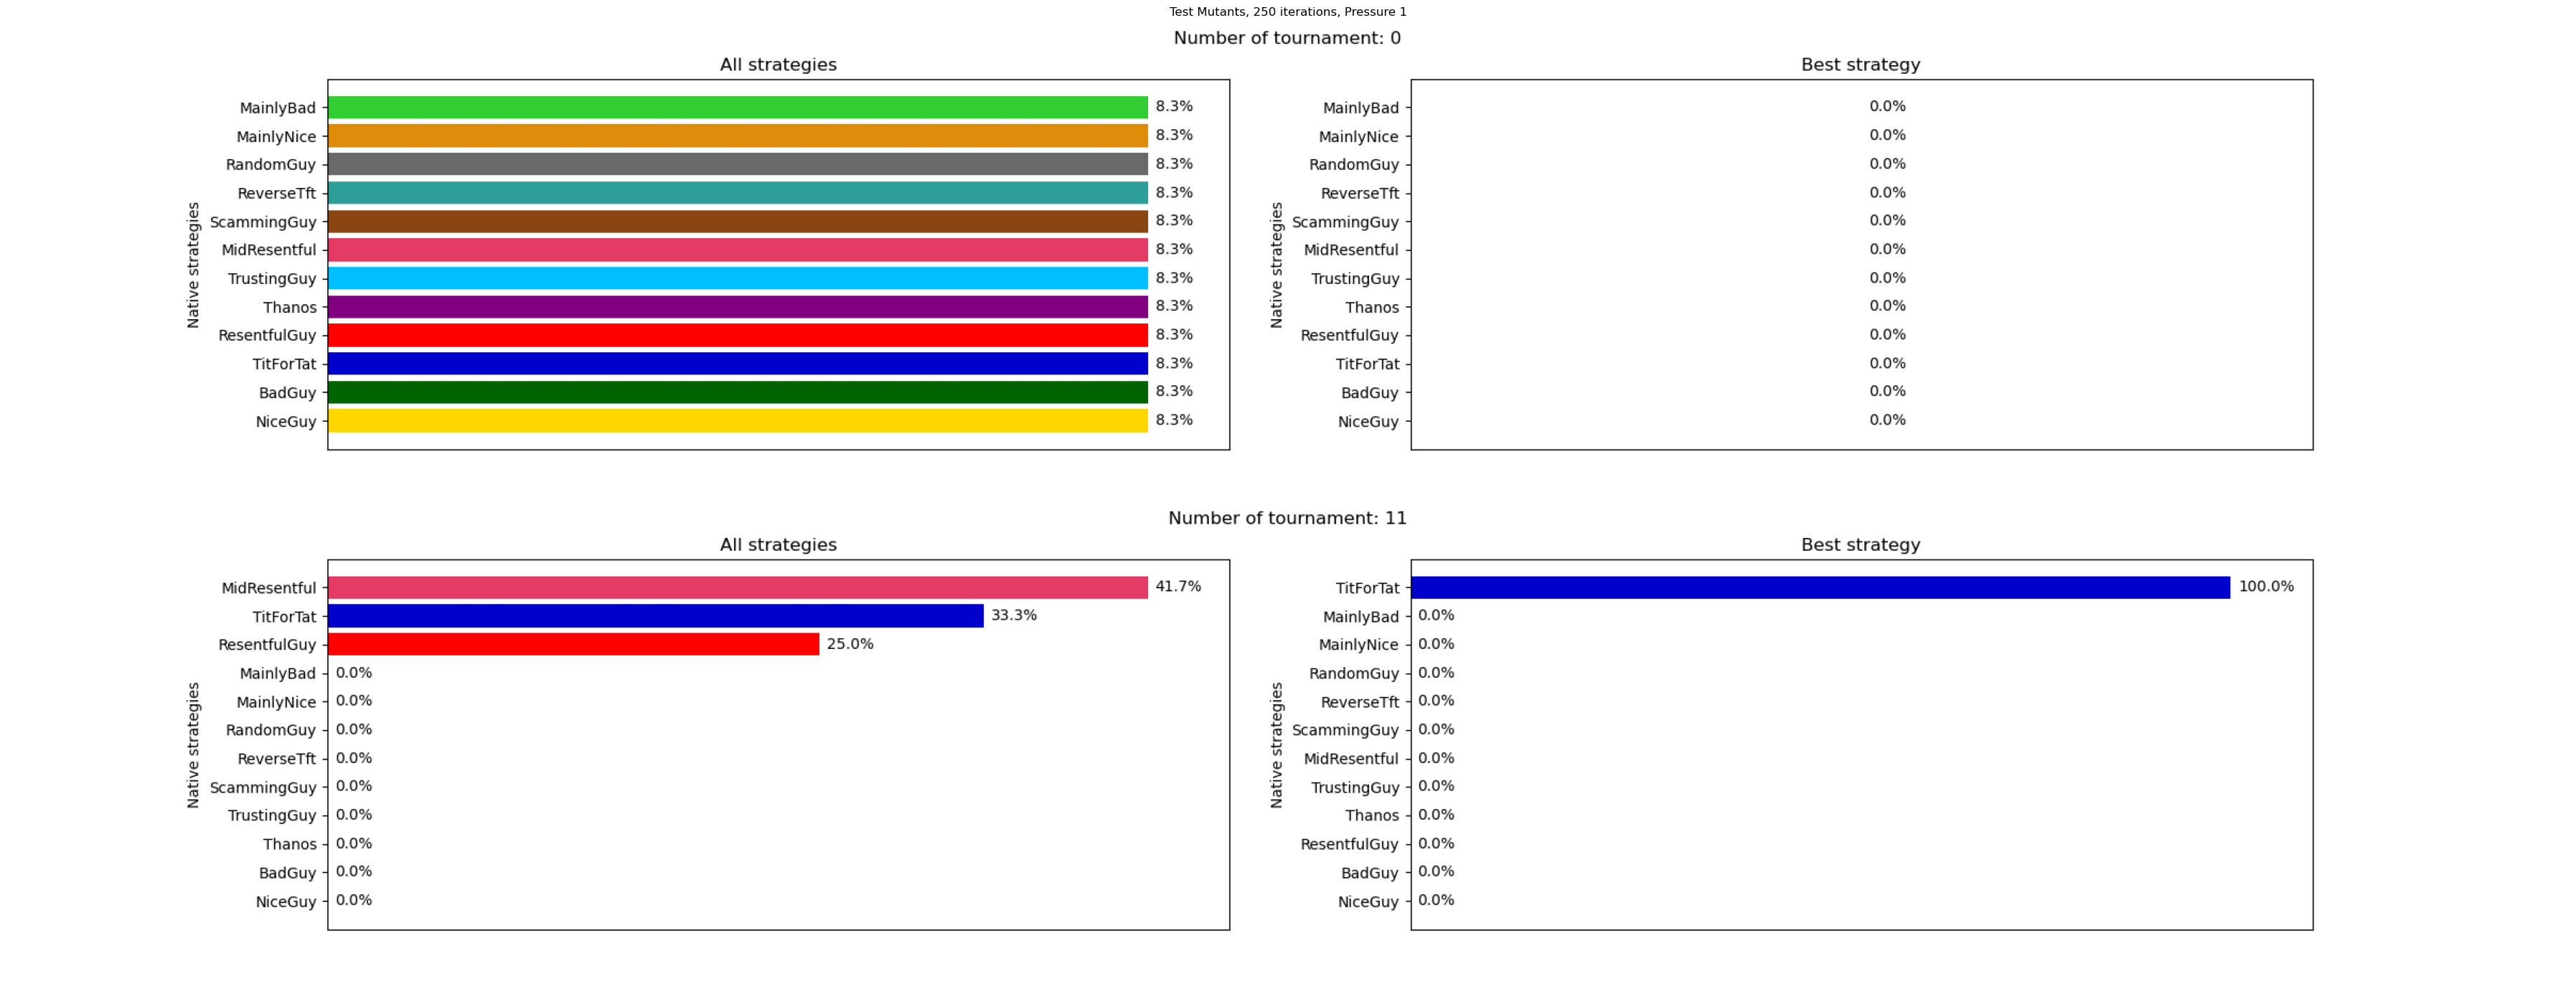

In [71]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('test_250_iter_1_p.png') )
axes.set_title( 'Test Mutants, 250 iterations, Pressure 1')
axes.axis('off')
fig.tight_layout()

Using instead a population of 125 mutants, each one starting with the same genome of all 12 uniformly distributed strategy, nothing much will change even after 1000 iterations. The expected strategy will slightly emerge but there is too much variability to obtain a stable result or an absolute win in a reasonable time.

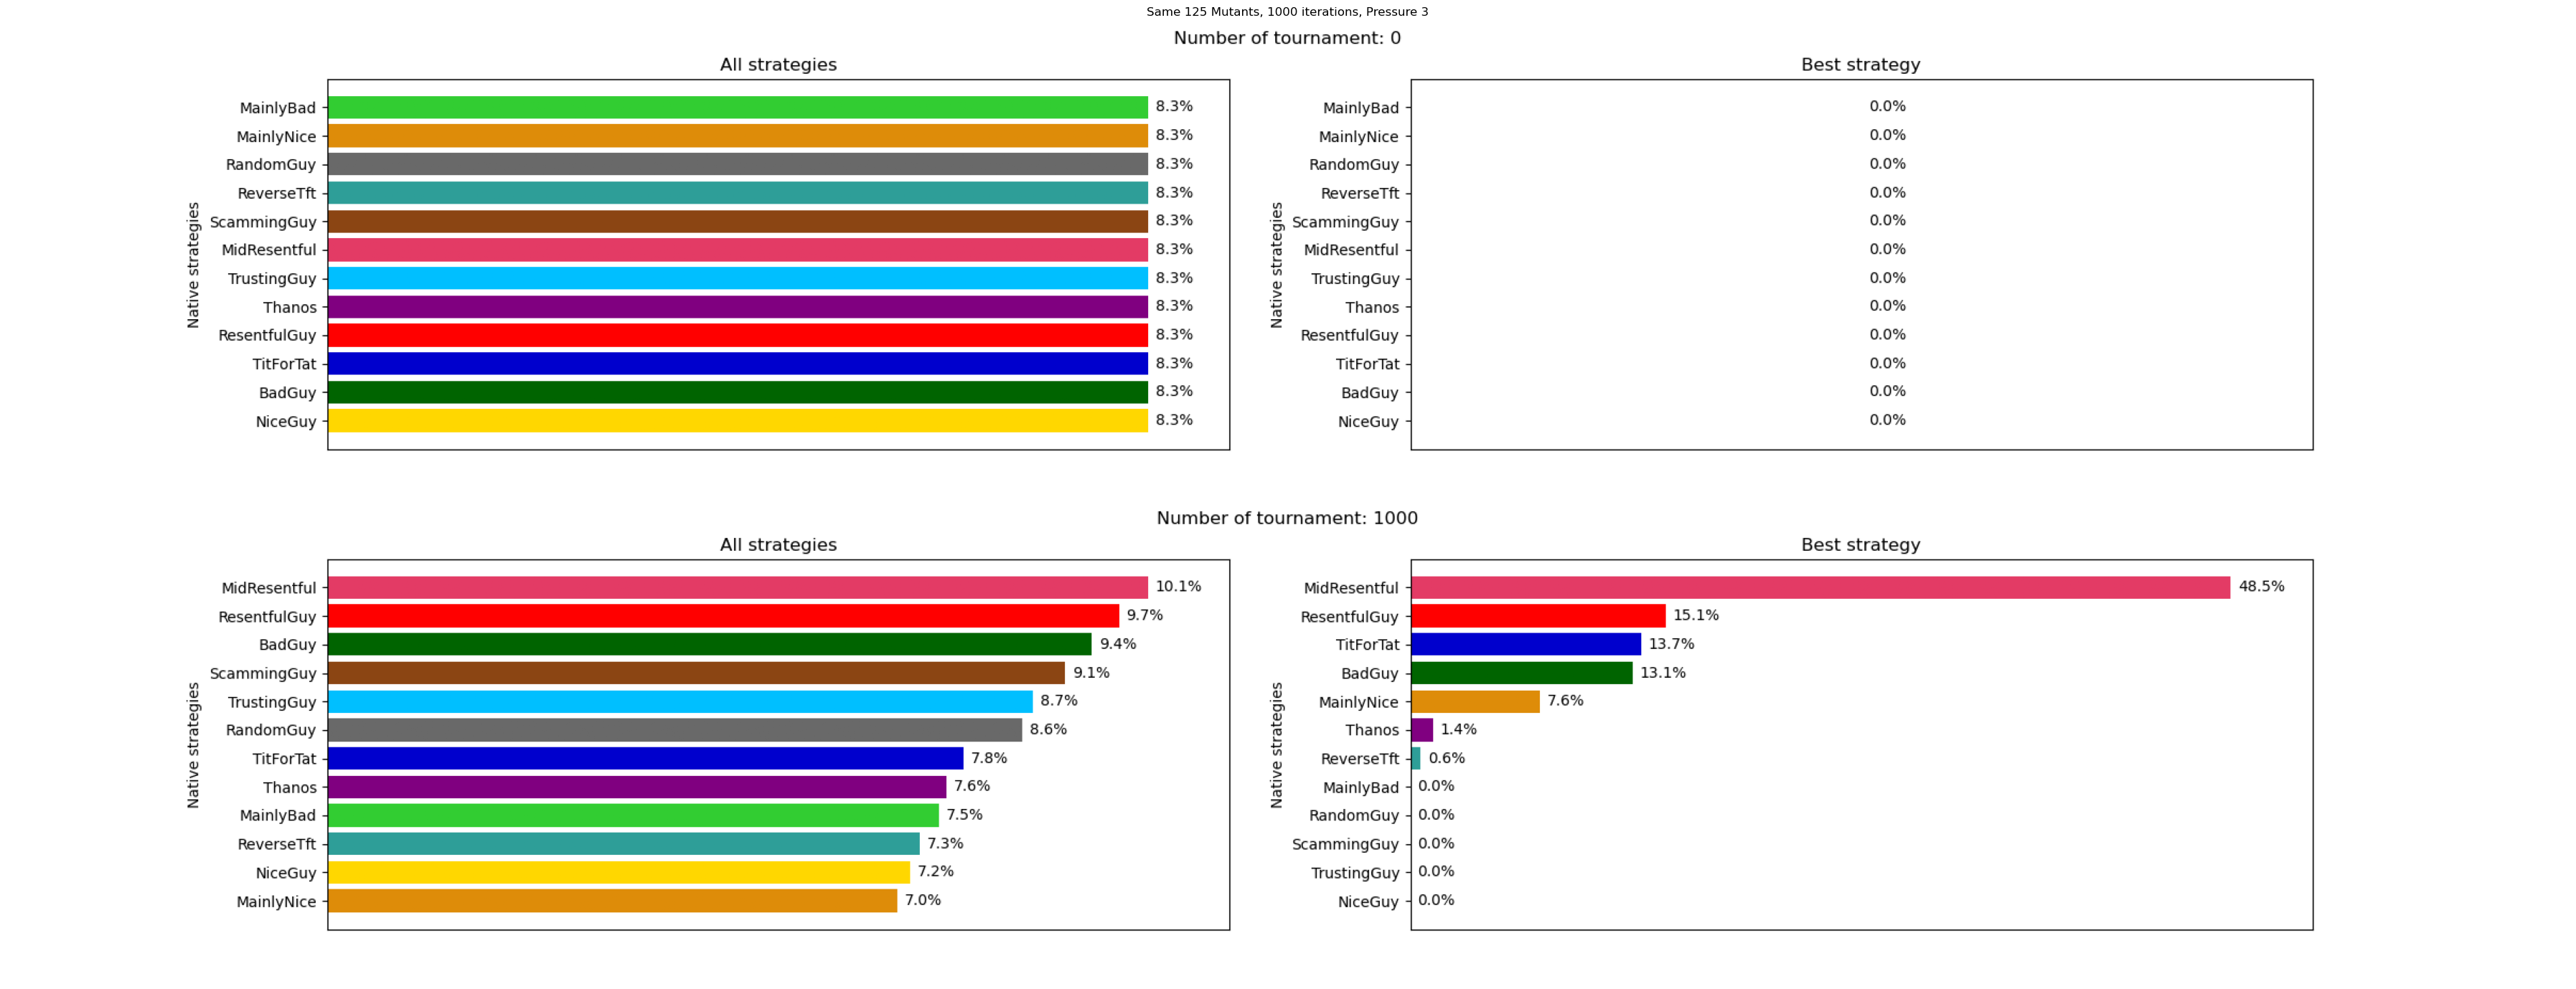

In [72]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('Same_All_125_mut_1000_iter_3_p.png') )
axes.set_title( 'Same 125 Mutants, 1000 iterations, Pressure 3')
axes.axis('off')
fig.tight_layout()

A similar result is obtained using different starting probabilities and distribution of atomic strategies. Here every mutant has 30 genes chosen randomly from the starting 12 with repetition allowed, but even if a stronger tendency emerges, after 1000 interations all strategies seems to fluctuate.

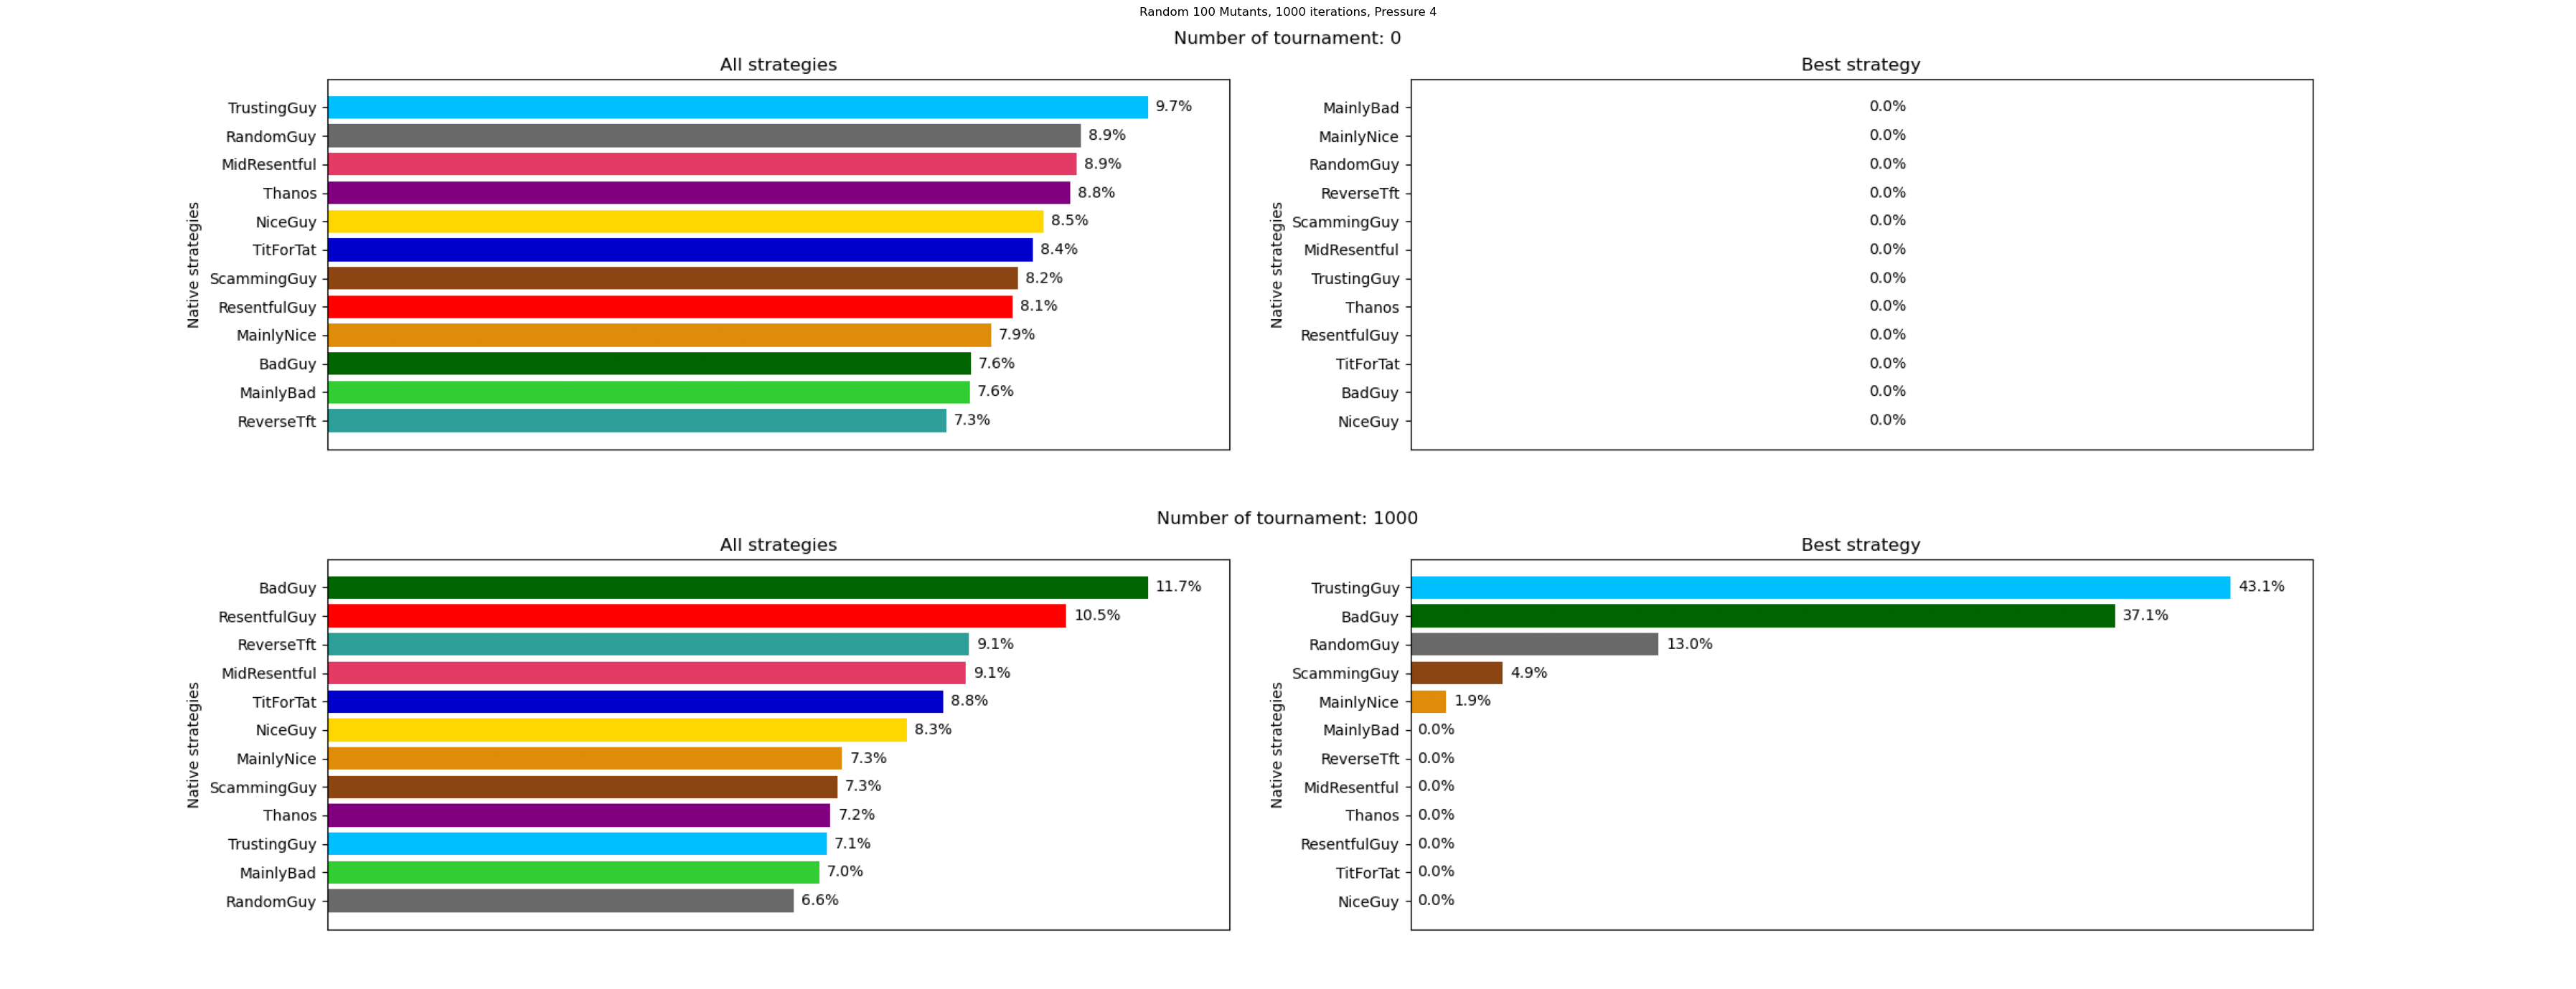

In [73]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('Shuffle_All_100_mut_1000_iter_4_p.png') )
axes.set_title( 'Random 100 Mutants, 1000 iterations, Pressure 4')
axes.axis('off')
fig.tight_layout()

Using a limited number of Mutants and a pseudo-random starting set of genomes can lead to different results, showing how much the initial conditions metters in this process. For example, using a set of 30 names taken from the students of Physics of Data, we get a very strong winning situation for the BadGuy strategy and a specific species of mutants.

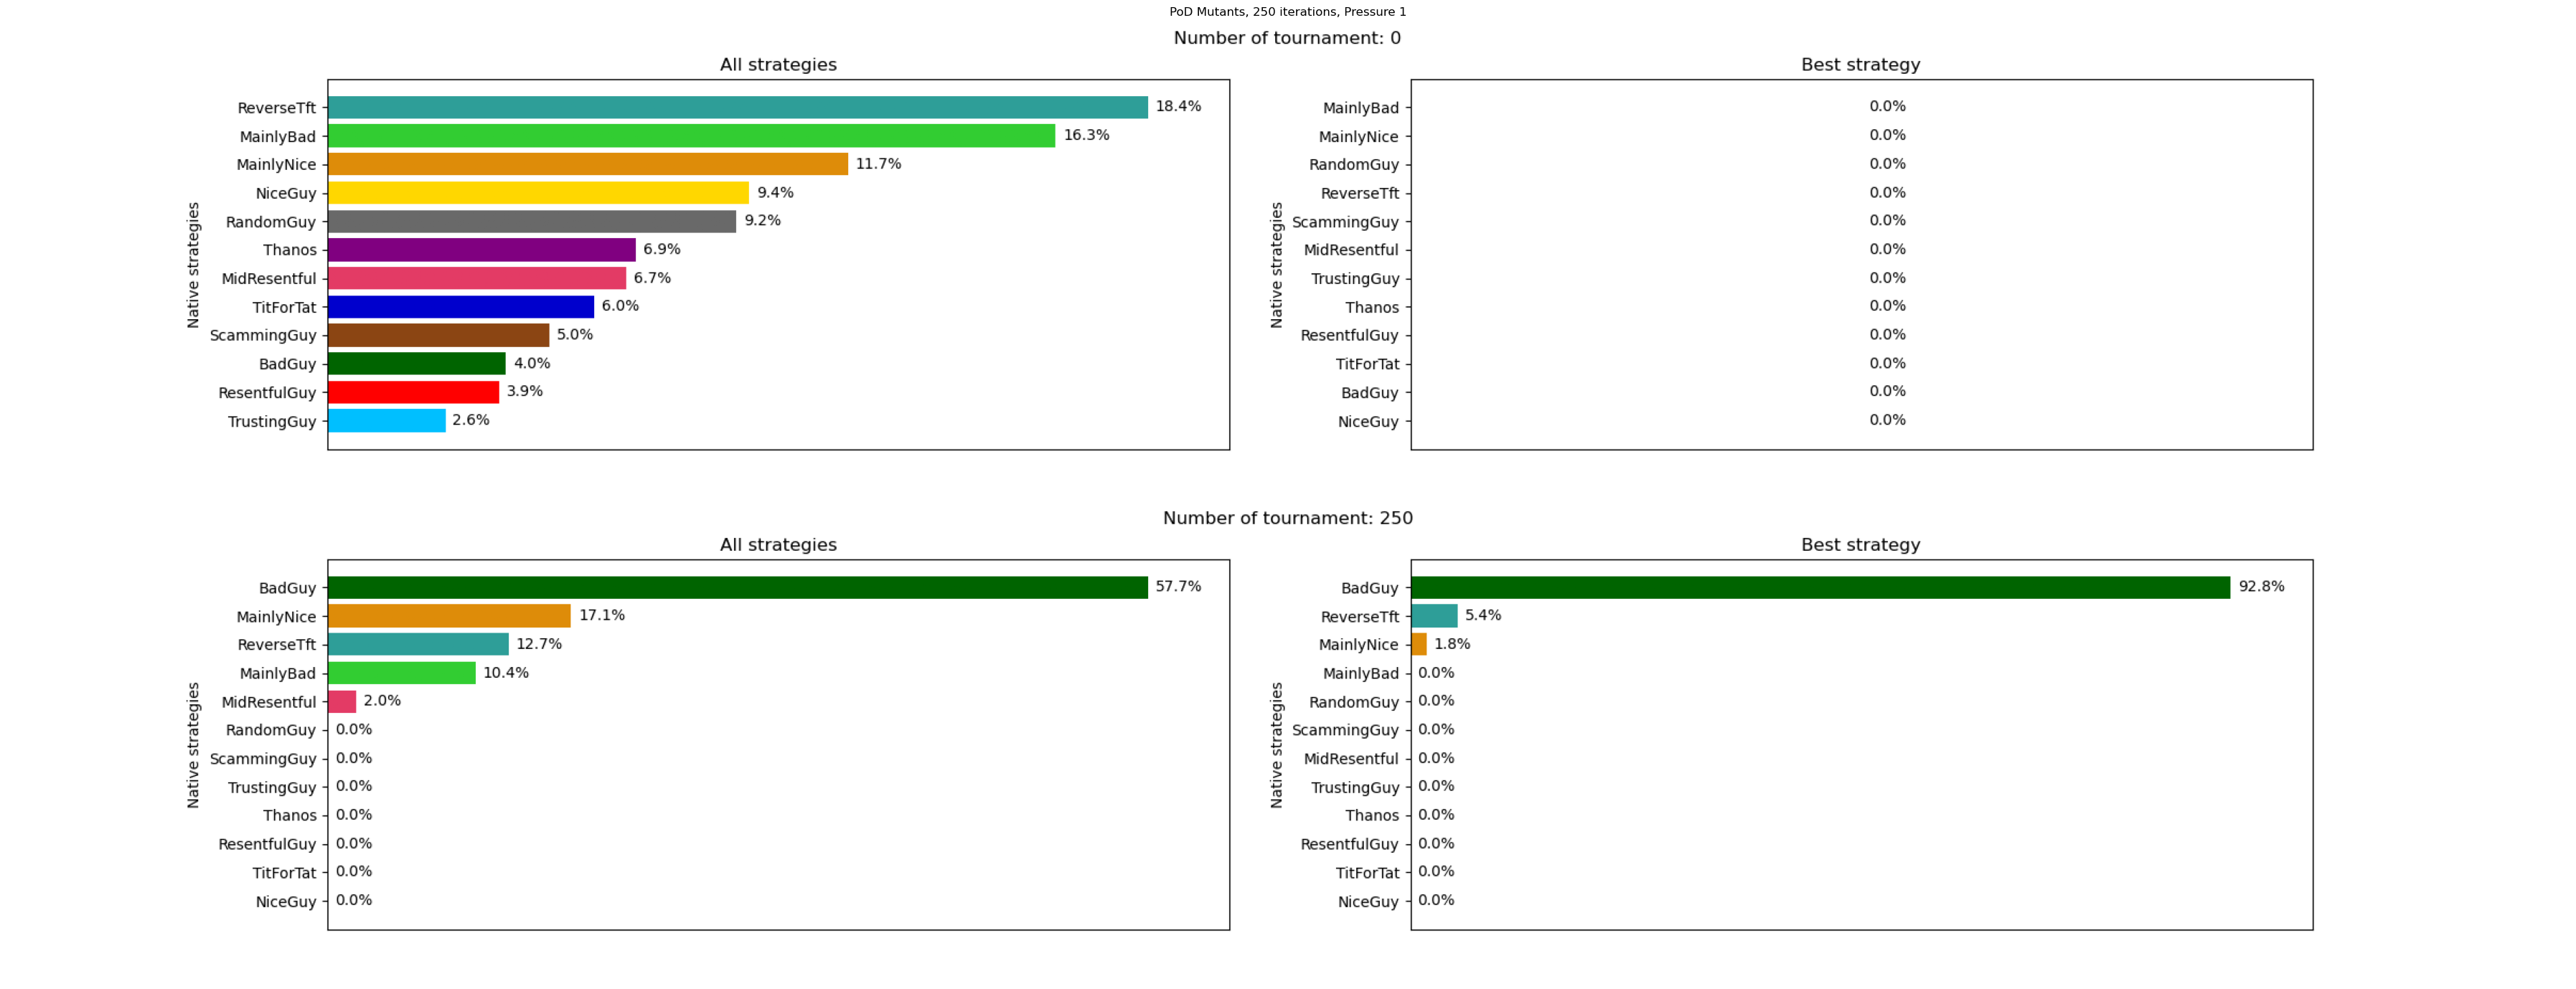

In [74]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('PoD_250_iter_1_p.png') )
axes.set_title( 'PoD Mutants, 250 iterations, Pressure 1')
axes.axis('off')
fig.tight_layout()

A similar situation emerges using the names of famous physicist, and in this case, after a long transient with the predominance of BadGuy strategy, a 'monoatomic' species is able to emerge and take all the population.

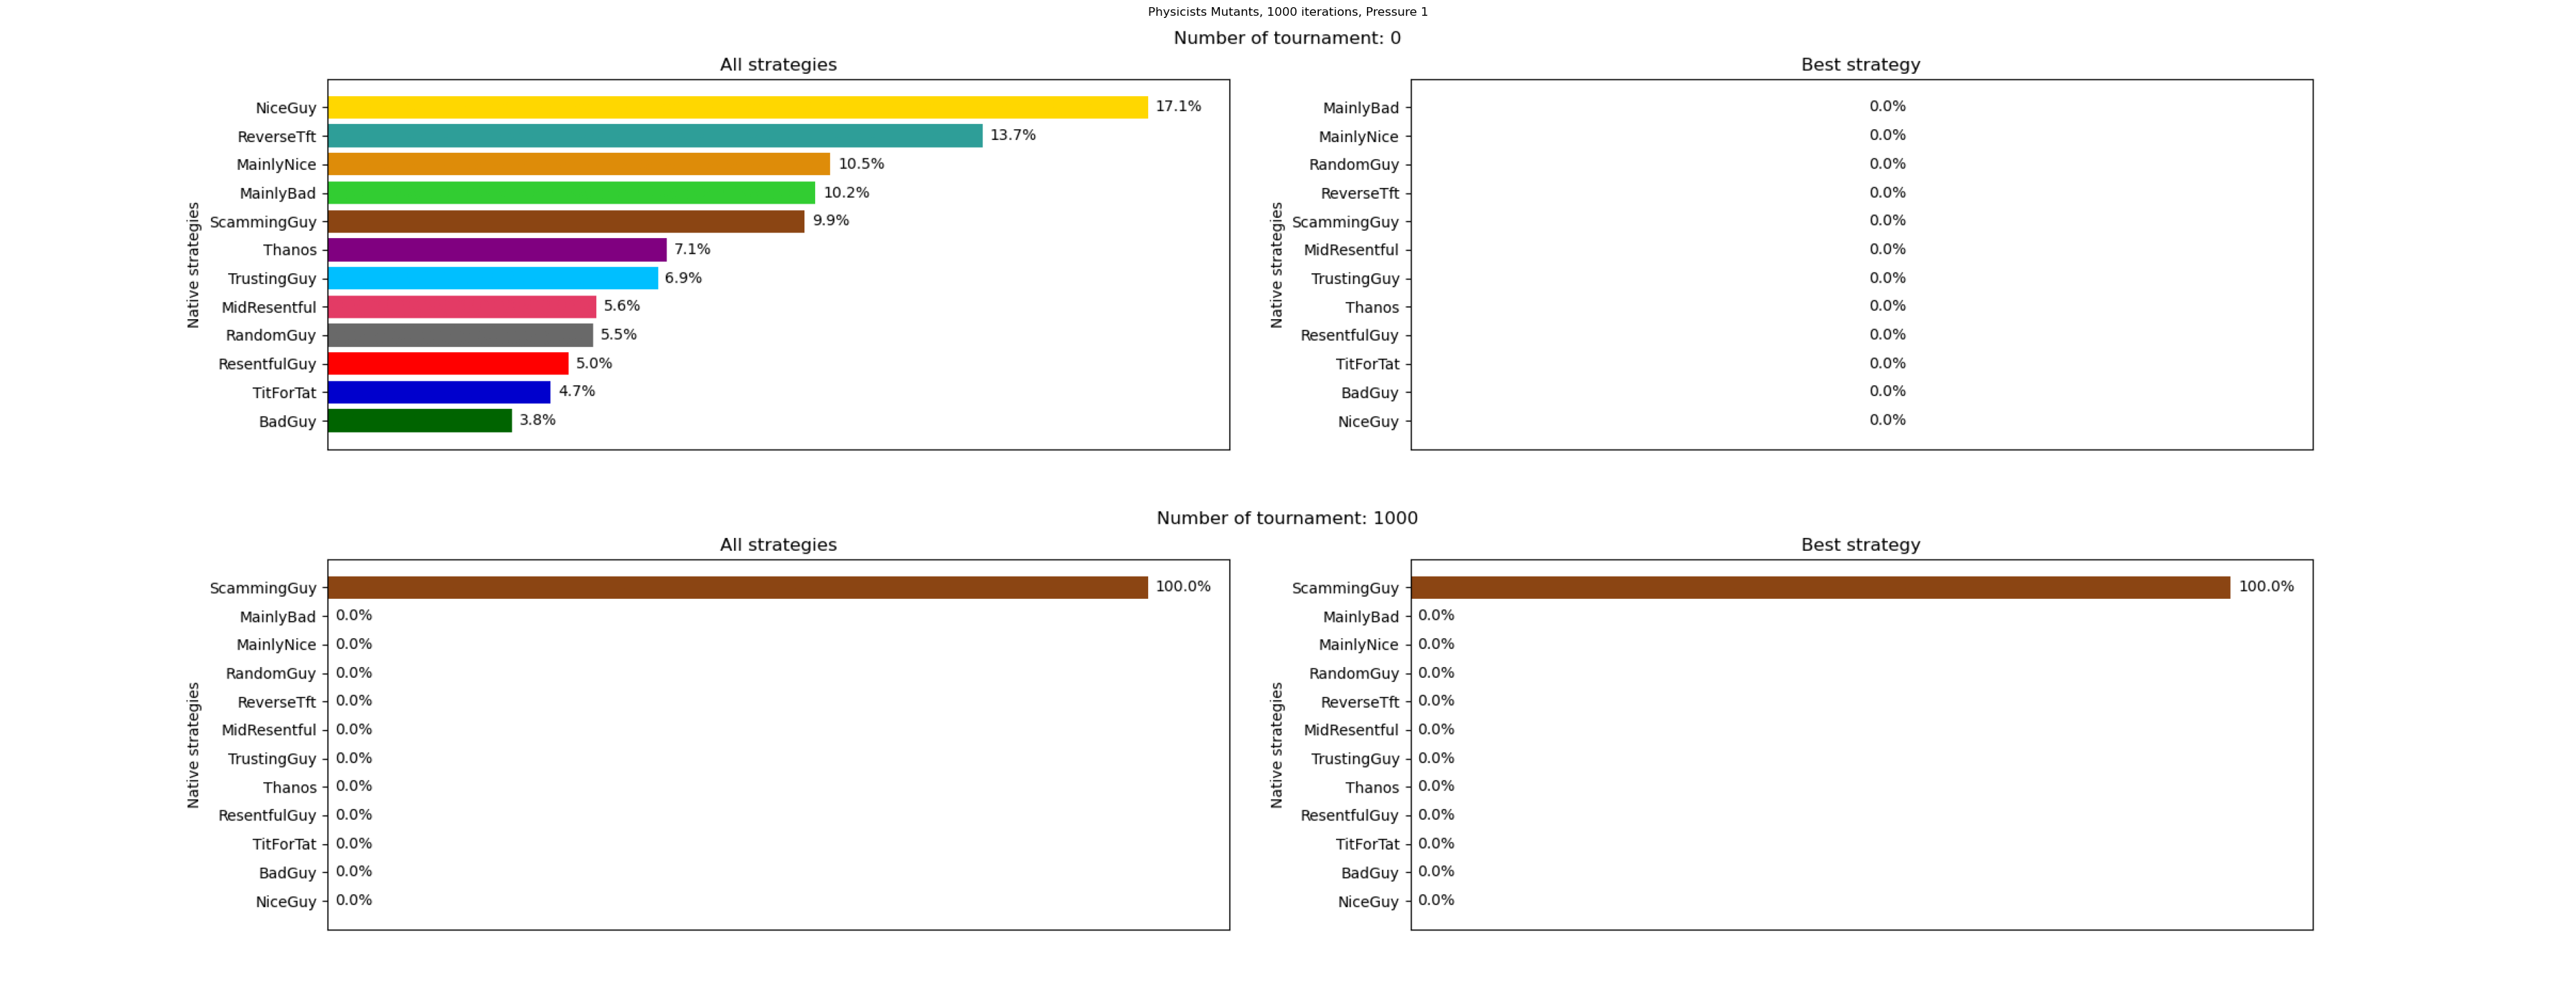

In [75]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('physicist_1000_iter_1_p.png') )
axes.set_title( 'Physicists Mutants, 1000 iterations, Pressure 1')
axes.axis('off')
fig.tight_layout()

Similar result is obtained with Nobel Prizes names, and between this and the last we see some overlap, but a differnt strategy emerges here, and it is one of the most optimal emerged from the "classical" analysis.

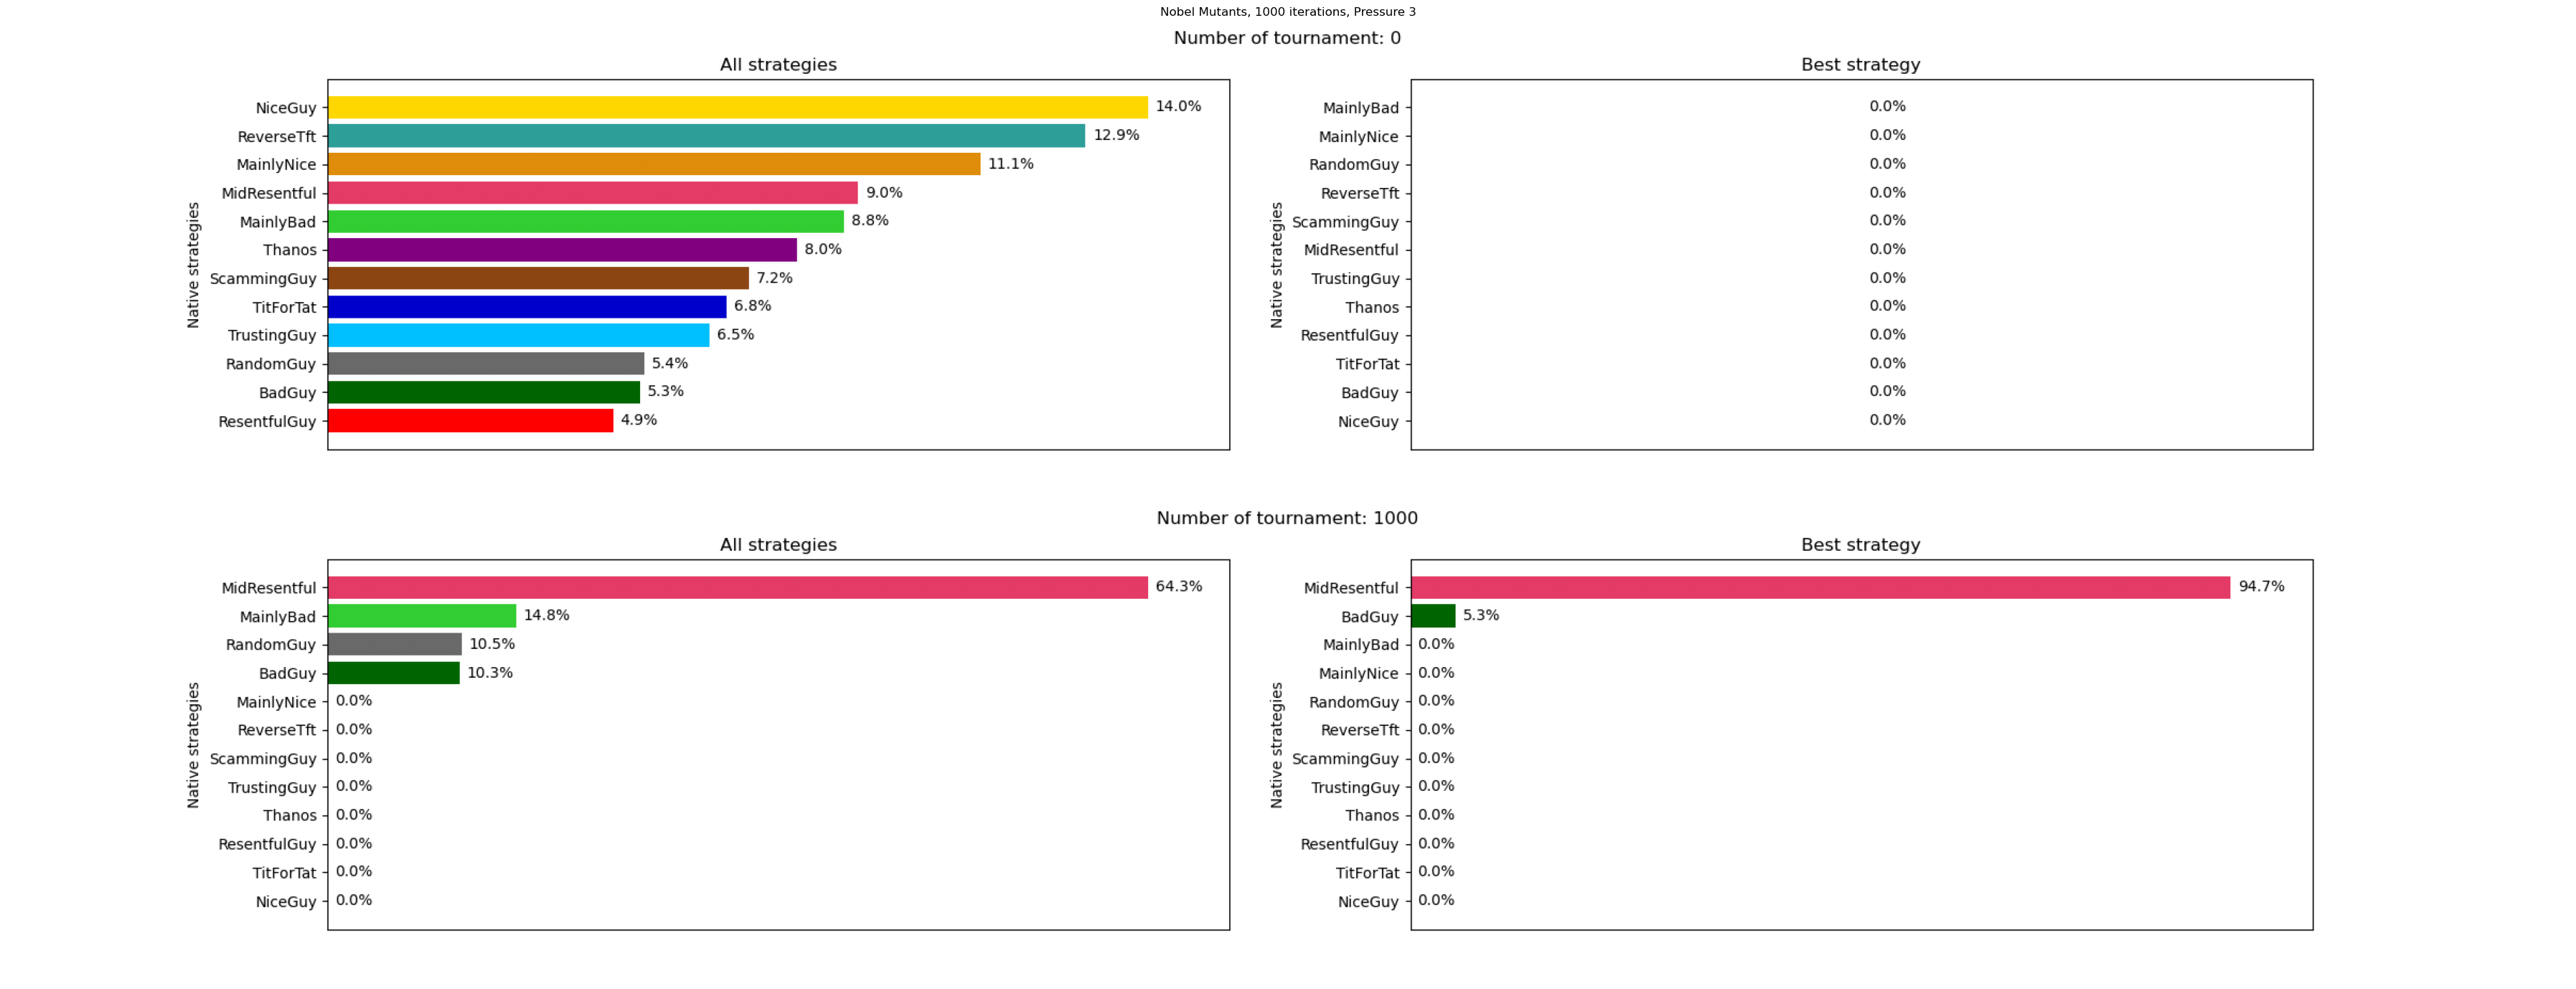

In [76]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('nobel_1000_iter_3_p.png') )
axes.set_title( 'Nobel Mutants, 1000 iterations, Pressure 3')
axes.axis('off')
fig.tight_layout()

Other example are provided, where even for similar starting point, the difference in the combination of each single mutant genome can lead to different results (let's remember that each mutant can have access to different combinations of genes, and sometimes having less is better to get a convergence)

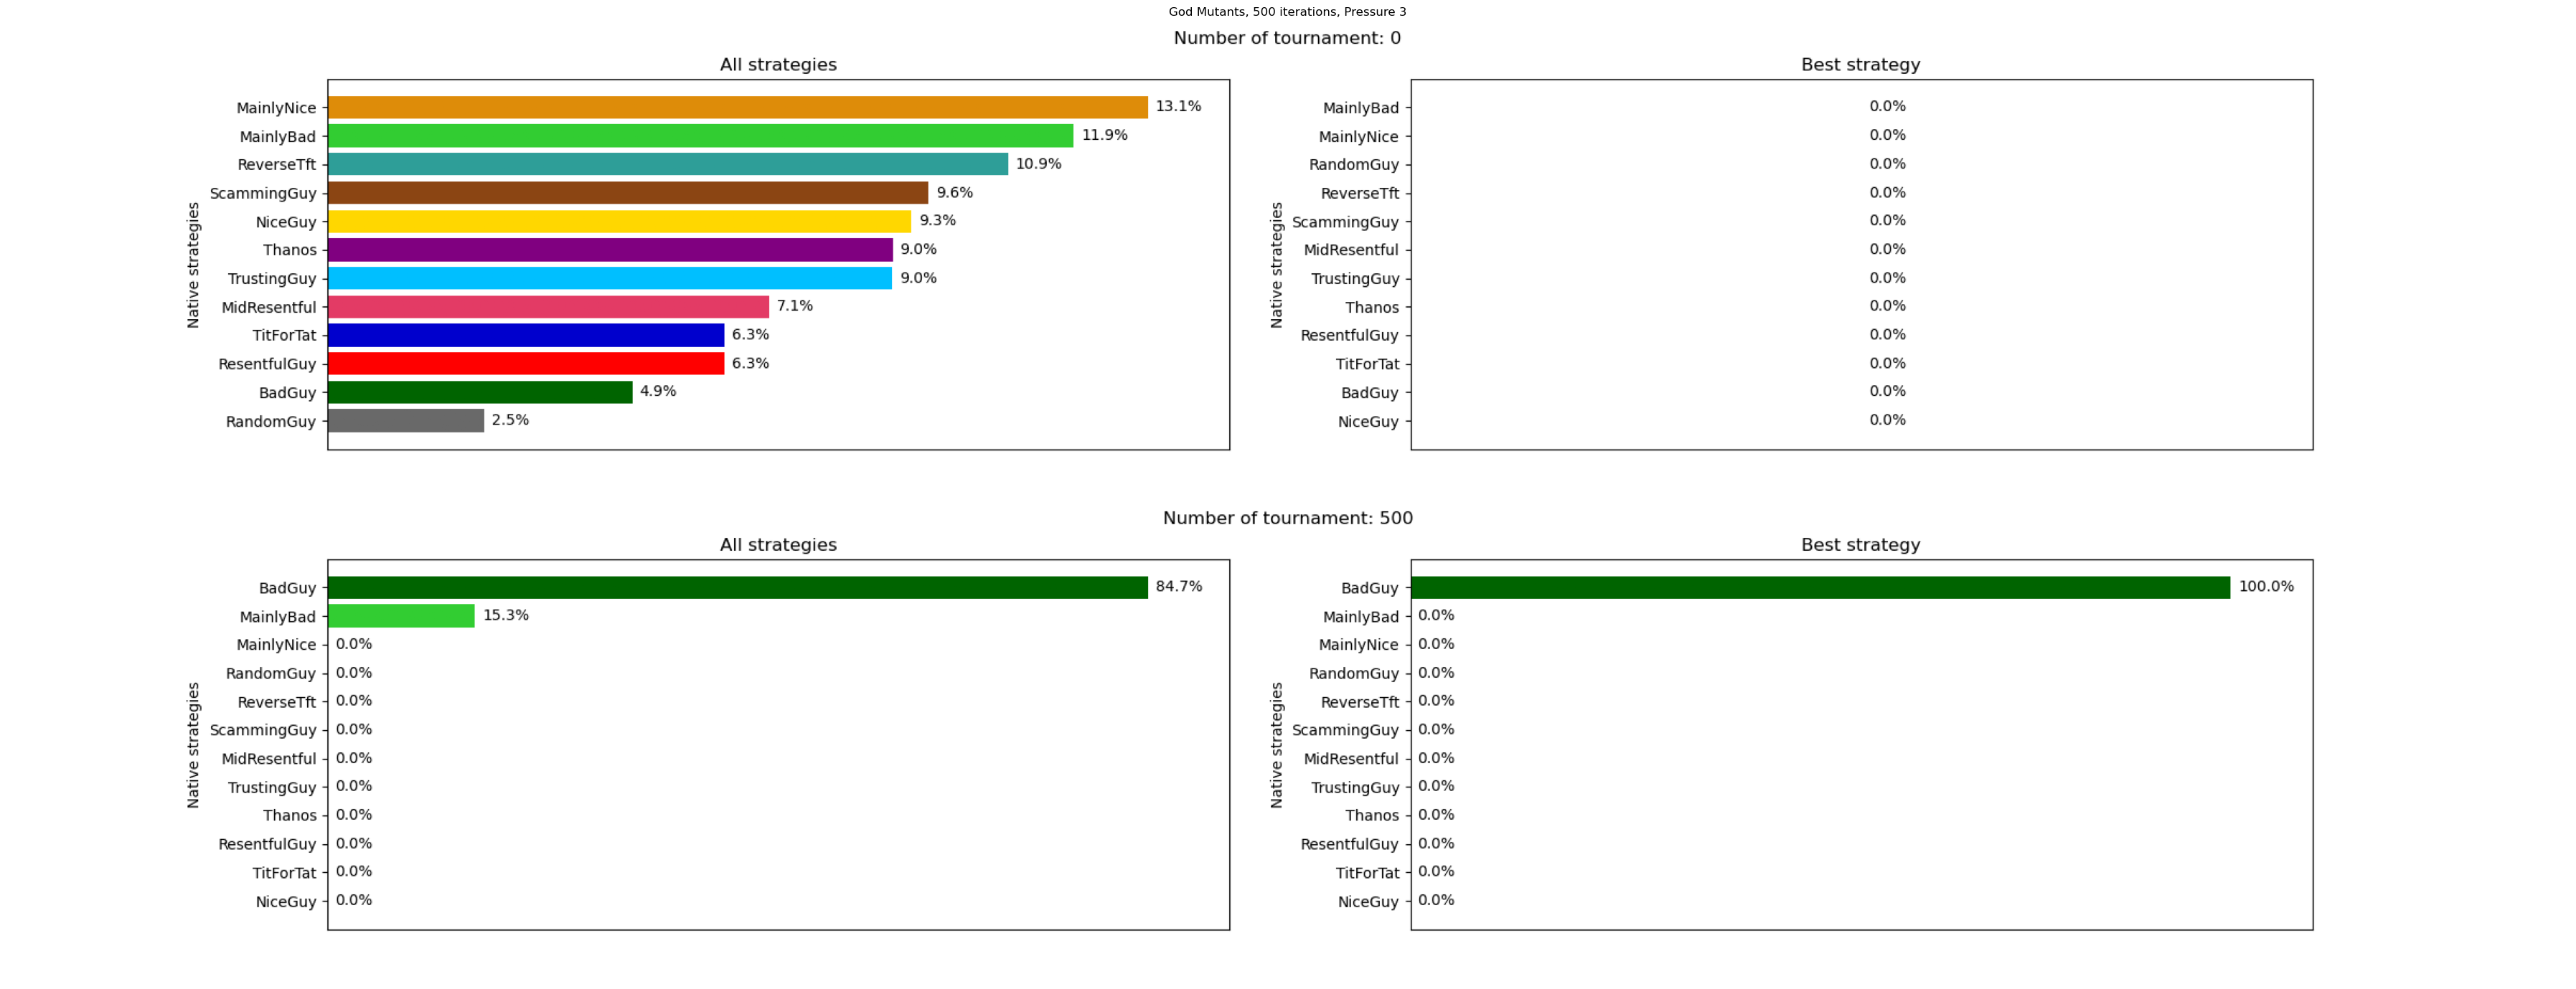

In [77]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('god_500_iter_3_p.png') )
axes.set_title( 'God Mutants, 500 iterations, Pressure 3')
axes.axis('off')
fig.tight_layout()

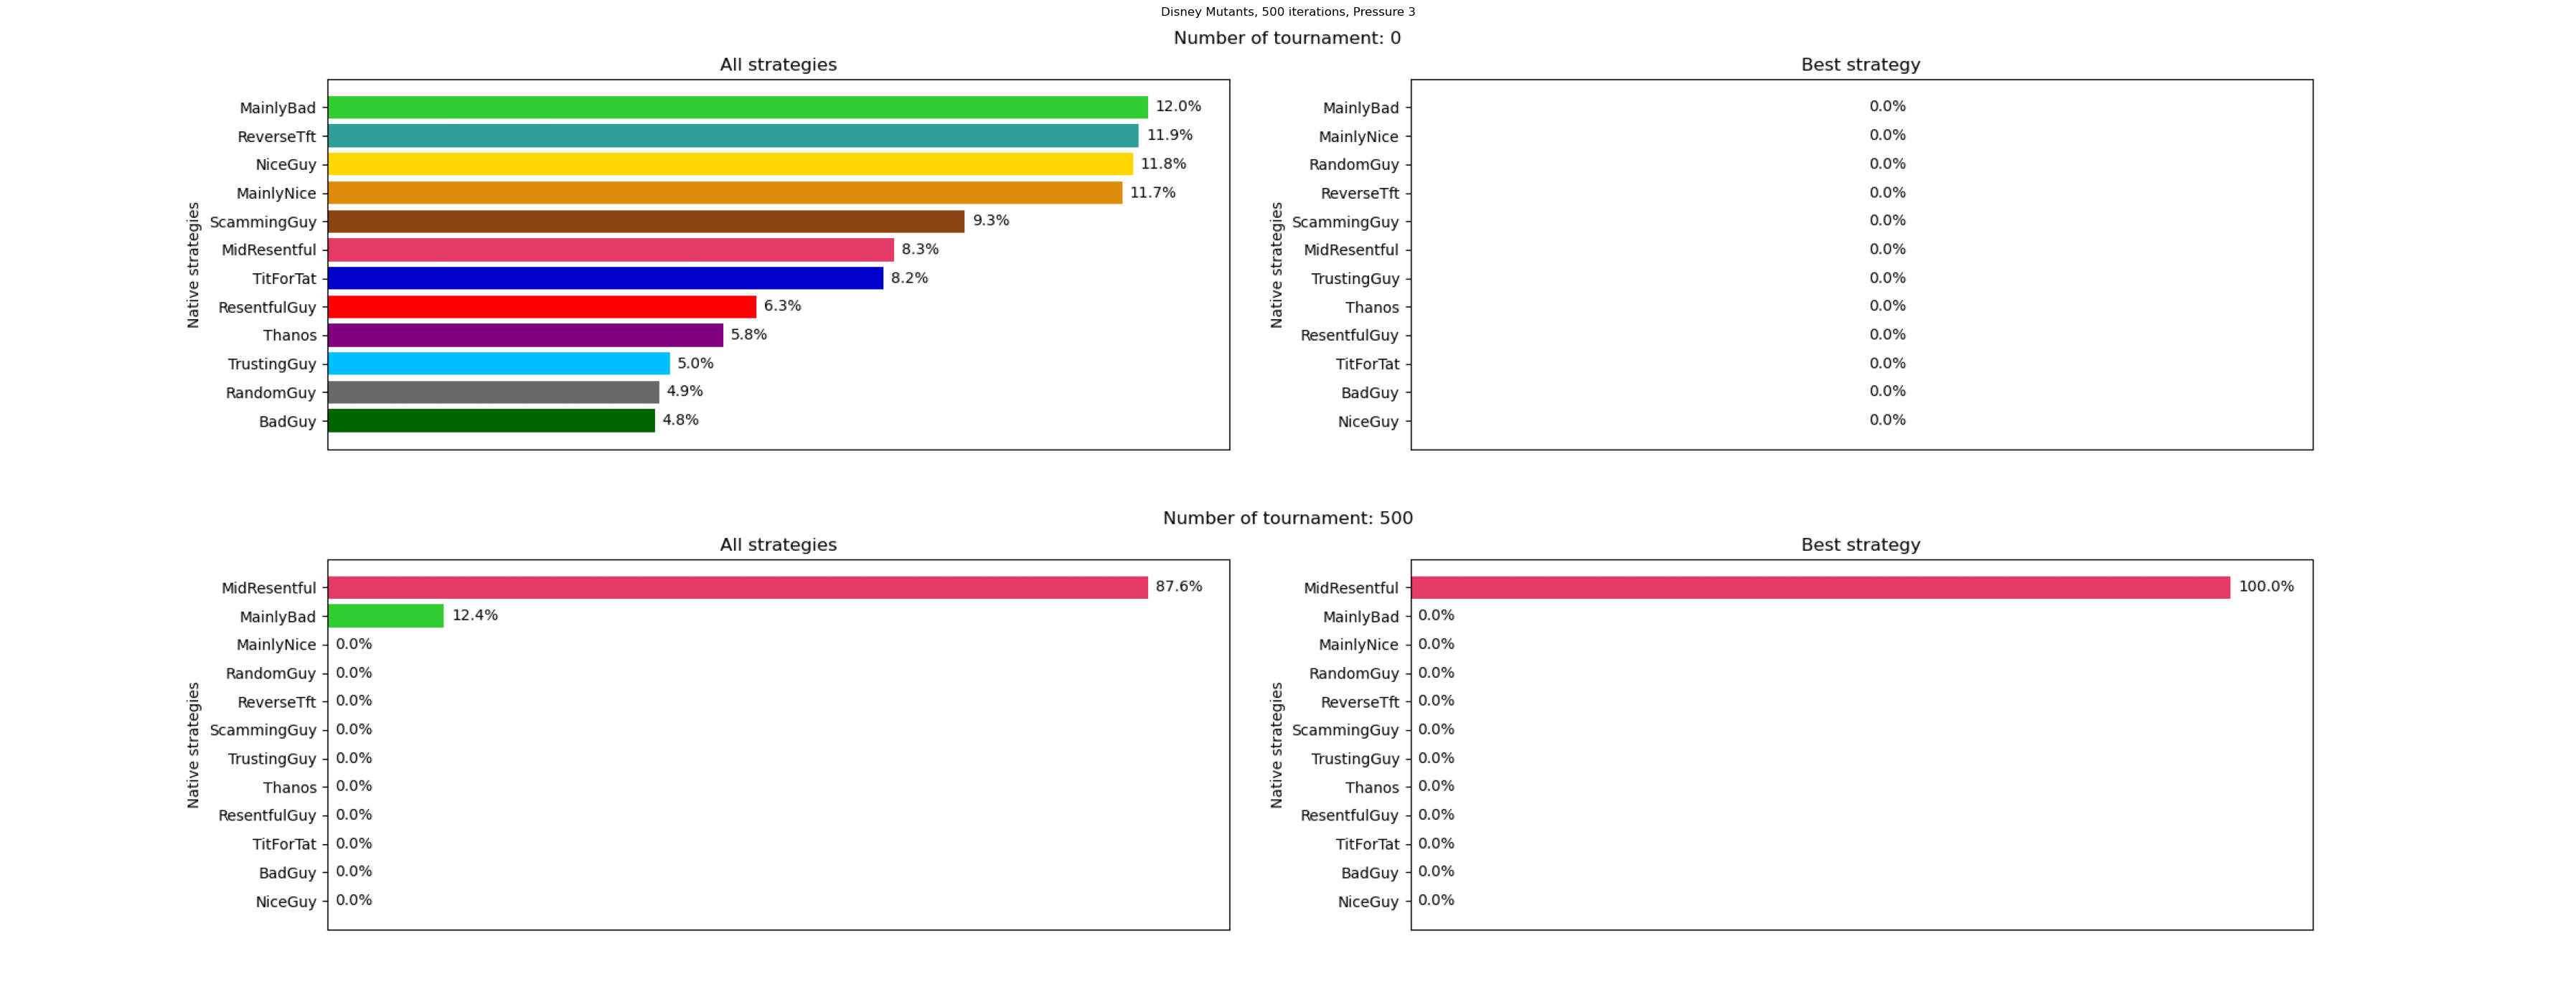

In [78]:
fig, axes = plt.subplots( 1, 1, figsize = ( 36, 15 ),  )
axes.imshow( mpimg.imread('disney_500_iter_3_p.png') )
axes.set_title( 'Disney Mutants, 500 iterations, Pressure 3')
axes.axis('off')
fig.tight_layout()